In [47]:
### DESCRIPTIVE ANALYSIS OF GENOMIC AND IMMUNOGENIC VARIABLES ########

# Import libraries to work with dataframes
import numpy as np  # Library for numerical computations and arrays
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for creating visualizations and plots
import os  # Library for interacting with the operating system (files, directories)

# I read the file containing the samples with all type of data available
path='/home/vant/TFM/Final_db/Samples_alltypedata_annotated.xlsx' 
df=pd.read_excel(path)
print(df.head())

                                             ID_CNIO  \
0                       Unique CNIO tumor identifier   
1  LP: ID for samples from La Paz Hospital; OVE: ...   
2                                                LP1   
3                                                LP2   
4                                                LP3   

                                         ID_ORIGINAL  \
0  Unique identifier from the hospital to the pat...   
1                                     Pathology code   
2                                           02B28662   
3                                           08B18876   
4                                            08B260A   

                               ID_ORIGINAL_NHC_BBANK  \
0  Unique identifier from Hospital (LP, OVE, MDA ...   
1  Unique alphanumeric code from the hospital or ...   
2                                                NaN   
3                                                NaN   
4                                             

In [48]:
# See dataframe characteristics (columns names, type of values and number of null values in each column)
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID_CNIO                    169 non-null    object
 1   ID_ORIGINAL                165 non-null    object
 2   ID_ORIGINAL_NHC_BBANK      149 non-null    object
 3   HISTOLOGY                  169 non-null    object
 4   HISTOLOGY_DETAIL           169 non-null    object
 5   AGE                        169 non-null    object
 6   GRADE                      134 non-null    object
 7   FIGO                       163 non-null    object
 8   FIGOL                      163 non-null    object
 9   FIGOa                      163 non-null    object
 10  NEOADJUVANT_TREATMENT      113 non-null    object
 11  ADJUVANT_TREATMENT         154 non-null    object
 12  TYPE_ADJUVANT              123 non-null    object
 13  OTHER_ADJ_TREAT            9 non-null      object
 14  RESIDUAL  

In [49]:
########Firstly we change misclassified samples to redo the analysis  #######################

# Change the values to 'MMRp' for samples 'LP20', 'LP26', and 'MDA15'
# We use .loc[] to access specific rows where 'ID_CNIO' matches one of the specified samples
df.loc[df['ID_CNIO'].isin(['LP20', 'LP26', 'MDA15']), 'MMR_final_status'] = 'MMRp'

# Change the values to 'MMRd' for sample 'MDA26' 
df.loc[df['ID_CNIO'].isin(['MDA26']), 'MMR_final_status'] = 'MMRd'

# Display the modified DataFrame to verify the changes
# Only showing 'ID_CNIO' and 'MMR_final_status' columns for brevity
print(df[['ID_CNIO', 'MMR_final_status']])

 # Create a new DataFrame without the first two rows that only contain the descriptive and coding information
df = df.iloc[2:].reset_index(drop=True)

# Mapping dictionary for HISTOLOGY
category_mapping = {0: 'EOC', 1: 'CCOC', 2: 'Mixed', 3: 'Others'}

# Replace values in HISTOLOGY
df['HISTOLOGY'] = df['HISTOLOGY'].map(category_mapping)

# Filter the dataframe for only work with endometroid samples
df_endometroid=df[df['HISTOLOGY']=='EOC']
print(df_endometroid.head(5))

# Show the number of EOC samples
print(" The number of EOC samples is:",len(df_endometroid)) # 89

# Filter the dataframe for only work with CCOC samples
df_cc=df[df['HISTOLOGY']=='CCOC']

# Show the number of CCOC samples
print(" The number of CCOC samples is:",len(df_cc)) # 89


                                               ID_CNIO  \
0                         Unique CNIO tumor identifier   
1    LP: ID for samples from La Paz Hospital; OVE: ...   
2                                                  LP1   
3                                                  LP2   
4                                                  LP3   
..                                                 ...   
164                                             OVE108   
165                                               RVB2   
166                                               RVB3   
167                                               RVB5   
168                                               RVB6   

                                      MMR_final_status  
0    MMR classification according to gold standard ...  
1    MMRp=MMR proficient sample, MMRd=MMR deficient...  
2                                                 MMRp  
3                                                 MMRp  
4                 

In [50]:
## Frequencies of MMRp and MMRd samples in the EOC cohort
frequencies = df_endometroid.groupby('MMR_final_status')['HISTOLOGY'].value_counts().unstack(fill_value=0)
total_endometroid=len(df_endometroid)
relative_frequencies=(frequencies/total_endometroid)*100
print("Frequencies according MMR final status in EOC are:",relative_frequencies)

## Frequencies of MMRp and MMRd samples in the CCOC cohort
frequencies2 = df_cc.groupby('MMR_final_status')['HISTOLOGY'].value_counts().unstack(fill_value=0)
total_cc=len(df_cc)
relative_frequencies2=(frequencies2/total_cc)*100
print("Frequencies according MMR final status in CCOC are:",relative_frequencies2)

Frequencies according MMR final status in EOC are: HISTOLOGY               EOC
MMR_final_status           
MMRd              13.483146
MMRp              86.516854
Frequencies according MMR final status in CCOC are: HISTOLOGY              CCOC
MMR_final_status           
MMRd               6.493506
MMRp              93.506494



Descriptive statistics for EOC by MMR status:
  MMR Status: MMRd
    Median: 44.15
    Mean: 48.12
    Standard Deviation: 20.44
    Q1 (25th percentile): 36.575
    Q3 (75th percentile): 64.59
    Count: 12
  MMR Status: MMRp
    Median: 3.08
    Mean: 4.33
    Standard Deviation: 3.11
    Q1 (25th percentile): 2.27
    Q3 (75th percentile): 6.38
    Count: 77

Descriptive statistics for CCOC by MMR status:
  MMR Status: MMRd
    Median: 33.33
    Mean: 33.55
    Standard Deviation: 13.75
    Q1 (25th percentile): 20.0
    Q3 (75th percentile): 44.44
    Count: 5
  MMR Status: MMRp
    Median: 3.03
    Mean: 3.60
    Standard Deviation: 3.14
    Q1 (25th percentile): 1.49
    Q3 (75th percentile): 4.945
    Count: 72
Outliers in EOC - MMR Status 'MMRp':
    ID_CNIO MMR_final_status  MSI_sensor2
6       LP9             MMRp        13.79
139   OVE28             MMRp        15.22
----------------------------------------
Outliers in CCOC - MMR Status 'MMRp':
    ID_CNIO MMR_final_status 

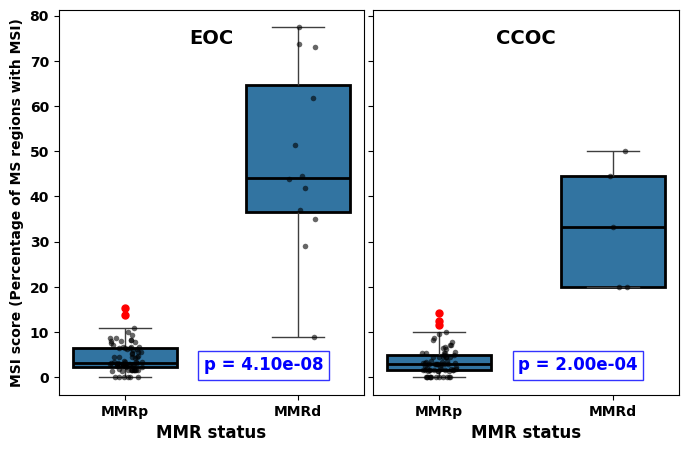

In [51]:
## ANALYZE MSI SCORE BY HISTOTYPE AND MMR STATUS #################

import seaborn as sns  # Library for statistical data visualization
from scipy.stats import shapiro  # Function to test normality of data (Shapiro-Wilk test)
from scipy.stats import levene  # Function to test equality of variances (Levene's test)
from scipy.stats import ttest_ind  # Function for independent two-sample t-test
from scipy.stats import mannwhitneyu  # Function for Mann-Whitney U test (non-parametric test for two groups)

def analyze_and_plot_msi_side_by_side_custom(df_eoc, df_cc, output_folder, output_file):
    # Prepare data: convert MSI_sensor2 to numeric and drop NaNs
    def prepare_data(df):
        df = df.copy()
        df['MSI_sensor2'] = pd.to_numeric(df['MSI_sensor2'], errors='coerce')
        return df.dropna(subset=['MSI_sensor2'])

    # Apply data preparation to both dataframes
    df_eoc = prepare_data(df_eoc)
    df_cc = prepare_data(df_cc)

    # Print descriptive statistics for each group (MMR status)
    def print_descriptive_stats_by_group(df, histotype_label):
        print(f"\nDescriptive statistics for {histotype_label} by MMR status:")
        grouped = df.groupby('MMR_final_status')['MSI_sensor2']
        for group_name, group_data in grouped:
            print(f"  MMR Status: {group_name}")
            print(f"    Median: {group_data.median()}")
            print(f"    Mean: {group_data.mean():.2f}")
            print(f"    Standard Deviation: {group_data.std():.2f}")
            print(f"    Q1 (25th percentile): {group_data.quantile(0.25)}")
            print(f"    Q3 (75th percentile): {group_data.quantile(0.75)}")
            print(f"    Count: {group_data.count()}")

    # Remove outliers based on IQR rule
    def filter_outliers(df):
        categories = df['MMR_final_status'].unique()
        non_outliers = pd.DataFrame()
        for category in categories:
            category_data = df[df['MMR_final_status'] == category]
            Q1 = category_data['MSI_sensor2'].quantile(0.25)
            Q3 = category_data['MSI_sensor2'].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            filtered = category_data[
                (category_data['MSI_sensor2'] >= lower_bound) &
                (category_data['MSI_sensor2'] <= upper_bound)
            ]
            non_outliers = pd.concat([non_outliers, filtered])
        return non_outliers

    # Annotate outliers on the plots
    def annotate_outliers(ax, df, title):
        categories = df['MMR_final_status'].unique()
        for category in categories:
            category_data = df[df['MMR_final_status'] == category]
            Q1 = category_data['MSI_sensor2'].quantile(0.25)
            Q3 = category_data['MSI_sensor2'].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = category_data[
                (category_data['MSI_sensor2'] < lower_bound) |
                (category_data['MSI_sensor2'] > upper_bound)
            ]
            ax.plot(
                outliers['MMR_final_status'], outliers['MSI_sensor2'], 'o',
                color='red', markersize=5, label='Outliers' if category == categories[0] else ""
            )
            if not outliers.empty:
                print(f"Outliers in {title} - MMR Status '{category}':")
                print(outliers[['ID_CNIO', 'MMR_final_status', 'MSI_sensor2']])
                print("-" * 40)
        ax.set_xlabel('MMR status', fontsize=12, fontweight='bold')

    # Annotate p-values based on statistical tests
    def annotate_pvalue(ax, df):
        categories = df['MMR_final_status'].unique()
        if len(categories) == 2:
            group1 = df[df['MMR_final_status'] == categories[0]]['MSI_sensor2']
            group2 = df[df['MMR_final_status'] == categories[1]]['MSI_sensor2']

            # Perform normality and variance tests
            shapiro1 = shapiro(group1)
            shapiro2 = shapiro(group2)
            levene_test = levene(group1, group2)

            # Choose the statistical test based on assumptions
            if shapiro1.pvalue > 0.05 and shapiro2.pvalue > 0.05 and levene_test.pvalue > 0.05:
                test_stat, p_value = ttest_ind(group1, group2).statistic, ttest_ind(group1, group2).pvalue
                test_name = "T-test"
            else:
                test_stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided').statistic, \
                                     mannwhitneyu(group1, group2, alternative='two-sided').pvalue
                test_name = "Mann-Whitney U"

            # Add p-value annotation to the plot
            ax.text(
                x=0.8, y=0.7,
                s=f"p = {p_value:.2e}",
                horizontalalignment='center', verticalalignment='bottom',
                fontsize=12, color='blue', fontweight='bold',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='blue')
            )

    # Print descriptive statistics for each dataset
    print_descriptive_stats_by_group(df_eoc, "EOC")
    print_descriptive_stats_by_group(df_cc, "CCOC")

    # Filter outliers
    df_eoc_filtered = filter_outliers(df_eoc)
    df_cc_filtered = filter_outliers(df_cc)

    # Create side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(8, 5), sharey=True)
    plt.subplots_adjust(wspace=0.03)

    # Plot EOC data
    sns.boxplot(
        x='MMR_final_status', y='MSI_sensor2', data=df_eoc,
        ax=axes[0], width=0.6, showfliers=False,
        boxprops=dict(linewidth=2, edgecolor='black'),
        medianprops=dict(linewidth=2, color='black')
    )
    sns.stripplot(
        x='MMR_final_status', y='MSI_sensor2', data=df_eoc_filtered,
        ax=axes[0], color='black', alpha=0.6, jitter=True, size=4
    )
    annotate_outliers(axes[0], df_eoc, 'EOC')
    annotate_pvalue(axes[0], df_eoc)
    axes[0].set_ylabel('MSI score (Percentage of MS regions with MSI)', fontsize=10, fontweight='bold')
    axes[0].set_xlabel('MMR status', fontsize=12, fontweight='bold')
    axes[0].tick_params(axis='y', labelsize=10)  # Bold Y-axis numbers
    axes[0].tick_params(axis='x', labelsize=10)  # Bold X-axis labels
    for label in axes[0].get_xticklabels() + axes[0].get_yticklabels():
        label.set_fontweight('bold')  # Set font weight for tick labels
    # Add the "EOC" title to the left plot
    axes[0].text(0.5, 0.9, 'EOC', ha='center', va='bottom', fontsize=14, fontweight='bold', transform=axes[0].transAxes)

    # Plot CCOC data
    sns.boxplot(
        x='MMR_final_status', y='MSI_sensor2', data=df_cc,
        ax=axes[1], width=0.6, showfliers=False,
        boxprops=dict(linewidth=2, edgecolor='black'),
        medianprops=dict(linewidth=2, color='black')
    )
    sns.stripplot(
        x='MMR_final_status', y='MSI_sensor2', data=df_cc_filtered,
        ax=axes[1], color='black', alpha=0.6, jitter=True, size=4
    )
    annotate_outliers(axes[1], df_cc, 'CCOC')
    annotate_pvalue(axes[1], df_cc)
    axes[1].set_ylabel('', fontweight='bold')
    axes[1].set_xlabel('MMR status', fontsize=12, fontweight='bold')
    axes[1].tick_params(axis='y', labelsize=10)  # Bold Y-axis numbers
    axes[1].tick_params(axis='x', labelsize=10)  # Bold X-axis labels
    for label in axes[1].get_xticklabels() + axes[1].get_yticklabels():
        label.set_fontweight('bold')  # Set font weight for tick labels
    # Add the "CCOC" title to the right plot
    axes[1].text(0.5, 0.9, 'CCOC', ha='center', va='bottom', fontsize=14, fontweight='bold', transform=axes[1].transAxes)

    # Save figure with adjusted DPI and figure size
    plt.savefig(f'{output_folder}/{output_file}', format='png', dpi=150)  
    plt.show()

# Define output folder and file and call the function
output_folder = '/home/vant/TFM/Plots_TFM_final/'
output_file = 'Boxplot_EOC_CCOC_MSIscore_by_MMR_status.png'
analyze_and_plot_msi_side_by_side_custom(df_endometroid, df_cc, output_folder, output_file)


Descriptive statistics for EOC by MMR status:
  MMR Status: MMRd
    Median: 39.67481763753465
    Mean: 62.36
    Standard Deviation: 80.07
    Q1 (25th percentile): 31.173071000920103
    Q3 (75th percentile): 51.8119627294009
    Count: 12
  MMR Status: MMRp
    Median: 9.06117197198286
    Mean: 13.96
    Standard Deviation: 27.94
    Q1 (25th percentile): 7.24893757758629
    Q3 (75th percentile): 12.685640760776
    Count: 77

Descriptive statistics for CCOC by MMR status:
  MMR Status: MMRd
    Median: 41.6813910711211
    Mean: 62.05
    Standard Deviation: 56.65
    Q1 (25th percentile): 32.6202190991383
    Q3 (75th percentile): 52.8997568500462
    Count: 5
  MMR Status: MMRp
    Median: 9.06117197198286
    Mean: 11.82
    Standard Deviation: 19.55
    Q1 (25th percentile): 5.43670318318971
    Q3 (75th percentile): 11.3356621821528
    Count: 72
Outliers in EOC - MMR Status 'MMRp':
    ID_CNIO MMR_final_status         TMB
48     LP60             MMRp  201.158018
110   MDA

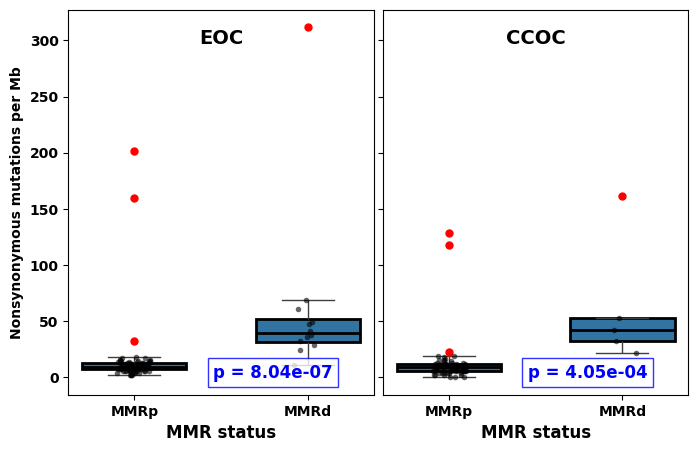

In [52]:
# ANALYZE TMB SCORE BY HISTOTYPE AND MMR STATUS #################

# Uncomment to import if not done previously
#import seaborn as sns  # Library for statistical data visualization
#from scipy.stats import shapiro  # Function to test normality of data (Shapiro-Wilk test)
#from scipy.stats import levene  # Function to test equality of variances (Levene's test)
#from scipy.stats import ttest_ind  # Function for independent two-sample t-test
#from scipy.stats import mannwhitneyu  # Function for Mann-Whitney U test (non-parametric test for two groups)

def analyze_and_plot_tmb_side_by_side_custom(df_eoc, df_cc, output_folder, output_file):
    # Prepare data: convert TMB to numeric and drop NaNs
    def prepare_data(df):
        df = df.copy()
        df['TMB'] = pd.to_numeric(df['TMB'], errors='coerce')
        return df.dropna(subset=['TMB'])

    # Apply data preparation to both dataframes
    df_eoc = prepare_data(df_eoc)
    df_cc = prepare_data(df_cc)

    # Print descriptive statistics for each group (MMR status)
    def print_descriptive_stats_by_group(df, histotype_label):
        print(f"\nDescriptive statistics for {histotype_label} by MMR status:")
        grouped = df.groupby('MMR_final_status')['TMB']
        for group_name, group_data in grouped:
            print(f"  MMR Status: {group_name}")
            print(f"    Median: {group_data.median()}")
            print(f"    Mean: {group_data.mean():.2f}")
            print(f"    Standard Deviation: {group_data.std():.2f}")
            print(f"    Q1 (25th percentile): {group_data.quantile(0.25)}")
            print(f"    Q3 (75th percentile): {group_data.quantile(0.75)}")
            print(f"    Count: {group_data.count()}")

    # Remove outliers based on IQR rule
    def filter_outliers(df):
        categories = df['MMR_final_status'].unique()
        non_outliers = pd.DataFrame()
        for category in categories:
            category_data = df[df['MMR_final_status'] == category]
            Q1 = category_data['TMB'].quantile(0.25)
            Q3 = category_data['TMB'].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            filtered = category_data[
                (category_data['TMB'] >= lower_bound) &
                (category_data['TMB'] <= upper_bound)
            ]
            non_outliers = pd.concat([non_outliers, filtered])
        return non_outliers

    # Annotate outliers on the plots
    def annotate_outliers(ax, df, title):
        categories = df['MMR_final_status'].unique()
        for category in categories:
            category_data = df[df['MMR_final_status'] == category]
            Q1 = category_data['TMB'].quantile(0.25)
            Q3 = category_data['TMB'].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = category_data[
                (category_data['TMB'] < lower_bound) |
                (category_data['TMB'] > upper_bound)
            ]
            ax.plot(
                outliers['MMR_final_status'], outliers['TMB'], 'o',
                color='red', markersize=5, label='Outliers' if category == categories[0] else ""
            )
            if not outliers.empty:
                print(f"Outliers in {title} - MMR Status '{category}':")
                print(outliers[['ID_CNIO', 'MMR_final_status', 'TMB']])
                print("-" * 40)
        ax.set_xlabel('MMR status', fontsize=12, fontweight='bold')

    # Annotate p-values based on statistical tests
    def annotate_pvalue(ax, df):
        categories = df['MMR_final_status'].unique()
        if len(categories) == 2:
            group1 = df[df['MMR_final_status'] == categories[0]]['TMB']
            group2 = df[df['MMR_final_status'] == categories[1]]['TMB']

            # Perform normality and variance tests
            shapiro1 = shapiro(group1)
            shapiro2 = shapiro(group2)
            levene_test = levene(group1, group2)

            # Choose the statistical test based on assumptions
            if shapiro1.pvalue > 0.05 and shapiro2.pvalue > 0.05 and levene_test.pvalue > 0.05:
                test_stat, p_value = ttest_ind(group1, group2).statistic, ttest_ind(group1, group2).pvalue
                test_name = "T-test"
            else:
                test_stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided').statistic, \
                                     mannwhitneyu(group1, group2, alternative='two-sided').pvalue
                test_name = "Mann-Whitney U"

            # Add p-value annotation to the plot
            ax.text(
                x=0.8,y=-4,
                s=f"p = {p_value:.2e}",
                horizontalalignment='center', verticalalignment='bottom',
                fontsize=12, color='blue', fontweight='bold',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='blue')
            )

    # Print descriptive statistics for each dataset
    print_descriptive_stats_by_group(df_eoc, "EOC")
    print_descriptive_stats_by_group(df_cc, "CCOC")

    # Filter outliers
    df_eoc_filtered = filter_outliers(df_eoc)
    df_cc_filtered = filter_outliers(df_cc)

    # Create side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(8, 5), sharey=True)
    plt.subplots_adjust(wspace=0.03)

    # Plot EOC data
    sns.boxplot(
        x='MMR_final_status', y='TMB', data=df_eoc,
        ax=axes[0], width=0.6, showfliers=False,
        boxprops=dict(linewidth=2, edgecolor='black'),
        medianprops=dict(linewidth=2, color='black')
    )
    sns.stripplot(
        x='MMR_final_status', y='TMB', data=df_eoc_filtered,
        ax=axes[0], color='black', alpha=0.6, jitter=True, size=4
    )
    annotate_outliers(axes[0], df_eoc, 'EOC')
    annotate_pvalue(axes[0], df_eoc)
    axes[0].set_ylabel('Nonsynonymous mutations per Mb', fontsize=10, fontweight='bold')
    axes[0].set_xlabel('MMR status', fontsize=12, fontweight='bold')
    axes[0].tick_params(axis='y', labelsize=10)
    axes[0].tick_params(axis='x', labelsize=10)
    for label in axes[0].get_xticklabels() + axes[0].get_yticklabels():
        label.set_fontweight('bold')
    axes[0].text(0.5, 0.9, 'EOC', ha='center', va='bottom', fontsize=14, fontweight='bold', transform=axes[0].transAxes)

    # Plot CCOC data
    sns.boxplot(
        x='MMR_final_status', y='TMB', data=df_cc,
        ax=axes[1], width=0.6, showfliers=False,
        boxprops=dict(linewidth=2, edgecolor='black'),
        medianprops=dict(linewidth=2, color='black')
    )
    sns.stripplot(
        x='MMR_final_status', y='TMB', data=df_cc_filtered,
        ax=axes[1], color='black', alpha=0.6, jitter=True, size=4
    )
    annotate_outliers(axes[1], df_cc, 'CCOC')
    annotate_pvalue(axes[1], df_cc)
    axes[1].set_ylabel('', fontweight='bold')
    axes[1].set_xlabel('MMR status', fontsize=12, fontweight='bold')
    axes[1].tick_params(axis='y', labelsize=10)
    axes[1].tick_params(axis='x', labelsize=10)
    for label in axes[1].get_xticklabels() + axes[1].get_yticklabels():
        label.set_fontweight('bold')
    axes[1].text(0.5, 0.9, 'CCOC', ha='center', va='bottom', fontsize=14, fontweight='bold', transform=axes[1].transAxes)

    # Save figure with adjusted DPI and figure size
    plt.savefig(f'{output_folder}/{output_file}', format='png', dpi=150)  
    plt.show()

# Define output folder and file and call the function
output_folder = '/home/vant/TFM/Plots_TFM_final/'
output_file = 'Boxplot_EOC_CCOC_TMB_by_MMR_status.png'
analyze_and_plot_tmb_side_by_side_custom(df_endometroid, df_cc, output_folder, output_file)


Descriptive statistics for EOC by MMR status:
  MMR Status: MMRd
    Median: 39.67481763753465
    Mean: 62.36
    Standard Deviation: 80.07
    Q1 (25th percentile): 31.173071000920103
    Q3 (75th percentile): 51.8119627294009
    Count: 12
  MMR Status: MMRp
    Median: 9.06117197198286
    Mean: 13.96
    Standard Deviation: 27.94
    Q1 (25th percentile): 7.24893757758629
    Q3 (75th percentile): 12.685640760776
    Count: 77

Descriptive statistics for CCOC by MMR status:
  MMR Status: MMRd
    Median: 41.6813910711211
    Mean: 62.05
    Standard Deviation: 56.65
    Q1 (25th percentile): 32.6202190991383
    Q3 (75th percentile): 52.8997568500462
    Count: 5
  MMR Status: MMRp
    Median: 9.06117197198286
    Mean: 11.82
    Standard Deviation: 19.55
    Q1 (25th percentile): 5.43670318318971
    Q3 (75th percentile): 11.3356621821528
    Count: 72
Min and max values for TMB (EOC): 1.81223439439657, 311.70431583621
Min and max values for TMB (CCOC): 0.0, 161.288861101295
Out

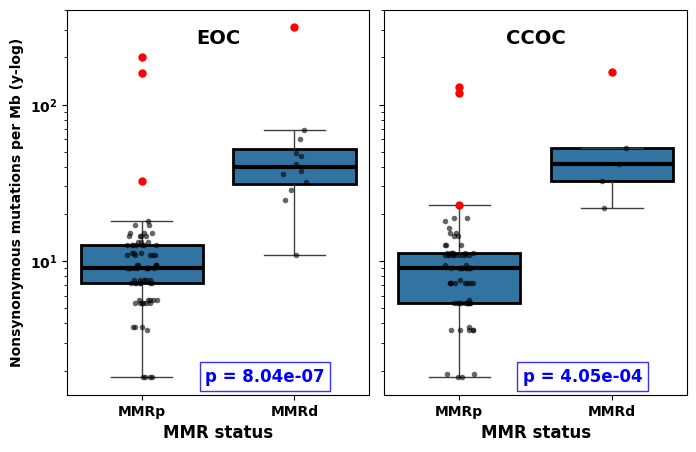

In [53]:
# ANALYZE TMB SCORE BY HISTOTYPE AND MMR STATUS USING Y-LOG SCALE #################

# Uncomment to import if not done previously
#import seaborn as sns  # Library for statistical data visualization
#from scipy.stats import shapiro  # Function to test normality of data (Shapiro-Wilk test)
#from scipy.stats import levene  # Function to test equality of variances (Levene's test)
#from scipy.stats import ttest_ind  # Function for independent two-sample t-test
#from scipy.stats import mannwhitneyu  # Function for Mann-Whitney U test (non-parametric test for two groups)

# Main function to analyze and plot TMB data
def analyze_and_plot_tmb_side_by_side_custom(df_eoc, df_cc, output_folder, output_file):
    # Prepare data: convert TMB to numeric and drop NaNs
    def prepare_data(df):
        df = df.copy()
        df['TMB'] = pd.to_numeric(df['TMB'], errors='coerce')
        return df.dropna(subset=['TMB'])

    # Apply data preparation to both dataframes
    df_eoc = prepare_data(df_eoc)
    df_cc = prepare_data(df_cc)

    # Print descriptive statistics for each group (MMR status)
    def print_descriptive_stats_by_group(df, histotype_label):
        print(f"\nDescriptive statistics for {histotype_label} by MMR status:")
        grouped = df.groupby('MMR_final_status')['TMB']
        for group_name, group_data in grouped:
            print(f"  MMR Status: {group_name}")
            print(f"    Median: {group_data.median()}")
            print(f"    Mean: {group_data.mean():.2f}")
            print(f"    Standard Deviation: {group_data.std():.2f}")
            print(f"    Q1 (25th percentile): {group_data.quantile(0.25)}")
            print(f"    Q3 (75th percentile): {group_data.quantile(0.75)}")
            print(f"    Count: {group_data.count()}")

    # Remove outliers based on IQR rule
    def filter_outliers(df):
        categories = df['MMR_final_status'].unique()
        non_outliers = pd.DataFrame()
        for category in categories:
            category_data = df[df['MMR_final_status'] == category]
            Q1 = category_data['TMB'].quantile(0.25)
            Q3 = category_data['TMB'].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            filtered = category_data[
                (category_data['TMB'] >= lower_bound) &
                (category_data['TMB'] <= upper_bound)
            ]
            non_outliers = pd.concat([non_outliers, filtered])
        return non_outliers

    # Annotate outliers on the plots
    def annotate_outliers(ax, df, title):
        categories = df['MMR_final_status'].unique()
        for category in categories:
            category_data = df[df['MMR_final_status'] == category]
            Q1 = category_data['TMB'].quantile(0.25)
            Q3 = category_data['TMB'].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = category_data[
                (category_data['TMB'] < lower_bound) |
                (category_data['TMB'] > upper_bound)
            ]
            ax.plot(
                outliers['MMR_final_status'], outliers['TMB'], 'o',
                color='red', markersize=5, label='Outliers' if category == categories[0] else ""
            )
            if not outliers.empty:
                print(f"Outliers in {title} - MMR Status '{category}':")
                print(outliers[['ID_CNIO', 'MMR_final_status', 'TMB']])
                print("-" * 40)
        ax.set_xlabel('MMR status')

    # Annotate p-values based on statistical tests
    def annotate_pvalue(ax, df):
        categories = df['MMR_final_status'].unique()
        if len(categories) == 2:
            group1 = df[df['MMR_final_status'] == categories[0]]['TMB']
            group2 = df[df['MMR_final_status'] == categories[1]]['TMB']

            # Perform normality and variance tests
            shapiro1 = shapiro(group1)
            shapiro2 = shapiro(group2)
            levene_test = levene(group1, group2)

            # Choose the statistical test based on assumptions
            if shapiro1.pvalue > 0.05 and shapiro2.pvalue > 0.05 and levene_test.pvalue > 0.05:
                test_stat, p_value = ttest_ind(group1, group2).statistic, ttest_ind(group1, group2).pvalue
                test_name = "T-test"
            else:
                test_stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided').statistic, \
                                     mannwhitneyu(group1, group2, alternative='two-sided').pvalue
                test_name = "Mann-Whitney U"

            # Add p-value annotation to the plot
            ax.text(
                x=1.2, y=1.6,
                s=f"p = {p_value:.2e}",
                horizontalalignment='right', verticalalignment='bottom',
                fontsize=12, color='blue', fontweight='bold',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='blue')
            )

    # Print descriptive statistics for each dataset
    print_descriptive_stats_by_group(df_eoc, "EOC")
    print_descriptive_stats_by_group(df_cc, "CCOC")

    # Check for extreme TMB values (outliers)
    print(f"Min and max values for TMB (EOC): {df_eoc['TMB'].min()}, {df_eoc['TMB'].max()}")
    print(f"Min and max values for TMB (CCOC): {df_cc['TMB'].min()}, {df_cc['TMB'].max()}")

    # Adjust the figure size to avoid large dimensions
    fig, axes = plt.subplots(1, 2, figsize=(8, 5), sharey=True)  # Use a more reasonable figsize
    plt.subplots_adjust(wspace=0.05)
    # Remove the constant addition to TMB for true values
    # We will only proceed with the data as is for the log scale
    df_eoc_filtered = filter_outliers(df_eoc)
    df_cc_filtered = filter_outliers(df_cc)

    # Plot EOC data with log scale
    sns.boxplot(
        x='MMR_final_status', y='TMB', data=df_eoc,
        ax=axes[0], width=0.8, showfliers=False,
        boxprops=dict(linewidth=2, edgecolor='black'),  
        medianprops=dict(linewidth=3, color='black')  
    )
    sns.stripplot(
        x='MMR_final_status', y='TMB', data=df_eoc_filtered,
        ax=axes[0], color='black', alpha=0.6, jitter=True, size=4
    )
    annotate_outliers(axes[0], df_eoc, 'EOC')
    annotate_pvalue(axes[0], df_eoc)
    axes[0].set_ylabel('Nonsynonymous mutations per Mb (y-log)', fontsize=10, fontweight='bold')
    axes[0].set_xlabel('MMR status', fontsize=12, fontweight='bold')
    axes[0].set_yscale('log')  # Log scale for EOC plot
    axes[0].tick_params(axis='y', labelsize=10)  # Bold Y-axis numbers
    axes[0].tick_params(axis='x', labelsize=10)  # Bold X-axis labels
    for label in axes[0].get_xticklabels() + axes[0].get_yticklabels():
        label.set_fontweight('bold')  # Set font weight for tick labels
    # Add the "EOC" title to the left plot
    axes[0].text(0.5, 0.9, 'EOC', ha='center', va='bottom', fontsize=14, fontweight='bold', transform=axes[0].transAxes)

    # Plot CCOC data with log scale
    sns.boxplot(
        x='MMR_final_status', y='TMB', data=df_cc,
        ax=axes[1], width=0.8, showfliers=False,
        boxprops=dict(linewidth=2, edgecolor='black'),  
        medianprops=dict(linewidth=3, color='black')  
    )
    sns.stripplot(
        x='MMR_final_status', y='TMB', data=df_cc_filtered,
        ax=axes[1], color='black', alpha=0.6, jitter=True, size=4
    )
    annotate_outliers(axes[1], df_cc, 'CCOC')
    annotate_pvalue(axes[1], df_cc)
    axes[1].set_ylabel('', fontweight='bold')
    axes[1].set_xlabel('MMR status', fontsize=12, fontweight='bold')
    axes[1].set_yscale('log')  # Log scale for CCOC plot
    axes[1].tick_params(axis='y', labelsize=10)  # Bold Y-axis numbers
    axes[1].tick_params(axis='x', labelsize=10)  # Bold X-axis labels
    for label in axes[1].get_xticklabels() + axes[1].get_yticklabels():
        label.set_fontweight('bold')  # Set font weight for tick labels
    # Add the "CCOC" title to the right plot
    axes[1].text(0.5, 0.9, 'CCOC', ha='center', va='bottom', fontsize=14, fontweight='bold', transform=axes[1].transAxes)
    
    # Save figure with adjusted DPI and figure size
    plt.savefig(f'{output_folder}/{output_file}', format='png', dpi=150)  # Lower DPI for smaller image size
    plt.show()

# Define output folder and file and call the function
output_folder = '/home/vant/TFM/Plots_TFM_final/'
output_file = 'Boxplot_EOC_CCOC_TMB_by_MMR_status_LOGFINAL.png'
analyze_and_plot_tmb_side_by_side_custom(df_endometroid, df_cc, output_folder, output_file)


Descriptive statistics for EOC by MMR status:
  MMR Status: MMRd
    Median: 36.8409020919965
    Mean: 36.78
    Standard Deviation: 13.97
    Q1 (25th percentile): 29.283793970561298
    Q3 (75th percentile): 45.8149679862007
    Count: 10
  MMR Status: MMRp
    Median: 9.06117197198286
    Mean: 11.50
    Standard Deviation: 17.83
    Q1 (25th percentile): 6.853660955958812
    Q3 (75th percentile): 12.685640760776
    Count: 76

Descriptive statistics for CCOC by MMR status:
  MMR Status: MMRd
    Median: 37.150805085129704
    Mean: 64.33
    Standard Deviation: 65.15
    Q1 (25th percentile): 29.901867507543454
    Q3 (75th percentile): 71.58325857866457
    Count: 4
  MMR Status: MMRp
    Median: 9.06117197198286
    Mean: 8.57
    Standard Deviation: 4.72
    Q1 (25th percentile): 5.43670318318971
    Q3 (75th percentile): 10.8734063663794
    Count: 69
Min and max values for TMB (EOC): 1.81223439439657, 159.476626706898
Min and max values for TMB (CCOC): 0.0, 161.288861101295

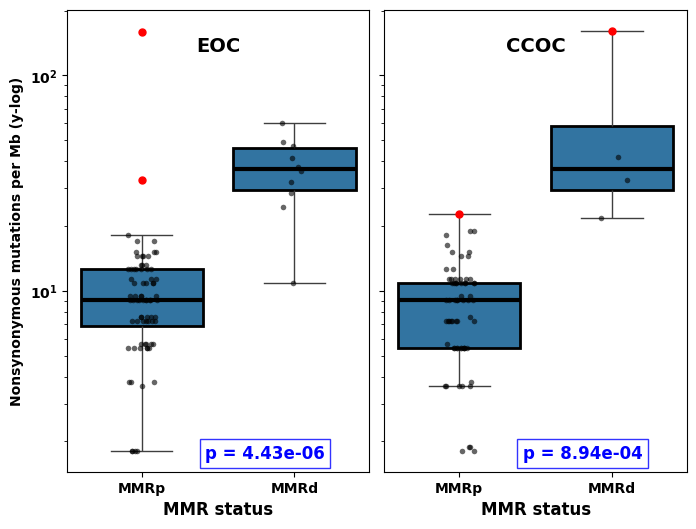

In [54]:
# ANALYZE TMB SCORE BY HISTOTYPE AND MMR STATUS USING Y-LOG SCALE WITHOUT POLE CASES #################

# Uncomment to import if not done previously
#import seaborn as sns  # Library for statistical data visualization
#from scipy.stats import shapiro  # Function to test normality of data (Shapiro-Wilk test)
#from scipy.stats import levene  # Function to test equality of variances (Levene's test)
#from scipy.stats import ttest_ind  # Function for independent two-sample t-test
#from scipy.stats import mannwhitneyu  # Function for Mann-Whitney U test (non-parametric test for two groups)

# Main function to analyze and plot TMB data
def analyze_and_plot_tmb_side_by_side_custom(df_eoc, df_cc, output_folder, output_file):
    # Apply the filter to only keep samples where 'Pol_mutation' is 'NO'
    df_eoc = df_eoc[df_eoc['Pol_mutation'] == 'NO']
    df_cc = df_cc[df_cc['Pol_mutation'] == 'NO']
    # Prepare data: convert TMB to numeric and drop NaNs
    def prepare_data(df):
        df = df.copy()
        df['TMB'] = pd.to_numeric(df['TMB'], errors='coerce')
        return df.dropna(subset=['TMB'])

    # Apply data preparation to both dataframes
    df_eoc = prepare_data(df_eoc)
    df_cc = prepare_data(df_cc)

    # Print descriptive statistics for each group (MMR status)
    def print_descriptive_stats_by_group(df, histotype_label):
        print(f"\nDescriptive statistics for {histotype_label} by MMR status:")
        grouped = df.groupby('MMR_final_status')['TMB']
        for group_name, group_data in grouped:
            print(f"  MMR Status: {group_name}")
            print(f"    Median: {group_data.median()}")
            print(f"    Mean: {group_data.mean():.2f}")
            print(f"    Standard Deviation: {group_data.std():.2f}")
            print(f"    Q1 (25th percentile): {group_data.quantile(0.25)}")
            print(f"    Q3 (75th percentile): {group_data.quantile(0.75)}")
            print(f"    Count: {group_data.count()}")

    # Remove outliers based on IQR rule
    def filter_outliers(df):
        categories = df['MMR_final_status'].unique()
        non_outliers = pd.DataFrame()
        for category in categories:
            category_data = df[df['MMR_final_status'] == category]
            Q1 = category_data['TMB'].quantile(0.25)
            Q3 = category_data['TMB'].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            filtered = category_data[
                (category_data['TMB'] >= lower_bound) &
                (category_data['TMB'] <= upper_bound)
            ]
            non_outliers = pd.concat([non_outliers, filtered])
        return non_outliers

    # Annotate outliers on the plots
    def annotate_outliers(ax, df, title):
        categories = df['MMR_final_status'].unique()
        for category in categories:
            category_data = df[df['MMR_final_status'] == category]
            Q1 = category_data['TMB'].quantile(0.25)
            Q3 = category_data['TMB'].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = category_data[
                (category_data['TMB'] < lower_bound) |
                (category_data['TMB'] > upper_bound)
            ]
            ax.plot(
                outliers['MMR_final_status'], outliers['TMB'], 'o',
                color='red', markersize=5, label='Outliers' if category == categories[0] else ""
            )
            if not outliers.empty:
                print(f"Outliers in {title} - MMR Status '{category}':")
                print(outliers[['ID_CNIO', 'MMR_final_status', 'TMB']])
                print("-" * 40)
        ax.set_xlabel('MMR status')

    # Annotate p-values based on statistical tests
    def annotate_pvalue(ax, df):
        categories = df['MMR_final_status'].unique()
        if len(categories) == 2:
            group1 = df[df['MMR_final_status'] == categories[0]]['TMB']
            group2 = df[df['MMR_final_status'] == categories[1]]['TMB']

            # Perform normality and variance tests
            shapiro1 = shapiro(group1)
            shapiro2 = shapiro(group2)
            levene_test = levene(group1, group2)

            # Choose the statistical test based on assumptions
            if shapiro1.pvalue > 0.05 and shapiro2.pvalue > 0.05 and levene_test.pvalue > 0.05:
                test_stat, p_value = ttest_ind(group1, group2).statistic, ttest_ind(group1, group2).pvalue
                test_name = "T-test"
            else:
                test_stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided').statistic, \
                                     mannwhitneyu(group1, group2, alternative='two-sided').pvalue
                test_name = "Mann-Whitney U"

            # Add p-value annotation to the plot
            ax.text(
                x=1.2, y=1.6,
                s=f"p = {p_value:.2e}",
                horizontalalignment='right', verticalalignment='bottom',
                fontsize=12, color='blue', fontweight='bold',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='blue')
            )

    # Print descriptive statistics for each dataset
    print_descriptive_stats_by_group(df_eoc, "EOC")
    print_descriptive_stats_by_group(df_cc, "CCOC")

    # Check for extreme TMB values (outliers)
    print(f"Min and max values for TMB (EOC): {df_eoc['TMB'].min()}, {df_eoc['TMB'].max()}")
    print(f"Min and max values for TMB (CCOC): {df_cc['TMB'].min()}, {df_cc['TMB'].max()}")

    # Adjust the figure size to avoid large dimensions
    fig, axes = plt.subplots(1, 2, figsize=(8, 6), sharey=True)  # Use a more reasonable figsize
    plt.subplots_adjust(wspace=0.05)
    # Remove the constant addition to TMB for true values
    # We will only proceed with the data as is for the log scale
    df_eoc_filtered = filter_outliers(df_eoc)
    df_cc_filtered = filter_outliers(df_cc)

    # Plot EOC data with log scale
    sns.boxplot(
        x='MMR_final_status', y='TMB', data=df_eoc,
        ax=axes[0], width=0.8, showfliers=False,
        boxprops=dict(linewidth=2, edgecolor='black'),  
        medianprops=dict(linewidth=3, color='black')  
    )
    sns.stripplot(
        x='MMR_final_status', y='TMB', data=df_eoc_filtered,
        ax=axes[0], color='black', alpha=0.6, jitter=True, size=4
    )
    annotate_outliers(axes[0], df_eoc, 'EOC')
    annotate_pvalue(axes[0], df_eoc)
    axes[0].set_ylabel('Nonsynonymous mutations per Mb (y-log)', fontsize=10, fontweight='bold')
    axes[0].set_xlabel('MMR status', fontsize=12, fontweight='bold')
    axes[0].set_yscale('log')  # Log scale for EOC plot
    axes[0].tick_params(axis='y', labelsize=10)  # Bold Y-axis numbers
    axes[0].tick_params(axis='x', labelsize=10)  # Bold X-axis labels
    for label in axes[0].get_xticklabels() + axes[0].get_yticklabels():
        label.set_fontweight('bold')  # Set font weight for tick labels
    # Add the "EOC" title to the left plot
    axes[0].text(0.5, 0.9, 'EOC', ha='center', va='bottom', fontsize=14, fontweight='bold', transform=axes[0].transAxes)

    # Plot CCOC data with log scale
    sns.boxplot(
        x='MMR_final_status', y='TMB', data=df_cc,
        ax=axes[1], width=0.8, showfliers=False,
        boxprops=dict(linewidth=2, edgecolor='black'),  
        medianprops=dict(linewidth=3, color='black')  
    )
    sns.stripplot(
        x='MMR_final_status', y='TMB', data=df_cc_filtered,
        ax=axes[1], color='black', alpha=0.6, jitter=True, size=4
    )
    annotate_outliers(axes[1], df_cc, 'CCOC')
    annotate_pvalue(axes[1], df_cc)
    axes[1].set_ylabel('', fontweight='bold')
    axes[1].set_xlabel('MMR status', fontsize=12, fontweight='bold')
    axes[1].set_yscale('log')  # Log scale for CCOC plot
    axes[1].tick_params(axis='y', labelsize=10)  # Bold Y-axis numbers
    axes[1].tick_params(axis='x', labelsize=10)  # Bold X-axis labels
    for label in axes[1].get_xticklabels() + axes[1].get_yticklabels():
        label.set_fontweight('bold')  # Set font weight for tick labels
    # Add the "CCOC" title to the right plot
    axes[1].text(0.5, 0.9, 'CCOC', ha='center', va='bottom', fontsize=14, fontweight='bold', transform=axes[1].transAxes)
    
    # Save figure with adjusted DPI and figure size
    plt.savefig(f'{output_folder}/{output_file}', format='png', dpi=150)  # Lower DPI for smaller image size
    plt.show()

# Define output folder and file and call the function
output_folder = '/home/vant/TFM/Plots_TFM_final/'
output_file = 'Boxplot_EOC_CCOC_TMB_by_MMR_status_NOPOLELOGFINAL.png'
analyze_and_plot_tmb_side_by_side_custom(df_endometroid, df_cc, output_folder, output_file)


Descriptive statistics for EOC by MMR status:
  MMR Status: MMRd
    Median: 0.6416204236239955
    Mean: 2.96
    Standard Deviation: 5.08
    Q1 (25th percentile): 0.0
    Q3 (75th percentile): 4.255565916821275
    Count: 12
  MMR Status: MMRp
    Median: 9.0445270253556
    Mean: 17.72
    Standard Deviation: 19.56
    Q1 (25th percentile): 1.65429817563389
    Q3 (75th percentile): 28.9734084415584
    Count: 77

Descriptive statistics for CCOC by MMR status:
  MMR Status: MMRd
    Median: 5.62770581323439
    Mean: 10.58
    Standard Deviation: 16.67
    Q1 (25th percentile): 0.448361286332715
    Q3 (75th percentile): 6.91094632034632
    Count: 5
  MMR Status: MMRp
    Median: 23.2142861626469
    Mean: 32.38
    Standard Deviation: 26.66
    Q1 (25th percentile): 7.602814022881877
    Q3 (75th percentile): 56.9534644635127
    Count: 72
Outliers in EOC - MMR Status 'MMRp':
   ID_CNIO MMR_final_status  %genome_altered
10    LP14             MMRp        72.155227
51    LP63    

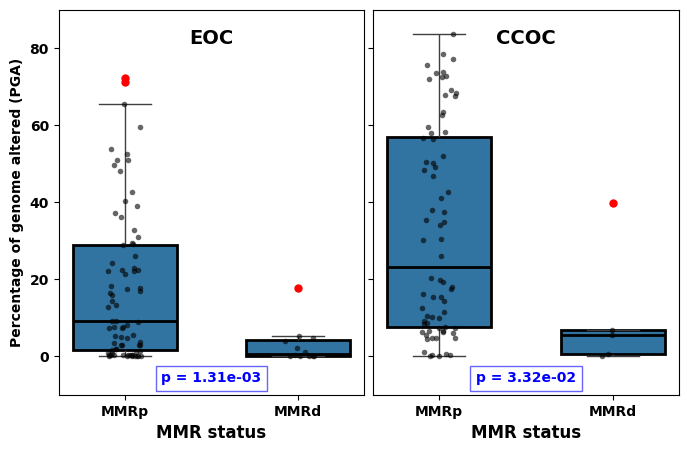

In [55]:
## ANALYZE PGA BY HISTOTYPE AND MMR STATUS #################

# Uncomment to import if not done previously
#import seaborn as sns  # Library for statistical data visualization
#from scipy.stats import shapiro  # Function to test normality of data (Shapiro-Wilk test)
#from scipy.stats import levene  # Function to test equality of variances (Levene's test)
#from scipy.stats import ttest_ind  # Function for independent two-sample t-test
#from scipy.stats import mannwhitneyu  # Function for Mann-Whitney U test (non-parametric test for two groups)

## ANALYZE PERCENTAGE OF GENOME ALTERED BY HISTOTYPE AND MMR STATUS #################
def analyze_and_plot_genome_altered_side_by_side_custom(df_eoc, df_cc, output_folder, output_file):
    # Prepare data: convert %genome_altered to numeric and drop NaNs
    def prepare_data(df):
        df = df.copy()
        df['%genome_altered'] = pd.to_numeric(df['%genome_altered'], errors='coerce')
        return df.dropna(subset=['%genome_altered'])

    # Apply data preparation to both dataframes
    df_eoc = prepare_data(df_eoc)
    df_cc = prepare_data(df_cc)

    # Print descriptive statistics for each group (MMR status)
    def print_descriptive_stats_by_group(df, histotype_label):
        print(f"\nDescriptive statistics for {histotype_label} by MMR status:")
        grouped = df.groupby('MMR_final_status')['%genome_altered']
        for group_name, group_data in grouped:
            print(f"  MMR Status: {group_name}")
            print(f"    Median: {group_data.median()}")
            print(f"    Mean: {group_data.mean():.2f}")
            print(f"    Standard Deviation: {group_data.std():.2f}")
            print(f"    Q1 (25th percentile): {group_data.quantile(0.25)}")
            print(f"    Q3 (75th percentile): {group_data.quantile(0.75)}")
            print(f"    Count: {group_data.count()}")

    # Remove outliers based on IQR rule
    def filter_outliers(df):
        categories = df['MMR_final_status'].unique()
        non_outliers = pd.DataFrame()
        for category in categories:
            category_data = df[df['MMR_final_status'] == category]
            Q1 = category_data['%genome_altered'].quantile(0.25)
            Q3 = category_data['%genome_altered'].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            filtered = category_data[
                (category_data['%genome_altered'] >= lower_bound) &
                (category_data['%genome_altered'] <= upper_bound)
            ]
            non_outliers = pd.concat([non_outliers, filtered])
        return non_outliers

    # Annotate outliers on the plots
    def annotate_outliers(ax, df, title):
        categories = df['MMR_final_status'].unique()
        for category in categories:
            category_data = df[df['MMR_final_status'] == category]
            Q1 = category_data['%genome_altered'].quantile(0.25)
            Q3 = category_data['%genome_altered'].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = category_data[
                (category_data['%genome_altered'] < lower_bound) |
                (category_data['%genome_altered'] > upper_bound)
            ]
            ax.plot(
                outliers['MMR_final_status'], outliers['%genome_altered'], 'o',
                color='red', markersize=5, label='Outliers' if category == categories[0] else ""
            )
            if not outliers.empty:
                print(f"Outliers in {title} - MMR Status '{category}':")
                print(outliers[['ID_CNIO', 'MMR_final_status', '%genome_altered']])
                print("-" * 40)
        ax.set_xlabel('MMR status', fontsize=12, fontweight='bold')

    # Annotate p-values based on statistical tests
    def annotate_pvalue(ax, df):
        categories = df['MMR_final_status'].unique()
        if len(categories) == 2:
            group1 = df[df['MMR_final_status'] == categories[0]]['%genome_altered']
            group2 = df[df['MMR_final_status'] == categories[1]]['%genome_altered']

            # Perform normality and variance tests
            shapiro1 = shapiro(group1)
            shapiro2 = shapiro(group2)
            levene_test = levene(group1, group2)

            # Choose the statistical test based on assumptions
            if shapiro1.pvalue > 0.05 and shapiro2.pvalue > 0.05 and levene_test.pvalue > 0.05:
                test_stat, p_value = ttest_ind(group1, group2).statistic, ttest_ind(group1, group2).pvalue
                test_name = "T-test"
            else:
                test_stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided').statistic, \
                                     mannwhitneyu(group1, group2, alternative='two-sided').pvalue
                test_name = "Mann-Whitney U"

            # Add p-value annotation to the plot
            ax.text(
                x=0.5, y=-7.5,
                s=f"p = {p_value:.2e}",
                horizontalalignment='center', verticalalignment='bottom',
                fontsize=10, color='blue', fontweight='bold',
                bbox=dict(facecolor='white', alpha=0.6, edgecolor='blue')
            )

    # Print descriptive statistics for each dataset
    print_descriptive_stats_by_group(df_eoc, "EOC")
    print_descriptive_stats_by_group(df_cc, "CCOC")

    # Filter outliers
    df_eoc_filtered = filter_outliers(df_eoc)
    df_cc_filtered = filter_outliers(df_cc)

    # Create side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(8, 5), sharey=True)
    plt.subplots_adjust(wspace=0.03)

    # Plot EOC data
    sns.boxplot(
        x='MMR_final_status', y='%genome_altered', data=df_eoc,
        ax=axes[0], width=0.6, showfliers=False,
        boxprops=dict(linewidth=2, edgecolor='black'),
        medianprops=dict(linewidth=2, color='black')
    )
    sns.stripplot(
        x='MMR_final_status', y='%genome_altered', data=df_eoc_filtered,
        ax=axes[0], color='black', alpha=0.6, jitter=True, size=4
    )
    annotate_outliers(axes[0], df_eoc, 'EOC')
    annotate_pvalue(axes[0], df_eoc)
    axes[0].set_ylabel('Percentage of genome altered (PGA)', fontsize=10, fontweight='bold')
    axes[0].set_xlabel('MMR status', fontsize=12, fontweight='bold')
    axes[0].tick_params(axis='y', labelsize=10)
    axes[0].tick_params(axis='x', labelsize=10)
    axes[0].set_ylim(-10,90)
    for label in axes[0].get_xticklabels() + axes[0].get_yticklabels():
        label.set_fontweight('bold')
    axes[0].text(0.5, 0.9, 'EOC', ha='center', va='bottom', fontsize=14, fontweight='bold', transform=axes[0].transAxes)

    # Plot CCOC data
    sns.boxplot(
        x='MMR_final_status', y='%genome_altered', data=df_cc,
        ax=axes[1], width=0.6, showfliers=False,
        boxprops=dict(linewidth=2, edgecolor='black'),
        medianprops=dict(linewidth=2, color='black')
    )
    sns.stripplot(
        x='MMR_final_status', y='%genome_altered', data=df_cc_filtered,
        ax=axes[1], color='black', alpha=0.6, jitter=True, size=4
    )
    annotate_outliers(axes[1], df_cc, 'CCOC')
    annotate_pvalue(axes[1], df_cc)
    axes[1].set_ylabel('', fontweight='bold')
    axes[1].set_xlabel('MMR status', fontsize=12, fontweight='bold')
    axes[1].tick_params(axis='y', labelsize=10)
    axes[1].tick_params(axis='x', labelsize=10)
    axes[1].set_ylim(-10,90)
    for label in axes[1].get_xticklabels() + axes[1].get_yticklabels():
        label.set_fontweight('bold')
    axes[1].text(0.5, 0.9, 'CCOC', ha='center', va='bottom', fontsize=14, fontweight='bold', transform=axes[1].transAxes)

    # Save figure with adjusted DPI and figure size
    plt.savefig(f'{output_folder}/{output_file}', format='png', dpi=150)  
    plt.show()

# Define output folder and file and call the function
output_folder = '/home/vant/TFM/Plots_TFM_final/'
output_file = 'Boxplot_EOC_CCOC_GenomeAltered_by_MMR_status.png'
analyze_and_plot_genome_altered_side_by_side_custom(df_endometroid, df_cc, output_folder, output_file)


Descriptive statistics for EOC by MMR status:
  MMR Status: MMRd
    Median: 2.0
    Mean: 4.25
    Standard Deviation: 5.40
    Q1 (25th percentile): 0.0
    Q3 (75th percentile): 6.25
    Count: 12
  MMR Status: MMRp
    Median: 7.0
    Mean: 13.32
    Standard Deviation: 18.90
    Q1 (25th percentile): 3.0
    Q3 (75th percentile): 16.0
    Count: 77

Descriptive statistics for CCOC by MMR status:
  MMR Status: MMRd
    Median: 4.0
    Mean: 8.60
    Standard Deviation: 11.61
    Q1 (25th percentile): 4.0
    Q3 (75th percentile): 6.0
    Count: 5
  MMR Status: MMRp
    Median: 22.5
    Mean: 30.50
    Standard Deviation: 28.72
    Q1 (25th percentile): 7.75
    Q3 (75th percentile): 44.25
    Count: 72
Outliers in EOC - MMR Status 'MMRp':
    ID_CNIO MMR_final_status  CNV
19     LP26             MMRp   43
20     LP27             MMRp   45
21     LP28             MMRp   55
44     LP56             MMRp   39
51     LP63             MMRp   42
83     MDA2             MMRp  120
86     M

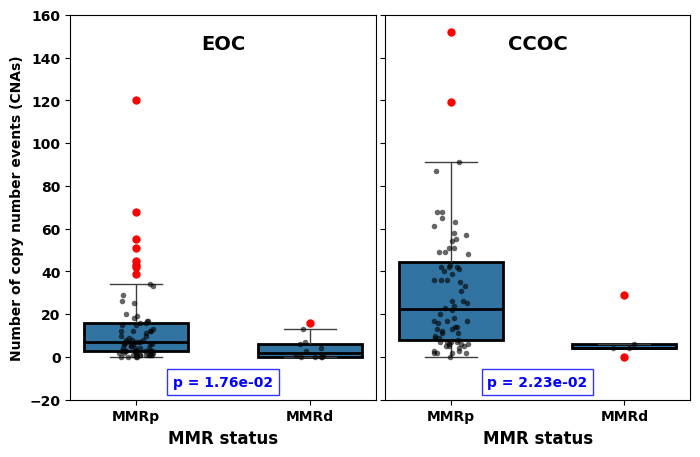

In [56]:
# ANALYZE CNAs BY HISTOTYPE AND MMR STATUS #################

# Uncomment to import if not done previously
#import seaborn as sns  # Library for statistical data visualization
#from scipy.stats import shapiro  # Function to test normality of data (Shapiro-Wilk test)
#from scipy.stats import levene  # Function to test equality of variances (Levene's test)
#from scipy.stats import ttest_ind  # Function for independent two-sample t-test
#from scipy.stats import mannwhitneyu  # Function for Mann-Whitney U test (non-parametric test for two groups)

## ANALYZE NUMBER OF COPY NUMBER EVENTS (CNV) BY HISTOTYPE AND MMR STATUS #################
def analyze_and_plot_cnv_side_by_side_custom(df_eoc, df_cc, output_folder, output_file):
    # Prepare data: convert CNV to numeric and drop NaNs
    def prepare_data(df):
        df = df.copy()
        df['CNV'] = pd.to_numeric(df['CNV'], errors='coerce')
        return df.dropna(subset=['CNV'])

    # Apply data preparation to both dataframes
    df_eoc = prepare_data(df_eoc)
    df_cc = prepare_data(df_cc)

    # Print descriptive statistics for each group (MMR status)
    def print_descriptive_stats_by_group(df, histotype_label):
        print(f"\nDescriptive statistics for {histotype_label} by MMR status:")
        grouped = df.groupby('MMR_final_status')['CNV']
        for group_name, group_data in grouped:
            print(f"  MMR Status: {group_name}")
            print(f"    Median: {group_data.median()}")
            print(f"    Mean: {group_data.mean():.2f}")
            print(f"    Standard Deviation: {group_data.std():.2f}")
            print(f"    Q1 (25th percentile): {group_data.quantile(0.25)}")
            print(f"    Q3 (75th percentile): {group_data.quantile(0.75)}")
            print(f"    Count: {group_data.count()}")

    # Remove outliers based on IQR rule
    def filter_outliers(df):
        categories = df['MMR_final_status'].unique()
        non_outliers = pd.DataFrame()
        for category in categories:
            category_data = df[df['MMR_final_status'] == category]
            Q1 = category_data['CNV'].quantile(0.25)
            Q3 = category_data['CNV'].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            filtered = category_data[
                (category_data['CNV'] >= lower_bound) &
                (category_data['CNV'] <= upper_bound)
            ]
            non_outliers = pd.concat([non_outliers, filtered])
        return non_outliers

    # Annotate outliers on the plots
    def annotate_outliers(ax, df, title):
        categories = df['MMR_final_status'].unique()
        for category in categories:
            category_data = df[df['MMR_final_status'] == category]
            Q1 = category_data['CNV'].quantile(0.25)
            Q3 = category_data['CNV'].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = category_data[
                (category_data['CNV'] < lower_bound) |
                (category_data['CNV'] > upper_bound)
            ]
            ax.plot(
                outliers['MMR_final_status'], outliers['CNV'], 'o',
                color='red', markersize=5, label='Outliers' if category == categories[0] else ""
            )
            if not outliers.empty:
                print(f"Outliers in {title} - MMR Status '{category}':")
                print(outliers[['ID_CNIO', 'MMR_final_status', 'CNV']])
                print("-" * 40)
        ax.set_xlabel('MMR status', fontsize=12, fontweight='bold')

    # Annotate p-values based on statistical tests
    def annotate_pvalue(ax, df):
        categories = df['MMR_final_status'].unique()
        if len(categories) == 2:
            group1 = df[df['MMR_final_status'] == categories[0]]['CNV']
            group2 = df[df['MMR_final_status'] == categories[1]]['CNV']

            # Perform normality and variance tests
            shapiro1 = shapiro(group1)
            shapiro2 = shapiro(group2)
            levene_test = levene(group1, group2)

            # Choose the statistical test based on assumptions
            if shapiro1.pvalue > 0.05 and shapiro2.pvalue > 0.05 and levene_test.pvalue > 0.05:
                test_stat, p_value = ttest_ind(group1, group2).statistic, ttest_ind(group1, group2).pvalue
                test_name = "T-test"
            else:
                test_stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided').statistic, \
                                     mannwhitneyu(group1, group2, alternative='two-sided').pvalue
                test_name = "Mann-Whitney U"

            # Add p-value annotation to the plot
            ax.text(
                x=0.5, y=-15,
                s=f"p = {p_value:.2e}",
                horizontalalignment='center', verticalalignment='bottom',
                fontsize=10, color='blue', fontweight='bold',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='blue')
            )

    # Print descriptive statistics for each dataset
    print_descriptive_stats_by_group(df_eoc, "EOC")
    print_descriptive_stats_by_group(df_cc, "CCOC")

    # Filter outliers
    df_eoc_filtered = filter_outliers(df_eoc)
    df_cc_filtered = filter_outliers(df_cc)

    # Create side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(8, 5), sharey=True)
    plt.subplots_adjust(wspace=0.03)

    # Plot EOC data
    sns.boxplot(
        x='MMR_final_status', y='CNV', data=df_eoc,
        ax=axes[0], width=0.6, showfliers=False,
        boxprops=dict(linewidth=2, edgecolor='black'),
        medianprops=dict(linewidth=2, color='black')
    )
    sns.stripplot(
        x='MMR_final_status', y='CNV', data=df_eoc_filtered,
        ax=axes[0], color='black', alpha=0.6, jitter=True, size=4
    )
    annotate_outliers(axes[0], df_eoc, 'EOC')
    annotate_pvalue(axes[0], df_eoc)
    axes[0].set_ylabel('Number of copy number events (CNAs)', fontsize=10, fontweight='bold')
    axes[0].set_xlabel('MMR status', fontsize=12, fontweight='bold')
    axes[0].tick_params(axis='y', labelsize=10)
    axes[0].tick_params(axis='x', labelsize=10)
    axes[0].set_ylim(-20,160)
    for label in axes[0].get_xticklabels() + axes[0].get_yticklabels():
        label.set_fontweight('bold')
    axes[0].text(0.5, 0.9, 'EOC', ha='center', va='bottom', fontsize=14, fontweight='bold', transform=axes[0].transAxes)

    # Plot CCOC data
    sns.boxplot(
        x='MMR_final_status', y='CNV', data=df_cc,
        ax=axes[1], width=0.6, showfliers=False,
        boxprops=dict(linewidth=2, edgecolor='black'),
        medianprops=dict(linewidth=2, color='black')
    )
    sns.stripplot(
        x='MMR_final_status', y='CNV', data=df_cc_filtered,
        ax=axes[1], color='black', alpha=0.6, jitter=True, size=4
    )
    annotate_outliers(axes[1], df_cc, 'CCOC')
    annotate_pvalue(axes[1], df_cc)
    axes[1].set_ylabel('', fontweight='bold')
    axes[1].set_xlabel('MMR status', fontsize=12, fontweight='bold')
    axes[1].tick_params(axis='y', labelsize=10)
    axes[1].tick_params(axis='x', labelsize=10)
    axes[1].set_ylim(-20,160)
    for label in axes[1].get_xticklabels() + axes[1].get_yticklabels():
        label.set_fontweight('bold')
    axes[1].text(0.5, 0.9, 'CCOC', ha='center', va='bottom', fontsize=14, fontweight='bold', transform=axes[1].transAxes)

    # Save figure with adjusted DPI and figure size
    plt.savefig(f'{output_folder}/{output_file}', format='png', dpi=150)  
    plt.show()

# Define output folder and file and call the function
output_folder = '/home/vant/TFM/Plots_TFM_final/'
output_file = 'Boxplot_EOC_CCOC_CNAs_by_MMR_status.png'
analyze_and_plot_cnv_side_by_side_custom(df_endometroid, df_cc, output_folder, output_file)


Descriptive statistics for EOC by MMR status:
  MMR Status: MMRd
    Median: 0.868550613252829
    Mean: 0.72
    Standard Deviation: 0.37
    Q1 (25th percentile): 0.6848940898567265
    Q3 (75th percentile): 0.9549501460465413
    Count: 12
  MMR Status: MMRp
    Median: 0.0
    Mean: 0.00
    Standard Deviation: 0.01
    Q1 (25th percentile): 0.0
    Q3 (75th percentile): 0.0
    Count: 77

Descriptive statistics for CCOC by MMR status:
  MMR Status: MMRd
    Median: 0.704906924829401
    Mean: 0.52
    Standard Deviation: 0.34
    Q1 (25th percentile): 0.356964442509977
    Q3 (75th percentile): 0.728690897121257
    Count: 5
  MMR Status: MMRp
    Median: 0.0
    Mean: 0.00
    Standard Deviation: 0.02
    Q1 (25th percentile): 0.0
    Q3 (75th percentile): 0.0
    Count: 72
Outliers in EOC - MMR Status 'MMRp':
   ID_CNIO MMR_final_status  SUM ID2+ID7
35    LP45             MMRp     0.120229
----------------------------------------
Outliers in EOC - MMR Status 'MMRd':
    ID_CNIO

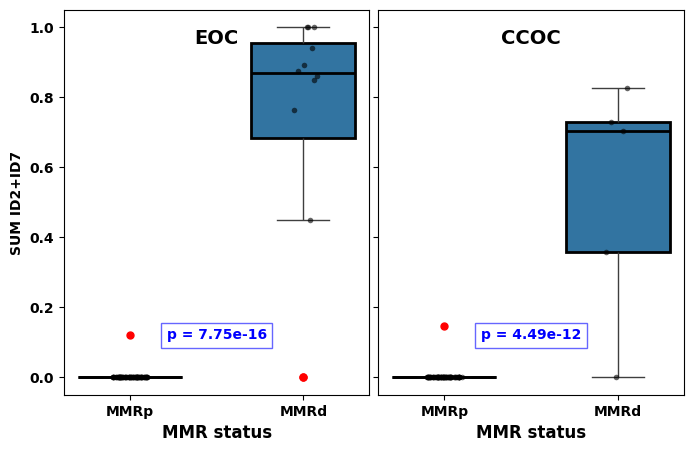

In [57]:
# ANALYZE SUM ID2+ID7 BY HISTOTYPE AND MMR STATUS #################

# Uncomment to import if not done previously
#import seaborn as sns  # Library for statistical data visualization
#from scipy.stats import shapiro  # Function to test normality of data (Shapiro-Wilk test)
#from scipy.stats import levene  # Function to test equality of variances (Levene's test)
#from scipy.stats import ttest_ind  # Function for independent two-sample t-test
#from scipy.stats import mannwhitneyu  # Function for Mann-Whitney U test (non-parametric test for two groups)

# Main function to analyze and plot SUM ID2+ID7 data
def analyze_and_plot_sum_id2_id7_side_by_side_custom(df_eoc, df_cc, output_folder, output_file):
    # Prepare data: convert 'SUM ID2+ID7' to numeric and drop NaNs
    def prepare_data(df):
        df = df.copy()
        df['SUM ID2+ID7'] = pd.to_numeric(df['SUM ID2+ID7'], errors='coerce')
        return df.dropna(subset=['SUM ID2+ID7'])

    # Apply data preparation to both dataframes
    df_eoc = prepare_data(df_eoc)
    df_cc = prepare_data(df_cc)

    # Print descriptive statistics for each group (MMR status)
    def print_descriptive_stats_by_group(df, histotype_label):
        print(f"\nDescriptive statistics for {histotype_label} by MMR status:")
        grouped = df.groupby('MMR_final_status')['SUM ID2+ID7']
        for group_name, group_data in grouped:
            print(f"  MMR Status: {group_name}")
            print(f"    Median: {group_data.median()}")
            print(f"    Mean: {group_data.mean():.2f}")
            print(f"    Standard Deviation: {group_data.std():.2f}")
            print(f"    Q1 (25th percentile): {group_data.quantile(0.25)}")
            print(f"    Q3 (75th percentile): {group_data.quantile(0.75)}")
            print(f"    Count: {group_data.count()}")

    # Remove outliers based on IQR rule
    def filter_outliers(df):
        categories = df['MMR_final_status'].unique()
        non_outliers = pd.DataFrame()
        for category in categories:
            category_data = df[df['MMR_final_status'] == category]
            Q1 = category_data['SUM ID2+ID7'].quantile(0.25)
            Q3 = category_data['SUM ID2+ID7'].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            filtered = category_data[
                (category_data['SUM ID2+ID7'] >= lower_bound) &
                (category_data['SUM ID2+ID7'] <= upper_bound)
            ]
            non_outliers = pd.concat([non_outliers, filtered])
        return non_outliers

    # Annotate outliers on the plots
    def annotate_outliers(ax, df, title):
        categories = df['MMR_final_status'].unique()
        for category in categories:
            category_data = df[df['MMR_final_status'] == category]
            Q1 = category_data['SUM ID2+ID7'].quantile(0.25)
            Q3 = category_data['SUM ID2+ID7'].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = category_data[
                (category_data['SUM ID2+ID7'] < lower_bound) |
                (category_data['SUM ID2+ID7'] > upper_bound)
            ]
            ax.plot(
                outliers['MMR_final_status'], outliers['SUM ID2+ID7'], 'o',
                color='red', markersize=5, label='Outliers' if category == categories[0] else ""
            )
            if not outliers.empty:
                print(f"Outliers in {title} - MMR Status '{category}':")
                print(outliers[['ID_CNIO', 'MMR_final_status', 'SUM ID2+ID7']])
                print("-" * 40)
        ax.set_xlabel('MMR status', fontsize=12, fontweight='bold')

    # Annotate p-values based on statistical tests
    def annotate_pvalue(ax, df):
        categories = df['MMR_final_status'].unique()
        if len(categories) == 2:
            group1 = df[df['MMR_final_status'] == categories[0]]['SUM ID2+ID7']
            group2 = df[df['MMR_final_status'] == categories[1]]['SUM ID2+ID7']

            # Perform normality and variance tests
            shapiro1 = shapiro(group1)
            shapiro2 = shapiro(group2)
            levene_test = levene(group1, group2)

            # Choose the statistical test based on assumptions
            if shapiro1.pvalue > 0.05 and shapiro2.pvalue > 0.05 and levene_test.pvalue > 0.05:
                test_stat, p_value = ttest_ind(group1, group2).statistic, ttest_ind(group1, group2).pvalue
                test_name = "T-test"
            else:
                test_stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided').statistic, \
                                     mannwhitneyu(group1, group2, alternative='two-sided').pvalue
                test_name = "Mann-Whitney U"

            # Add p-value annotation to the plot
            ax.text(
                x=0.5, y=0.1,
                s=f"p = {p_value:.2e}",
                horizontalalignment='center', verticalalignment='bottom',
                fontsize=10, color='blue', fontweight='bold',
                bbox=dict(facecolor='white', alpha=0.6, edgecolor='blue')
            )

    # Print descriptive statistics for each dataset
    print_descriptive_stats_by_group(df_eoc, "EOC")
    print_descriptive_stats_by_group(df_cc, "CCOC")

    # Filter outliers
    df_eoc_filtered = filter_outliers(df_eoc)
    df_cc_filtered = filter_outliers(df_cc)

    # Create side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(8, 5), sharey=True)
    plt.subplots_adjust(wspace=0.03)

    # Plot EOC data
    sns.boxplot(
        x='MMR_final_status', y='SUM ID2+ID7', data=df_eoc,
        ax=axes[0], width=0.6, showfliers=False,
        boxprops=dict(linewidth=2, edgecolor='black'),
        medianprops=dict(linewidth=2, color='black')
    )
    sns.stripplot(
        x='MMR_final_status', y='SUM ID2+ID7', data=df_eoc_filtered,
        ax=axes[0], color='black', alpha=0.6, jitter=True, size=4
    )
    annotate_outliers(axes[0], df_eoc, 'EOC')
    annotate_pvalue(axes[0], df_eoc)
    axes[0].set_ylabel('SUM ID2+ID7', fontsize=10, fontweight='bold')
    axes[0].set_xlabel('MMR status', fontsize=12, fontweight='bold')
    axes[0].tick_params(axis='y', labelsize=10)
    axes[0].tick_params(axis='x', labelsize=10)
    #axes[0].set_ylim(-1,1.1)
    for label in axes[0].get_xticklabels() + axes[0].get_yticklabels():
        label.set_fontweight('bold')
    axes[0].text(0.5, 0.9, 'EOC', ha='center', va='bottom', fontsize=14, fontweight='bold', transform=axes[0].transAxes)

    # Plot CCOC data
    sns.boxplot(
        x='MMR_final_status', y='SUM ID2+ID7', data=df_cc,
        ax=axes[1], width=0.6, showfliers=False,
        boxprops=dict(linewidth=2, edgecolor='black'),
        medianprops=dict(linewidth=2, color='black')
    )
    sns.stripplot(
        x='MMR_final_status', y='SUM ID2+ID7', data=df_cc_filtered,
        ax=axes[1], color='black', alpha=0.6, jitter=True, size=4
    )
    annotate_outliers(axes[1], df_cc, 'CCOC')
    annotate_pvalue(axes[1], df_cc)
    axes[1].set_ylabel('', fontweight='bold')
    axes[1].set_xlabel('MMR status', fontsize=12, fontweight='bold')
    axes[1].tick_params(axis='y', labelsize=10)
    axes[1].tick_params(axis='x', labelsize=10)
    for label in axes[1].get_xticklabels() + axes[1].get_yticklabels():
        label.set_fontweight('bold')
    axes[1].text(0.5, 0.9, 'CCOC', ha='center', va='bottom', fontsize=14, fontweight='bold', transform=axes[1].transAxes)

    # Save figure with adjusted DPI and figure size
    plt.savefig(f'{output_folder}/{output_file}', format='png', dpi=150)  
    plt.show()

# Define output folder and file and call the function
output_folder = '/home/vant/TFM/Plots_TFM_final/'
output_file = 'Boxplot_EOC_CCOC_SUMID2ID7_by_MMR_status.png'
analyze_and_plot_sum_id2_id7_side_by_side_custom(df_endometroid, df_cc, output_folder, output_file)

Statistical test used for %genome_altered: Mann-Whitney U
Statistical test used for CNV: Mann-Whitney U


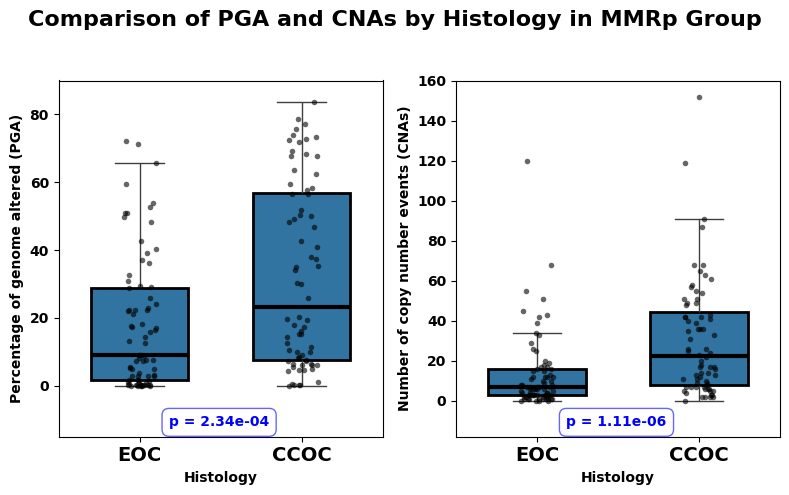

In [58]:
### Comparison of PGA and CNAs by Histology in MMRp Group ##############

# Uncomment to import if not done previously
#import seaborn as sns  # Library for statistical data visualization
#from scipy.stats import shapiro  # Function to test normality of data (Shapiro-Wilk test)
#from scipy.stats import levene  # Function to test equality of variances (Levene's test)
#from scipy.stats import ttest_ind  # Function for independent two-sample t-test
#from scipy.stats import mannwhitneyu  # Function for Mann-Whitney U test (non-parametric test for two groups)

### Comparison of PGA and CNAs by Histology in MMRp Group ####################

def analyze_and_plot_comparison_side_by_side_mmrp(df, output_folder, output_file):
    # Filter data for the two subgroups based on HISTOLOGY and MMR_final_status
    group_1 = df[(df['HISTOLOGY'] == 'EOC') & (df['MMR_final_status'] == 'MMRp')]
    group_2 = df[(df['HISTOLOGY'] == 'CCOC') & (df['MMR_final_status'] == 'MMRp')]

    # Ensure the variables of interest are in numerical format and drop NaN values
    genome_altered_group_1 = pd.to_numeric(group_1['%genome_altered'], errors='coerce').dropna()
    genome_altered_group_2 = pd.to_numeric(group_2['%genome_altered'], errors='coerce').dropna()
    cnv_group_1 = pd.to_numeric(group_1['CNV'], errors='coerce').dropna()
    cnv_group_2 = pd.to_numeric(group_2['CNV'], errors='coerce').dropna()

    # Create figure with subplots (two side-by-side plots)
    fig, axes = plt.subplots(1, 2, figsize=(8, 5), sharey=False)
    plt.subplots_adjust(wspace=0.03)

    # Function to perform statistical tests and annotate p-values
    def perform_and_annotate_stat_tests(ax, group_1_data, group_2_data, variable_name):
        # Shapiro-Wilk test for normality
        shapiro_group_1 = shapiro(group_1_data)
        shapiro_group_2 = shapiro(group_2_data)

        # Levene's test for equality of variances
        levene_test = levene(group_1_data, group_2_data)

        # Perform the appropriate statistical test
        if shapiro_group_1.pvalue > 0.05 and shapiro_group_2.pvalue > 0.05 and levene_test.pvalue > 0.05:
            # If normal, use T-test
            t_test = ttest_ind(group_1_data, group_2_data)
            p_value = t_test.pvalue
            test_name = "T-test"
        else:
            # If not normal, use Mann-Whitney U test
            if group_1_data.empty or group_2_data.empty:
                p_value = None
                test_name = "N/A (insufficient data)"
            else:
                mannwhitney_test = mannwhitneyu(group_1_data, group_2_data)
                p_value = mannwhitney_test.pvalue
                test_name = "Mann-Whitney U"
        # Print the test selected
        print(f"Statistical test used for {variable_name}: {test_name}")
        # Annotate p-value on the plot
        ax.text(
            x=0.65, y=0.06, s=f"p = {p_value:.2e}" if p_value else "Insufficient data",
            horizontalalignment='right', verticalalignment='top', fontsize=10, color='blue', fontweight='bold',
            transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.6, edgecolor='blue', boxstyle='round,pad=0.5')
        )

    # Plot for %genome_altered (left)
    sns.boxplot(
        x='HISTOLOGY', y='%genome_altered', data=df[df['MMR_final_status'] == 'MMRp'],
        ax=axes[0], order=['EOC', 'CCOC'], width=0.6, showfliers=False,
        boxprops=dict(linewidth=2, edgecolor='black'),  # Bold box borders
        medianprops=dict(linewidth=3, color='black')  # Bold median line in black
    )
    sns.stripplot(
        x='HISTOLOGY', y='%genome_altered', data=df[df['MMR_final_status'] == 'MMRp'],
        ax=axes[0], order=['EOC', 'CCOC'], color='black', alpha=0.6, jitter=True, size=4
    )
    perform_and_annotate_stat_tests(axes[0], genome_altered_group_1, genome_altered_group_2, '%genome_altered')
    axes[0].set_xlabel('Histology', fontweight='bold')
    axes[0].set_ylabel('Percentage of genome altered (PGA)', fontweight='bold', fontsize=10)
    axes[0].set_ylim(-15, 90)
    axes[0].set_xticks([0, 1])
    axes[0].set_xticklabels(['EOC', 'CCOC'], fontweight='bold', fontsize=14)
    axes[0].tick_params(axis='y', which='major', labelsize=10)

    # Plot for CNV (right)
    sns.boxplot(
        x='HISTOLOGY', y='CNV', data=df[df['MMR_final_status'] == 'MMRp'],
        ax=axes[1], order=['EOC', 'CCOC'], width=0.6, showfliers=False,
        boxprops=dict(linewidth=2, edgecolor='black'),  # Bold box borders
        medianprops=dict(linewidth=3, color='black')  # Bold median line in black
    )
    sns.stripplot(
        x='HISTOLOGY', y='CNV', data=df[df['MMR_final_status'] == 'MMRp'],
        ax=axes[1], order=['EOC', 'CCOC'], color='black', alpha=0.6, jitter=True, size=4
    )
    perform_and_annotate_stat_tests(axes[1], cnv_group_1, cnv_group_2, 'CNV')
    axes[1].set_xlabel('Histology', fontweight='bold')
    axes[1].set_ylabel('Number of copy number events (CNAs)', fontweight='bold', fontsize=10)
    axes[1].set_ylim(-18, 160)
    axes[1].set_xticks([0, 1])
    axes[1].set_xticklabels(['EOC', 'CCOC'], fontweight='bold', fontsize=14)
    axes[1].tick_params(axis='y', which='major', labelsize=10)

    # Bold labels for Y-axis ticks
    for label in axes[0].get_yticklabels():
        label.set_fontweight('bold')
    for label in axes[1].get_yticklabels():
        label.set_fontweight('bold')

    # Adjust layout, save, and show the plot
    fig.suptitle('Comparison of PGA and CNAs by Histology in MMRp Group', fontsize=16, fontweight='bold')
    fig.tight_layout(rect=[0, 0, 1, 0.95])
    os.makedirs(output_folder, exist_ok=True)
    plt.savefig(f'{output_folder}/{output_file}', format='png', bbox_inches='tight')
    plt.show()

# Define output folder and file and call the function
output_folder = '/home/vant/TFM/Plots_TFM_final/'
output_file = 'Comparison_EOC_CCOC_MMRp_PGA_CNAs_SideBySide.png'
analyze_and_plot_comparison_side_by_side_mmrp(df, output_folder, output_file)

Statistical test used for %genome_altered: Mann-Whitney U
Statistical test used for CNV: Mann-Whitney U


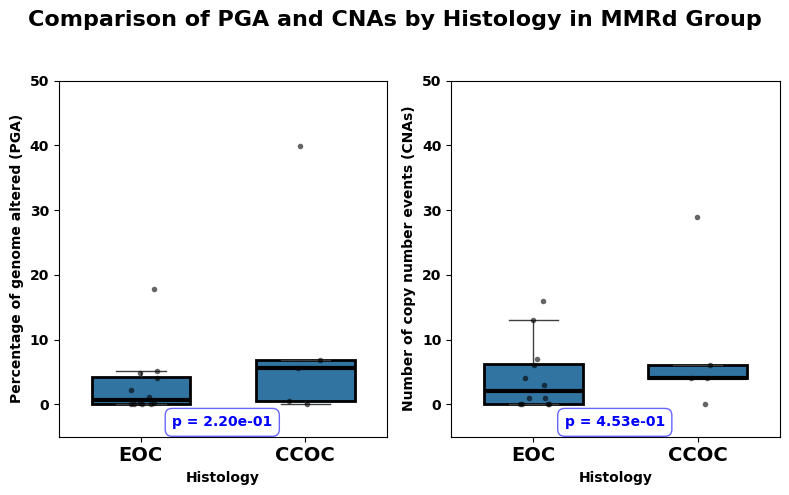

In [59]:
### Comparison of PGA and CNAs by Histology in MMRd Group ####################

# Uncomment to import if not done previously
#import seaborn as sns  # Library for statistical data visualization
#from scipy.stats import shapiro  # Function to test normality of data (Shapiro-Wilk test)
#from scipy.stats import levene  # Function to test equality of variances (Levene's test)
#from scipy.stats import ttest_ind  # Function for independent two-sample t-test
#from scipy.stats import mannwhitneyu  # Function for Mann-Whitney U test (non-parametric test for two groups)

def analyze_and_plot_comparison_side_by_side_mmrd(df, output_folder, output_file):
    # Filter data for the two subgroups based on HISTOLOGY and MMR_final_status
    group_1 = df[(df['HISTOLOGY'] == 'EOC') & (df['MMR_final_status'] == 'MMRd')]
    group_2 = df[(df['HISTOLOGY'] == 'CCOC') & (df['MMR_final_status'] == 'MMRd')]

    # Ensure the variables of interest are in numerical format and drop NaN values
    genome_altered_group_1 = pd.to_numeric(group_1['%genome_altered'], errors='coerce').dropna()
    genome_altered_group_2 = pd.to_numeric(group_2['%genome_altered'], errors='coerce').dropna()
    cnv_group_1 = pd.to_numeric(group_1['CNV'], errors='coerce').dropna()
    cnv_group_2 = pd.to_numeric(group_2['CNV'], errors='coerce').dropna()

    # Create figure with subplots (two side-by-side plots)
    fig, axes = plt.subplots(1, 2, figsize=(8, 5), sharey=False)
    plt.subplots_adjust(wspace=0.03)

    # Function to perform statistical tests and annotate p-values
    def perform_and_annotate_stat_tests(ax, group_1_data, group_2_data, variable_name):
        # Shapiro-Wilk test for normality
        shapiro_group_1 = shapiro(group_1_data)
        shapiro_group_2 = shapiro(group_2_data)

        # Levene's test for equality of variances
        levene_test = levene(group_1_data, group_2_data)

        # Perform the appropriate statistical test
        if shapiro_group_1.pvalue > 0.05 and shapiro_group_2.pvalue > 0.05 and levene_test.pvalue > 0.05:
            # If normal, use T-test
            t_test = ttest_ind(group_1_data, group_2_data)
            p_value = t_test.pvalue
            test_name = "T-test"
        else:
            # If not normal, use Mann-Whitney U test
            if group_1_data.empty or group_2_data.empty:
                p_value = None
                test_name = "N/A (insufficient data)"
            else:
                mannwhitney_test = mannwhitneyu(group_1_data, group_2_data)
                p_value = mannwhitney_test.pvalue
                test_name = "Mann-Whitney U"
        # Print the test selected
        print(f"Statistical test used for {variable_name}: {test_name}")
        # Annotate p-value on the plot
        ax.text(
            x=0.65, y=0.06, s=f"p = {p_value:.2e}" if p_value else "Insufficient data",
            horizontalalignment='right', verticalalignment='top', fontsize=10, color='blue', fontweight='bold',
            transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.6, edgecolor='blue', boxstyle='round,pad=0.5')
        )

    # Plot for %genome_altered (left)
    sns.boxplot(
        x='HISTOLOGY', y='%genome_altered', data=df[df['MMR_final_status'] == 'MMRd'],
        ax=axes[0], order=['EOC', 'CCOC'], width=0.6, showfliers=False,
        boxprops=dict(linewidth=2, edgecolor='black'),  # Bold box borders
        medianprops=dict(linewidth=3, color='black')  # Bold median line in black
    )
    sns.stripplot(
        x='HISTOLOGY', y='%genome_altered', data=df[df['MMR_final_status'] == 'MMRd'],
        ax=axes[0], order=['EOC', 'CCOC'], color='black', alpha=0.6, jitter=True, size=4
    )
    perform_and_annotate_stat_tests(axes[0], genome_altered_group_1, genome_altered_group_2, '%genome_altered')
    axes[0].set_xlabel('Histology', fontweight='bold')
    axes[0].set_ylabel('Percentage of genome altered (PGA)', fontweight='bold', fontsize=10)
    axes[0].set_ylim(-5, 50)
    axes[0].set_xticks([0, 1])
    axes[0].set_xticklabels(['EOC', 'CCOC'], fontweight='bold', fontsize=14)
    axes[0].tick_params(axis='y', which='major', labelsize=10)

    # Plot for CNV (right)
    sns.boxplot(
        x='HISTOLOGY', y='CNV', data=df[df['MMR_final_status'] == 'MMRd'],
        ax=axes[1], order=['EOC', 'CCOC'], width=0.6, showfliers=False,
        boxprops=dict(linewidth=2, edgecolor='black'),  # Bold box borders
        medianprops=dict(linewidth=3, color='black')  # Bold median line in black
    )
    sns.stripplot(
        x='HISTOLOGY', y='CNV', data=df[df['MMR_final_status'] == 'MMRd'],
        ax=axes[1], order=['EOC', 'CCOC'], color='black', alpha=0.6, jitter=True, size=4
    )
    perform_and_annotate_stat_tests(axes[1], cnv_group_1, cnv_group_2, 'CNV')
    axes[1].set_xlabel('Histology', fontweight='bold')
    axes[1].set_ylabel('Number of copy number events (CNAs)', fontweight='bold', fontsize=10)
    axes[1].set_ylim(-5, 50)
    axes[1].set_xticks([0, 1])
    axes[1].set_xticklabels(['EOC', 'CCOC'], fontweight='bold', fontsize=14)
    axes[1].tick_params(axis='y', which='major', labelsize=10)

    # Bold labels for Y-axis ticks
    for label in axes[0].get_yticklabels():
        label.set_fontweight('bold')
    for label in axes[1].get_yticklabels():
        label.set_fontweight('bold')

    # Adjust layout, save, and show the plot
    fig.suptitle('Comparison of PGA and CNAs by Histology in MMRd Group', fontsize=16, fontweight='bold')
    fig.tight_layout(rect=[0, 0, 1, 0.95])
    os.makedirs(output_folder, exist_ok=True)
    plt.savefig(f'{output_folder}/{output_file}', format='png', bbox_inches='tight')
    plt.show()

# Define output folder and file and call the function
output_folder = '/home/vant/TFM/Plots_TFM_final/'
output_file = 'Comparison_EOC_CCOC_MMRd_PGA_CNAs_SideBySide.png'
analyze_and_plot_comparison_side_by_side_mmrd(df, output_folder, output_file)


In [60]:
############# ANALYSIS OF TILs ####################################################
###################################################################################

In [61]:
############# PREFILTERING ##############

# Filter the complete DataFrame to keep only rows where 'TILs_CNIO_info' is not 'NO'
df1= df[df['TILs_CNIO_info'] != 'NO'].copy()
# Eliminate mixed case.
df1=df1[df1['ID_CNIO']!='RVB3']
# Optionally, display the filtered DataFrame
print(df1)
# See the length
print("Length of the dataframe with samples that have TILs CNIO information:",len(df1)) 
# Samples with complete data, so TILs_raw_ep and TILs_raw_tu info
df12=df1[df1['TILs_CNIO_info']=='YES_complete'].copy()
# See the length
print("Length of the dataframe with samples that have complete TILs CNIO information:",len(df12)) 
# Complete data N=156 with TILs_raw_ep and TILs_raw_tu. 1 samples have only data of TILs_raw_tu
# Filter the EOC DataFrame to keep only rows where 'TILs_CNIO_info' is not 'NO'
df_eoc_tils=df_endometroid[df_endometroid['TILs_CNIO_info'] != 'NO'].copy()
# See the length
print("Length of the EOC dataframe with samples that have TILs CNIO information:",len(df_eoc_tils))
# Filter the CCOC DataFrame to keep only rows where 'TILs_CNIO_info' is not 'NO'
df_cc_tils=df_cc[df_cc['TILs_CNIO_info'] != 'NO'].copy()
# See the length
print("Length of the CCOC dataframe with samples that have TILs CNIO information:",len(df_cc_tils))

    ID_CNIO ID_ORIGINAL ID_ORIGINAL_NHC_BBANK HISTOLOGY HISTOLOGY_DETAIL AGE  \
0       LP1    02B28662                   NaN       EOC         No mixed  50   
1       LP2    08B18876                   NaN       EOC         No mixed  42   
2       LP3     08B260A                   NaN       EOC         No mixed  68   
3       LP4    11B18858                   NaN       EOC         No mixed  50   
5       LP8    10B25690                   NaN       EOC         No mixed  48   
..      ...         ...                   ...       ...              ...  ..   
161  OVE104    07B25291               2201160       EOC         No mixed  75   
162  OVE108    08B05842               2236716       EOC         No mixed  36   
163    RVB2         NaN                 28402       EOC         No mixed  47   
165    RVB5         NaN                 28405      CCOC         No mixed  39   
166    RVB6         NaN                 28406       EOC         No mixed  53   

    GRADE FIGO FIGOL FIGOa  ... Non-MMR


Descriptive statistics by MMR status for TILs_raw_ep:
  MMR Status: MMRd
    Median: 7.0
    Mean: 14.80
    Standard Deviation: 17.22
    Q1 (25th percentile): 2.0
    Q3 (75th percentile): 27.5
    Count: 15
  MMR Status: MMRp
    Median: 2.0
    Mean: 12.76
    Standard Deviation: 30.17
    Q1 (25th percentile): 1.0
    Q3 (75th percentile): 8.0
    Count: 141

Descriptive statistics by MMR status for TILs_raw_tu:
  MMR Status: MMRd
    Median: 21.0
    Mean: 50.80
    Standard Deviation: 63.77
    Q1 (25th percentile): 4.0
    Q3 (75th percentile): 86.5
    Count: 15
  MMR Status: MMRp
    Median: 11.0
    Mean: 38.56
    Standard Deviation: 66.27
    Q1 (25th percentile): 4.0
    Q3 (75th percentile): 37.0
    Count: 141


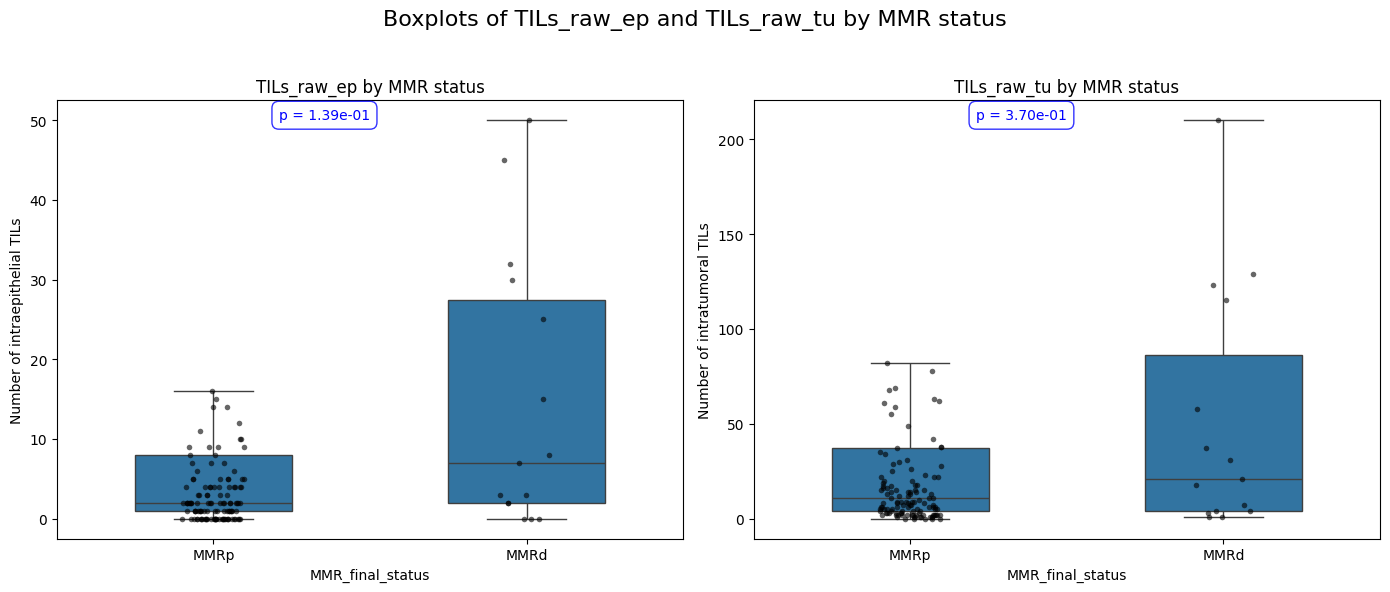

In [62]:
### ANALYZE TILs_raw_ep BY MMR STATUS (ENTIRE COHORT: EOC + CCOC) ################
### With samples with complete data N=156.

# Uncomment to import if not done previously
#import seaborn as sns  # Library for statistical data visualization
#from scipy.stats import shapiro  # Function to test normality of data (Shapiro-Wilk test)
#from scipy.stats import levene  # Function to test equality of variances (Levene's test)
#from scipy.stats import ttest_ind  # Function for independent two-sample t-test
#from scipy.stats import mannwhitneyu  # Function for Mann-Whitney U test (non-parametric test for two groups)

def analyze_and_plot_tils_by_mmr_status(df, output_folder, output_file):
    # Prepare data
    def prepare_data(df):
        df = df.copy()
        df['TILs_raw_ep'] = pd.to_numeric(df['TILs_raw_ep'], errors='coerce')
        df['TILs_raw_tu'] = pd.to_numeric(df['TILs_raw_tu'], errors='coerce')
        return df.dropna(subset=['TILs_raw_ep', 'TILs_raw_tu'])
    
    # Clean and prepare the dataframe
    df = prepare_data(df)

    # Function to compute and display descriptive statistics
    def print_descriptive_stats_by_group(df, variable):
        print(f"\nDescriptive statistics by MMR status for {variable}:")
        grouped = df.groupby('MMR_final_status')[variable]
        for group_name, group_data in grouped:
            print(f"  MMR Status: {group_name}")
            print(f"    Median: {group_data.median()}")
            print(f"    Mean: {group_data.mean():.2f}")
            print(f"    Standard Deviation: {group_data.std():.2f}")
            print(f"    Q1 (25th percentile): {group_data.quantile(0.25)}")
            print(f"    Q3 (75th percentile): {group_data.quantile(0.75)}")
            print(f"    Count: {group_data.count()}")

    # Function to filter outliers
    def filter_outliers(df, variable):
        categories = df['MMR_final_status'].unique()
        non_outliers = pd.DataFrame()
        for category in categories:
            category_data = df[df['MMR_final_status'] == category]
            Q1 = category_data[variable].quantile(0.25)
            Q3 = category_data[variable].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            filtered = category_data[
                (category_data[variable] >= lower_bound) &
                (category_data[variable] <= upper_bound)
            ]
            non_outliers = pd.concat([non_outliers, filtered])
        return non_outliers

    # Function to annotate p-value
    def annotate_pvalue(ax, df, variable):
        categories = df['MMR_final_status'].unique()
        if len(categories) == 2:
            group1 = df[df['MMR_final_status'] == categories[0]][variable]
            group2 = df[df['MMR_final_status'] == categories[1]][variable]

            # Normality and variance tests
            shapiro1 = shapiro(group1)
            shapiro2 = shapiro(group2)
            levene_test = levene(group1, group2)

            # Statistical test selection
            if shapiro1.pvalue > 0.05 and shapiro2.pvalue > 0.05 and levene_test.pvalue > 0.05:
                test_stat, p_value = ttest_ind(group1, group2).statistic, ttest_ind(group1, group2).pvalue
                test_name = "T-test"
            else:
                test_stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided').statistic, \
                                     mannwhitneyu(group1, group2, alternative='two-sided').pvalue
                test_name = "Mann-Whitney U"

            # Annotate the p-value and statistic
            ax.text(
                x=0.5, y=0.95,
                s=f"p = {p_value:.2e}",
                horizontalalignment='right', verticalalignment='bottom',
                fontsize=10, color='blue',
                transform=ax.transAxes,
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='blue', boxstyle='round,pad=0.5')
            )

    # Print descriptive statistics
    print_descriptive_stats_by_group(df, "TILs_raw_ep")
    print_descriptive_stats_by_group(df, "TILs_raw_tu")

    # Create figure with 2 rows
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

    # Plot for TILs_raw_ep
    df_filtered_ep = filter_outliers(df, 'TILs_raw_ep')
    sns.boxplot(
        x='MMR_final_status', y='TILs_raw_ep', data=df,
        ax=axes[0], width=0.5, showfliers=False
    )
    sns.stripplot(
        x='MMR_final_status', y='TILs_raw_ep', data=df_filtered_ep,
        ax=axes[0], color='black', alpha=0.6, jitter=True, size=4
    )
    annotate_pvalue(axes[0], df, 'TILs_raw_ep')
    axes[0].set_ylabel('Number of intraepithelial TILs')
    axes[0].set_title('TILs_raw_ep by MMR status')

    # Plot for TILs_raw_tu
    df_filtered_tu = filter_outliers(df, 'TILs_raw_tu')
    sns.boxplot(
        x='MMR_final_status', y='TILs_raw_tu', data=df,
        ax=axes[1], width=0.5, showfliers=False
    )
    sns.stripplot(
        x='MMR_final_status', y='TILs_raw_tu', data=df_filtered_tu,
        ax=axes[1], color='black', alpha=0.6, jitter=True, size=4
    )
    annotate_pvalue(axes[1], df, 'TILs_raw_tu')
    axes[1].set_ylabel('Number of intratumoral TILs')
    axes[1].set_title('TILs_raw_tu by MMR status')

    # Final adjustments
    fig.suptitle('Boxplots of TILs_raw_ep and TILs_raw_tu by MMR status', fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.95])

    # Save plot
    os.makedirs(output_folder, exist_ok=True)
    plt.savefig(f'{output_folder}/{output_file}', format='png', bbox_inches='tight')
    plt.show()

# Define output folders and file
output_folder = '/home/vant/TFM/Plots_TFM_final/'
output_file = 'Boxplot_TILs_raw_ep_ALL_by_MMR_status.png'

# Call the function
analyze_and_plot_tils_by_mmr_status(df1, output_folder, output_file)


Descriptive statistics for EOC by MMR status:
  MMR Status: MMRd
    Median: 5.5
    Mean: 14.50
    Standard Deviation: 17.12
    Q1 (25th percentile): 2.25
    Q3 (75th percentile): 26.25
    Count: 10
  MMR Status: MMRp
    Median: 2.0
    Mean: 11.86
    Standard Deviation: 27.28
    Q1 (25th percentile): 1.0
    Q3 (75th percentile): 8.75
    Count: 74

Descriptive statistics for CCOC by MMR status:
  MMR Status: MMRd
    Median: 7.0
    Mean: 15.40
    Standard Deviation: 19.45
    Q1 (25th percentile): 0.0
    Q3 (75th percentile): 25.0
    Count: 5
  MMR Status: MMRp
    Median: 2.0
    Mean: 13.75
    Standard Deviation: 33.25
    Q1 (25th percentile): 0.0
    Q3 (75th percentile): 6.5
    Count: 67
Min and max values for TILs_raw_ep (EOC): 0.0, 162.0
Min and max values for TILs_raw_ep (CCOC): 0.0, 174.0
Outliers in EOC - MMR Status 'MMRp':
    ID_CNIO MMR_final_status  TILs_raw_ep
2       LP3             MMRp         56.0
25     LP32             MMRp         45.0
26     LP33

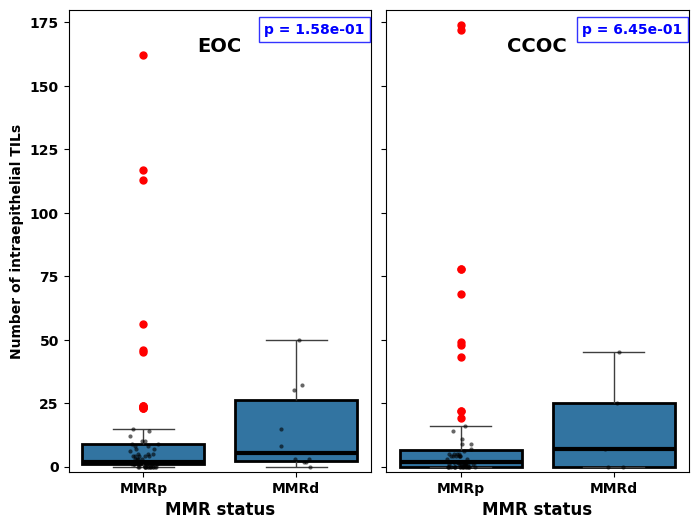

In [63]:
# ANALYZE TILs_raw_ep VALUES BY HISTOTYPE AND MMR STATUS (DEFINITIVE, ADJUSTED GRAPHIC) ################

# Uncomment to import if not done previously
#import seaborn as sns  # Library for statistical data visualization
#from scipy.stats import shapiro  # Function to test normality of data (Shapiro-Wilk test)
#from scipy.stats import levene  # Function to test equality of variances (Levene's test)
#from scipy.stats import ttest_ind  # Function for independent two-sample t-test
#from scipy.stats import mannwhitneyu  # Function for Mann-Whitney U test (non-parametric test for two groups)

# Main function to analyze and plot TILs_raw_ep data
def analyze_and_plot_tils_raw_ep_side_by_side_custom(df_eoc, df_cc, output_folder, output_file):
    # Prepare data: convert TILs_raw_ep to numeric and drop NaNs
    def prepare_data(df):
        df = df.copy()
        df['TILs_raw_ep'] = pd.to_numeric(df['TILs_raw_ep'], errors='coerce')
        return df.dropna(subset=['TILs_raw_ep'])

    # Apply data preparation to both dataframes
    df_eoc = prepare_data(df_eoc)
    df_cc = prepare_data(df_cc)

    # Print descriptive statistics for each group (MMR status)
    def print_descriptive_stats_by_group(df, histotype_label):
        print(f"\nDescriptive statistics for {histotype_label} by MMR status:")
        grouped = df.groupby('MMR_final_status')['TILs_raw_ep']
        for group_name, group_data in grouped:
            print(f"  MMR Status: {group_name}")
            print(f"    Median: {group_data.median()}")
            print(f"    Mean: {group_data.mean():.2f}")
            print(f"    Standard Deviation: {group_data.std():.2f}")
            print(f"    Q1 (25th percentile): {group_data.quantile(0.25)}")
            print(f"    Q3 (75th percentile): {group_data.quantile(0.75)}")
            print(f"    Count: {group_data.count()}")

    # Remove outliers based on IQR rule
    def filter_outliers(df):
        categories = df['MMR_final_status'].unique()
        non_outliers = pd.DataFrame()
        for category in categories:
            category_data = df[df['MMR_final_status'] == category]
            Q1 = category_data['TILs_raw_ep'].quantile(0.25)
            Q3 = category_data['TILs_raw_ep'].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            filtered = category_data[
                (category_data['TILs_raw_ep'] >= lower_bound) &
                (category_data['TILs_raw_ep'] <= upper_bound)
            ]
            non_outliers = pd.concat([non_outliers, filtered])
        return non_outliers

    # Annotate outliers on the plots
    def annotate_outliers(ax, df, title):
        categories = df['MMR_final_status'].unique()
        for category in categories:
            category_data = df[df['MMR_final_status'] == category]
            Q1 = category_data['TILs_raw_ep'].quantile(0.25)
            Q3 = category_data['TILs_raw_ep'].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = category_data[
                (category_data['TILs_raw_ep'] < lower_bound) |
                (category_data['TILs_raw_ep'] > upper_bound)
            ]
            ax.plot(
                outliers['MMR_final_status'], outliers['TILs_raw_ep'], 'o',
                color='red', markersize=5, label='Outliers' if category == categories[0] else ""
            )
            if not outliers.empty:
                print(f"Outliers in {title} - MMR Status '{category}':")
                print(outliers[['ID_CNIO', 'MMR_final_status', 'TILs_raw_ep']])
                print("-" * 40)
        ax.set_xlabel('MMR status')

    # Annotate p-values based on statistical tests
    def annotate_pvalue(ax, df):
        categories = df['MMR_final_status'].unique()
        if len(categories) == 2:
            group1 = df[df['MMR_final_status'] == categories[0]]['TILs_raw_ep']
            group2 = df[df['MMR_final_status'] == categories[1]]['TILs_raw_ep']

            # Perform normality and variance tests
            shapiro1 = shapiro(group1)
            shapiro2 = shapiro(group2)
            levene_test = levene(group1, group2)

            # Choose the statistical test based on assumptions
            if shapiro1.pvalue > 0.05 and shapiro2.pvalue > 0.05 and levene_test.pvalue > 0.05:
                test_stat, p_value = ttest_ind(group1, group2).statistic, ttest_ind(group1, group2).pvalue
                test_name = "T-test"
            else:
                test_stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided').statistic, \
                                     mannwhitneyu(group1, group2, alternative='two-sided').pvalue
                test_name = "Mann-Whitney U"
            # Print the type of test used
            print(f"Test used: {test_name}")
            # Add p-value annotation to the plot
            ax.text(
                x=1.45, y=175,
                s=f"p = {p_value:.2e}",
                horizontalalignment='right', verticalalignment='top',
                fontsize=10, color='blue', fontweight='bold',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='blue')
            )

    # Print descriptive statistics for each dataset
    print_descriptive_stats_by_group(df_eoc, "EOC")
    print_descriptive_stats_by_group(df_cc, "CCOC")

    # Check for extreme TILs_raw_ep values (outliers)
    print(f"Min and max values for TILs_raw_ep (EOC): {df_eoc['TILs_raw_ep'].min()}, {df_eoc['TILs_raw_ep'].max()}")
    print(f"Min and max values for TILs_raw_ep (CCOC): {df_cc['TILs_raw_ep'].min()}, {df_cc['TILs_raw_ep'].max()}")

    # Remove outliers based on IQR rule
    df_eoc_filtered = filter_outliers(df_eoc)
    df_cc_filtered = filter_outliers(df_cc)

    # Adjust the figure size to avoid large dimensions
    fig, axes = plt.subplots(1, 2, figsize=(8, 6), sharey=True)  # Use a more reasonable figsize
    plt.subplots_adjust(wspace=0.05)

    # Plot EOC data
    sns.boxplot(
        x='MMR_final_status', y='TILs_raw_ep', data=df_eoc,
        ax=axes[0], width=0.8, showfliers=False,
        boxprops=dict(linewidth=2, edgecolor='black'),  
        medianprops=dict(linewidth=3, color='black')  
    )
    sns.stripplot(
        x='MMR_final_status', y='TILs_raw_ep', data=df_eoc_filtered,
        ax=axes[0], color='black', alpha=0.6, jitter=True, size=3
    )
    annotate_outliers(axes[0], df_eoc, 'EOC')
    annotate_pvalue(axes[0], df_eoc)
    axes[0].set_ylabel('Number of intraepithelial TILs', fontsize=10, fontweight='bold')
    axes[0].set_xlabel('MMR status', fontsize=12, fontweight='bold')
    axes[0].tick_params(axis='y', labelsize=10)  # Bold Y-axis numbers
    axes[0].tick_params(axis='x', labelsize=10)  # Bold X-axis labels
    axes[0].set_ylim(-2, 180)  # Expand the Y-axis range to increase separation
    for label in axes[0].get_xticklabels() + axes[0].get_yticklabels():
        label.set_fontweight('bold')  # Set font weight for tick labels
    axes[0].text(0.5, 0.9, 'EOC', ha='center', va='bottom', fontsize=14, fontweight='bold', transform=axes[0].transAxes)

    # Plot CCOC data
    sns.boxplot(
        x='MMR_final_status', y='TILs_raw_ep', data=df_cc,
        ax=axes[1], width=0.8, showfliers=False,
        boxprops=dict(linewidth=2, edgecolor='black'),  
        medianprops=dict(linewidth=3, color='black')  
    )
    sns.stripplot(
        x='MMR_final_status', y='TILs_raw_ep', data=df_cc_filtered,
        ax=axes[1], color='black', alpha=0.6, jitter=True, size=3
    )
    annotate_outliers(axes[1], df_cc, 'CCOC')
    annotate_pvalue(axes[1], df_cc)
    axes[1].set_ylabel('', fontweight='bold')
    axes[1].set_xlabel('MMR status', fontsize=12, fontweight='bold')
    axes[1].tick_params(axis='y', labelsize=10)  # Bold Y-axis numbers
    axes[1].tick_params(axis='x', labelsize=10)  # Bold X-axis labels
    axes[1].set_ylim(-2, 180)  # Expand the Y-axis range to increase separation
    for label in axes[1].get_xticklabels() + axes[1].get_yticklabels():
        label.set_fontweight('bold')  # Set font weight for tick labels
    axes[1].text(0.5, 0.9, 'CCOC', ha='center', va='bottom', fontsize=14, fontweight='bold', transform=axes[1].transAxes)

    # Save figure with adjusted DPI and figure size
    plt.savefig(f'{output_folder}/{output_file}', format='png', dpi=300)  
    plt.show()

# Define output folder and file and call the function
output_folder = '/home/vant/TFM/Plots_TFM_final/'
output_file = 'Boxplot_EOC_CCOC_TILs_raw_ep_by_MMR_status_LINEAR_FINAL.png'
analyze_and_plot_tils_raw_ep_side_by_side_custom(df_endometroid, df_cc, output_folder, output_file)


Descriptive statistics for EOC by MMR status:
  MMR Status: MMRd
    Median: 24.5
    Mean: 40.40
    Standard Deviation: 46.72
    Q1 (25th percentile): 4.75
    Q3 (75th percentile): 52.75
    Count: 10
  MMR Status: MMRp
    Median: 12.5
    Mean: 31.36
    Standard Deviation: 51.38
    Q1 (25th percentile): 5.0
    Q3 (75th percentile): 29.5
    Count: 74

Descriptive statistics for CCOC by MMR status:
  MMR Status: MMRd
    Median: 21.0
    Mean: 71.60
    Standard Deviation: 92.26
    Q1 (25th percentile): 3.0
    Q3 (75th percentile): 123.0
    Count: 5
  MMR Status: MMRp
    Median: 10.5
    Mean: 45.99
    Standard Deviation: 78.73
    Q1 (25th percentile): 2.0
    Q3 (75th percentile): 56.0
    Count: 68
Min and max values for TILs_raw_tu (EOC): 0.0, 278.0
Min and max values for TILs_raw_tu (CCOC): 0.0, 327.0
Outliers in EOC - MMR Status 'MMRp':
    ID_CNIO MMR_final_status  TILs_raw_tu
2       LP3             MMRp         78.0
10     LP14             MMRp        116.0
20   

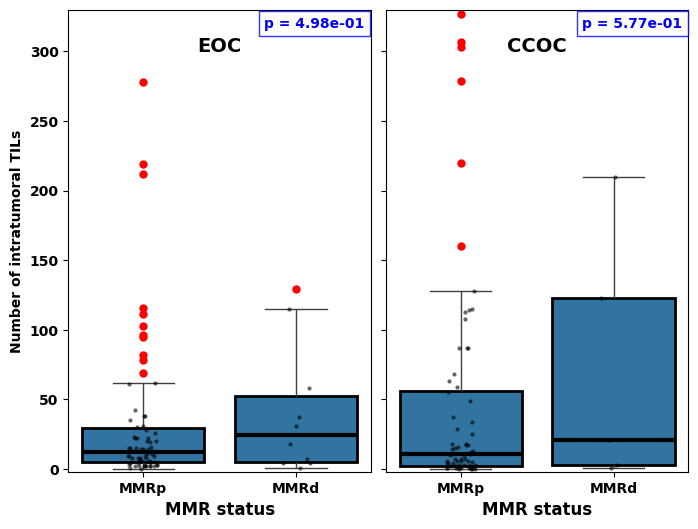

In [64]:
# ANALYZE TILs_raw_tu VALUES BY HISTOTYPE AND MMR STATUS (DEFINITIVE, ADJUSTED GRAPHIC) ################

# Uncomment to import if not done previously
#import seaborn as sns  # Library for statistical data visualization
#from scipy.stats import shapiro  # Function to test normality of data (Shapiro-Wilk test)
#from scipy.stats import levene  # Function to test equality of variances (Levene's test)
#from scipy.stats import ttest_ind  # Function for independent two-sample t-test
#from scipy.stats import mannwhitneyu  # Function for Mann-Whitney U test (non-parametric test for two groups)

# Main function to analyze and plot TILs_raw_tu data
def analyze_and_plot_tils_raw_tu_side_by_side_custom(df_eoc, df_cc, output_folder, output_file):
    # Prepare data: convert TILs_raw_tu to numeric and drop NaNs
    def prepare_data(df):
        df = df.copy()
        df['TILs_raw_tu'] = pd.to_numeric(df['TILs_raw_tu'], errors='coerce')
        return df.dropna(subset=['TILs_raw_tu'])

    # Apply data preparation to both dataframes
    df_eoc = prepare_data(df_eoc)
    df_cc = prepare_data(df_cc)

    # Print descriptive statistics for each group (MMR status)
    def print_descriptive_stats_by_group(df, histotype_label):
        print(f"\nDescriptive statistics for {histotype_label} by MMR status:")
        grouped = df.groupby('MMR_final_status')['TILs_raw_tu']
        for group_name, group_data in grouped:
            print(f"  MMR Status: {group_name}")
            print(f"    Median: {group_data.median()}")
            print(f"    Mean: {group_data.mean():.2f}")
            print(f"    Standard Deviation: {group_data.std():.2f}")
            print(f"    Q1 (25th percentile): {group_data.quantile(0.25)}")
            print(f"    Q3 (75th percentile): {group_data.quantile(0.75)}")
            print(f"    Count: {group_data.count()}")

    # Remove outliers based on IQR rule
    def filter_outliers(df):
        categories = df['MMR_final_status'].unique()
        non_outliers = pd.DataFrame()
        for category in categories:
            category_data = df[df['MMR_final_status'] == category]
            Q1 = category_data['TILs_raw_tu'].quantile(0.25)
            Q3 = category_data['TILs_raw_tu'].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            filtered = category_data[
                (category_data['TILs_raw_tu'] >= lower_bound) &
                (category_data['TILs_raw_tu'] <= upper_bound)
            ]
            non_outliers = pd.concat([non_outliers, filtered])
        return non_outliers

    # Annotate outliers on the plots
    def annotate_outliers(ax, df, title):
        categories = df['MMR_final_status'].unique()
        for category in categories:
            category_data = df[df['MMR_final_status'] == category]
            Q1 = category_data['TILs_raw_tu'].quantile(0.25)
            Q3 = category_data['TILs_raw_tu'].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = category_data[
                (category_data['TILs_raw_tu'] < lower_bound) |
                (category_data['TILs_raw_tu'] > upper_bound)
            ]
            ax.plot(
                outliers['MMR_final_status'], outliers['TILs_raw_tu'], 'o',
                color='red', markersize=5, label='Outliers' if category == categories[0] else ""
            )
            if not outliers.empty:
                print(f"Outliers in {title} - MMR Status '{category}':")
                print(outliers[['ID_CNIO', 'MMR_final_status', 'TILs_raw_tu']])
                print("-" * 40)
        ax.set_xlabel('MMR status')

    # Annotate p-values based on statistical tests
    def annotate_pvalue(ax, df):
        categories = df['MMR_final_status'].unique()
        if len(categories) == 2:
            group1 = df[df['MMR_final_status'] == categories[0]]['TILs_raw_tu']
            group2 = df[df['MMR_final_status'] == categories[1]]['TILs_raw_tu']

            # Perform normality and variance tests
            shapiro1 = shapiro(group1)
            shapiro2 = shapiro(group2)
            levene_test = levene(group1, group2)

            # Choose the statistical test based on assumptions
            if shapiro1.pvalue > 0.05 and shapiro2.pvalue > 0.05 and levene_test.pvalue > 0.05:
                test_stat, p_value = ttest_ind(group1, group2).statistic, ttest_ind(group1, group2).pvalue
                test_name = "T-test"
            else:
                test_stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided').statistic, \
                                     mannwhitneyu(group1, group2, alternative='two-sided').pvalue
                test_name = "Mann-Whitney U"
            # Print the type of test used
            print(f"Test used: {test_name}")
            # Add p-value annotation to the plot
            ax.text(
                x=1.45, y=325,
                s=f"p = {p_value:.2e}",
                horizontalalignment='right', verticalalignment='top',
                fontsize=10, color='blue', fontweight='bold',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='blue')
            )

    # Print descriptive statistics for each dataset
    print_descriptive_stats_by_group(df_eoc, "EOC")
    print_descriptive_stats_by_group(df_cc, "CCOC")

    # Check for extreme TILs_raw_tu values (outliers)
    print(f"Min and max values for TILs_raw_tu (EOC): {df_eoc['TILs_raw_tu'].min()}, {df_eoc['TILs_raw_tu'].max()}")
    print(f"Min and max values for TILs_raw_tu (CCOC): {df_cc['TILs_raw_tu'].min()}, {df_cc['TILs_raw_tu'].max()}")

    # Remove outliers based on IQR rule
    df_eoc_filtered = filter_outliers(df_eoc)
    df_cc_filtered = filter_outliers(df_cc)

    # Adjust the figure size to avoid large dimensions
    fig, axes = plt.subplots(1, 2, figsize=(8, 6), sharey=True) 
    plt.subplots_adjust(wspace=0.05)

    # Plot EOC data
    sns.boxplot(
        x='MMR_final_status', y='TILs_raw_tu', data=df_eoc,
        ax=axes[0], width=0.8, showfliers=False,
        boxprops=dict(linewidth=2, edgecolor='black'),  
        medianprops=dict(linewidth=3, color='black')  
    )
    sns.stripplot(
        x='MMR_final_status', y='TILs_raw_tu', data=df_eoc_filtered,
        ax=axes[0], color='black', alpha=0.6, jitter=True, size=3
    )
    annotate_outliers(axes[0], df_eoc, 'EOC')
    annotate_pvalue(axes[0], df_eoc)
    axes[0].set_ylabel('Number of intratumoral TILs', fontsize=10, fontweight='bold')
    axes[0].set_xlabel('MMR status', fontsize=12, fontweight='bold')
    axes[0].tick_params(axis='y', labelsize=10)  # Bold Y-axis numbers
    axes[0].tick_params(axis='x', labelsize=10)  # Bold X-axis labels
    axes[0].set_ylim(-2, 330)  # Expand the Y-axis range to increase separation
    for label in axes[0].get_xticklabels() + axes[0].get_yticklabels():
        label.set_fontweight('bold')  # Set font weight for tick labels
    axes[0].text(0.5, 0.9, 'EOC', ha='center', va='bottom', fontsize=14, fontweight='bold', transform=axes[0].transAxes)

    # Plot CCOC data
    sns.boxplot(
        x='MMR_final_status', y='TILs_raw_tu', data=df_cc,
        ax=axes[1], width=0.8, showfliers=False,
        boxprops=dict(linewidth=2, edgecolor='black'),  
        medianprops=dict(linewidth=3, color='black')  
    )
    sns.stripplot(
        x='MMR_final_status', y='TILs_raw_tu', data=df_cc_filtered,
        ax=axes[1], color='black', alpha=0.6, jitter=True, size=3
    )
    annotate_outliers(axes[1], df_cc, 'CCOC')
    annotate_pvalue(axes[1], df_cc)
    axes[1].set_ylabel('', fontweight='bold')
    axes[1].set_xlabel('MMR status', fontsize=12, fontweight='bold')
    axes[1].tick_params(axis='y', labelsize=10)  # Bold Y-axis numbers
    axes[1].tick_params(axis='x', labelsize=10)  # Bold X-axis labels
    axes[1].set_ylim(-2, 330)  # Expand the Y-axis range to increase separation
    for label in axes[1].get_xticklabels() + axes[1].get_yticklabels():
        label.set_fontweight('bold')  # Set font weight for tick labels
    axes[1].text(0.5, 0.9, 'CCOC', ha='center', va='bottom', fontsize=14, fontweight='bold', transform=axes[1].transAxes)

    # Save figure with adjusted DPI and figure size
    plt.savefig(f'{output_folder}/{output_file}', format='png', dpi=300)  
    plt.show()

# Define output folder and file and call the function
output_folder = '/home/vant/TFM/Plots_TFM_final/'
output_file = 'Boxplot_EOC_CCOC_TILs_raw_tu_by_MMR_status_LINEAR_FINAL.png'
analyze_and_plot_tils_raw_tu_side_by_side_custom(df_endometroid, df_cc, output_folder, output_file)

Test used for PGA category: Chi-Square Test
Test used for CNAs category: Chi-Square Test


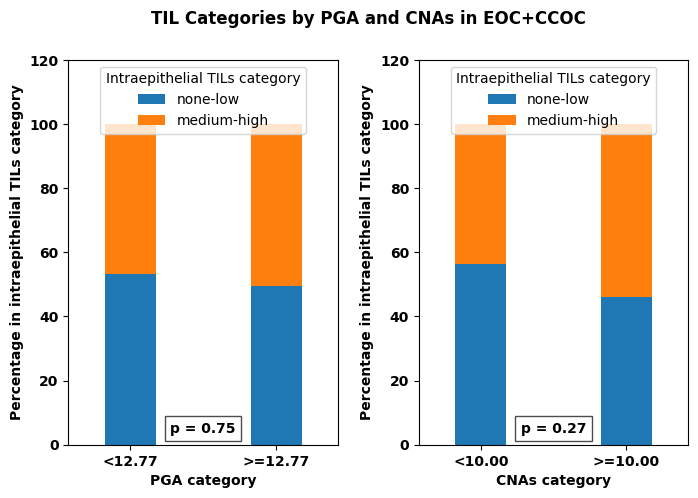

In [65]:
######### ANALYZE INTRAEPITHELIAL TILs AFTER CATEGORIZING THEM USING AS CUT-OFF THE MEDIAN OF PGA OR CNAs IN THE ENTIRE COHORT ######

from scipy.stats import chi2_contingency, fisher_exact # Tests for association between categorical variables
# Uncomment to import if not done previously
#import seaborn as sns  # Library for statistical data visualization


def analyze_categorized_tils_by_median(df, output_folder, output_file_combined):
    # Create categories based on the median of %genome_altered and CNV
    median_genome_altered = df['%genome_altered'].median()
    median_CNV = df['CNV'].median()

    # Categorize based on the median of %genome_altered
    df.loc[:, 'PGA category'] = pd.cut(df['%genome_altered'], bins=[-np.inf, median_genome_altered, np.inf], labels=[f'<{median_genome_altered:.2f}', f'>={median_genome_altered:.2f}'])
    
    # Categorize based on the median of CNV
    df.loc[:, 'CNAs category'] = pd.cut(df['CNV'], bins=[-np.inf, median_CNV, np.inf], labels=[f'<{median_CNV:.2f}', f'>={median_CNV:.2f}'])
    
    # Categorize TILs
    df.loc[:, 'TILs_ep_category'] = pd.cut(df['TILs_raw_ep'], bins=[-0.1, 2, float('inf')], labels=['none-low', 'medium-high'])

    # Function to calculate percentages for the stacked bar plot
    def calculate_percentages(df, variable):
        contingency_table = pd.crosstab(df[variable], df['TILs_ep_category'])
        percentages = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
        return percentages

    # Function to create the stacked bar plot
    def plot_stacked_bar(df, variable, ax, title, p_val):
        percentages = calculate_percentages(df, variable)
        percentages.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'], width=0.35)
        ax.set_ylabel('Percentage in intraepithelial TILs category', fontsize=10, fontweight='bold')
        ax.set_xlabel(f'{variable}', fontsize=10, fontweight='bold')
        ax.legend(title='Intraepithelial TILs category',loc='upper center', labels=['none-low', 'medium-high'])
        ax.set_ylim(0, 110)
        ax.text(0.5, 5, f'p = {p_val:.2f}', horizontalalignment='center', verticalalignment='center',
                fontsize=10, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7))
        yticks = ax.get_yticks()
        ax.set_yticks(yticks)
        ax.set_yticklabels(ax.get_yticklabels(), fontsize=10, fontweight='bold', rotation=0)
        ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, fontweight='bold', rotation=0)

    # Perform statistical test for 'TILs_ep_category'
    def test_proportions(df, variable):
        contingency_table = pd.crosstab(df[variable], df['TILs_ep_category'])
        if contingency_table.values.min() < 5:
            _, p_value = fisher_exact(contingency_table.values, alternative='two-sided')
            test_name = "Fisher Exact Test"
        else:
            _, p_value, _, _ = chi2_contingency(contingency_table)
            test_name = "Chi-Square Test"
        # Print the type of test used
        print(f"Test used for {variable}: {test_name}")
        
        return p_value

    # Calculate p-values
    p_value_genome_altered = test_proportions(df, 'PGA category')
    p_value_cnv = test_proportions(df, 'CNAs category')

    # Create subplots for side-by-side plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5), gridspec_kw={'wspace': 0.3})
    plot_stacked_bar(df, 'PGA category', ax1, f'Categories of TILs by %genome_altered (median={median_genome_altered:.2f})', p_value_genome_altered)
    plot_stacked_bar(df, 'CNAs category', ax2, f'Categories of TILs by CNV (median={median_CNV:.2f})', p_value_cnv)

    # Add a main title and save the combined plot
    fig.suptitle('TIL Categories by PGA and CNAs in EOC+CCOC', fontsize=12, fontweight='bold')
    os.makedirs(output_folder, exist_ok=True)
    plt.savefig(f'{output_folder}/{output_file_combined}', format='png', bbox_inches='tight',dpi=300)
    plt.show()

# Define output folder and file
output_folder = '/home/vant/TFM/Plots_TFM_final/'
output_file_combined = 'Categorized_TILsrawep_ALL_PGA_CNA_.png'

# Call the function with the data
analyze_categorized_tils_by_median(df1, output_folder, output_file_combined)

Test used for PGA category: Chi-Square Test
Test used for PGA category: Chi-Square Test


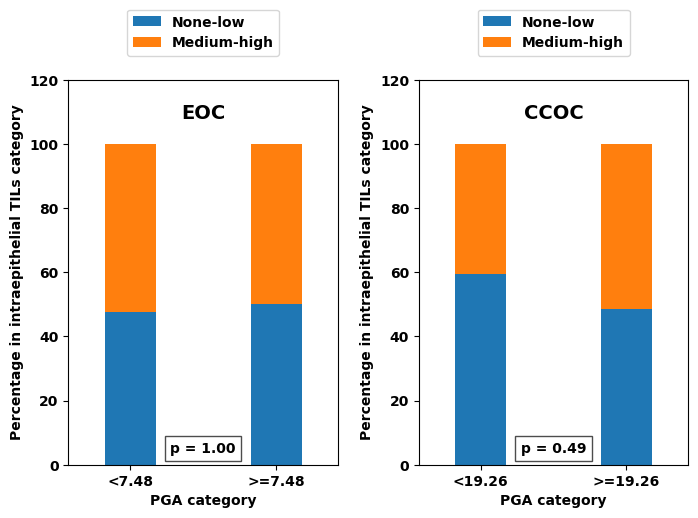

In [66]:
######### ANALYZE INTRAEPITHELIAL TILs AFTER CATEGORIZING THEM USING AS CUT-OFF THE MEDIAN OF PGA BY HISTOTYPE ######
# Uncomment to import if not done previously
#import seaborn as sns  # Library for statistical data visualization
#from scipy.stats import chi2_contingency, fisher_exact # # Tests for association between categorical variables
from matplotlib import font_manager

def analyze_genome_altered_tils_by_dataset(df_eoc, df_cc, output_folder, output_file_combined):
    # Calculate medians
    median_genome_altered_eoc = df_eoc['%genome_altered'].median()
    median_genome_altered_cc = df_cc['%genome_altered'].median()

    # Categorize based on the median of %genome_altered for each dataset
    df_eoc.loc[:, 'PGA category'] = pd.cut(df_eoc['%genome_altered'], bins=[-np.inf, median_genome_altered_eoc, np.inf], 
                                           labels=[f'<{median_genome_altered_eoc:.2f}', f'>={median_genome_altered_eoc:.2f}'])
    df_cc.loc[:, 'PGA category'] = pd.cut(df_cc['%genome_altered'], bins=[-np.inf, median_genome_altered_cc, np.inf], 
                                          labels=[f'<{median_genome_altered_cc:.2f}', f'>={median_genome_altered_cc:.2f}'])

    # Categorize TILs
    df_eoc.loc[:, 'TILs_ep_category'] = pd.cut(df_eoc['TILs_raw_ep'], bins=[-0.1, 2, float('inf')], 
                                               labels=['none-low', 'medium-high'])
    df_cc.loc[:, 'TILs_ep_category'] = pd.cut(df_cc['TILs_raw_ep'], bins=[-0.1, 2, float('inf')], 
                                              labels=['none-low', 'medium-high'])

    # Function to calculate percentages for the stacked bar plot
    def calculate_percentages(df, variable):
        contingency_table = pd.crosstab(df[variable], df['TILs_ep_category'])
        percentages = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
        return percentages

    # Function to create the stacked bar plot
    def plot_stacked_bar(df, variable, ax, title, p_val,label):
        percentages = calculate_percentages(df, variable)
        percentages.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'], width=0.35)
        ax.set_ylabel('Percentage in intraepithelial TILs category', fontsize=10, fontweight='bold')
        ax.set_xlabel(f'{variable}', fontsize=10, fontweight='bold')
        font_properties = font_manager.FontProperties(weight='bold')
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), labels=['None-low', 'Medium-high'], 
                  prop=font_properties)
        ax.text(0.5, 5, f'p = {p_val:.2f}', horizontalalignment='center', verticalalignment='center',
                fontsize=10, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7))
        yticks = ax.get_yticks()
        ax.set_yticks(yticks)
        ax.set_yticklabels(ax.get_yticklabels(), fontsize=10, fontweight='bold', rotation=0)
        ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, fontweight='bold', rotation=0)
        # Add title inside the plot
        ax.text(0.5, 0.9, label, fontsize=14, fontweight='bold', 
            horizontalalignment='center', transform=ax.transAxes)
    # Perform statistical test for 'TILs_ep_category'
    def test_proportions(df, variable):
        contingency_table = pd.crosstab(df[variable], df['TILs_ep_category'])
        if contingency_table.values.min() < 5:
            _, p_value = fisher_exact(contingency_table.values, alternative='two-sided')
            test_name = "Fisher Exact Test"
        else:
            _, p_value, _, _ = chi2_contingency(contingency_table)
            test_name = "Chi-Square Test"
        print(f"Test used for {variable}: {test_name}")
        return p_value

    # Calculate p-values for both datasets
    p_value_genome_altered_eoc = test_proportions(df_eoc, 'PGA category')
    p_value_genome_altered_cc = test_proportions(df_cc, 'PGA category')

    # Create subplots for side-by-side plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5), gridspec_kw={'wspace': 0.3})
    plot_stacked_bar(df_eoc, 'PGA category', ax1, 
                     f'EOC: TILs by %genome_altered (median={median_genome_altered_eoc:.2f})', p_value_genome_altered_eoc,'EOC')
    plot_stacked_bar(df_cc, 'PGA category', ax2, 
                     f'CC: TILs by %genome_altered (median={median_genome_altered_cc:.2f})', p_value_genome_altered_cc,'CCOC')

    # Save and show
    os.makedirs(output_folder, exist_ok=True)
    plt.savefig(f'{output_folder}/{output_file_combined}', format='png', bbox_inches='tight', dpi=300)
    plt.show()

# Define output folder and file
output_folder = '/home/vant/TFM/Plots_TFM_final/'
output_file_combined = 'Categorized_TILsrawep_combined_PGA_EOC_CC.png'

# Call the function
analyze_genome_altered_tils_by_dataset(df_eoc_tils, df_cc_tils, output_folder, output_file_combined)

Test used for CNAs category: Chi-Square Test
Test used for CNAs category: Chi-Square Test


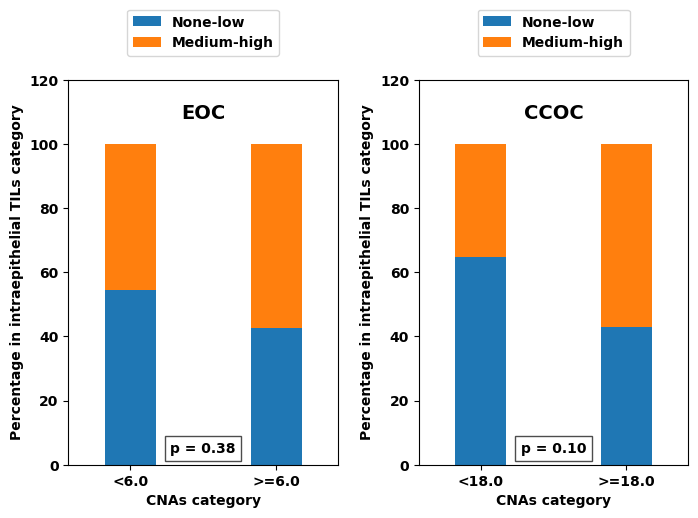

In [67]:
######### ANALYZE INTRAEPITHELIAL TILs AFTER CATEGORIZING THEM USING AS CUT-OFF THE MEDIAN OF CNAs BY HISTOTYPE ######
# Uncomment to import if not done previously
#import seaborn as sns  # Library for statistical data visualization
#from scipy.stats import chi2_contingency, fisher_exact # # Tests for association between categorical variables
#from matplotlib import font_manager

def analyze_cnv_tils_by_dataset(df_eoc, df_cc, output_folder, output_file_combined):
    # Calculate medians
    median_CNV_eoc = df_eoc['CNV'].median()
    median_CNV_cc = df_cc['CNV'].median()

    # Categorize based on the median of CNV for each dataset
    df_eoc.loc[:, 'CNAs category'] = pd.cut(df_eoc['CNV'], bins=[-np.inf, median_CNV_eoc, np.inf], 
                                            labels=[f'<{median_CNV_eoc:}', f'>={median_CNV_eoc}'])
    df_cc.loc[:, 'CNAs category'] = pd.cut(df_cc['CNV'], bins=[-np.inf, median_CNV_cc, np.inf], 
                                           labels=[f'<{median_CNV_cc}', f'>={median_CNV_cc}'])

    # Categorize TILs
    df_eoc.loc[:, 'TILs_ep_category'] = pd.cut(df_eoc['TILs_raw_ep'], bins=[-0.1, 2, float('inf')], 
                                               labels=['none-low', 'medium-high'])
    df_cc.loc[:, 'TILs_ep_category'] = pd.cut(df_cc['TILs_raw_ep'], bins=[-0.1, 2, float('inf')], 
                                              labels=['none-low', 'medium-high'])

    # Function to calculate percentages for the stacked bar plot
    def calculate_percentages(df, variable):
        contingency_table = pd.crosstab(df[variable], df['TILs_ep_category'])
        percentages = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
        return percentages

    # Function to create the stacked bar plot
    def plot_stacked_bar(df, variable, ax, title, p_val,label):
        percentages = calculate_percentages(df, variable)
        percentages.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'], width=0.35)
        ax.set_ylabel('Percentage in intraepithelial TILs category', fontsize=10, fontweight='bold')
        ax.set_xlabel(f'{variable}', fontsize=10, fontweight='bold')
        font_properties = font_manager.FontProperties(weight='bold')
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), labels=['None-low', 'Medium-high'], 
                  prop=font_properties)
        ax.text(0.5, 5, f'p = {p_val:.2f}', horizontalalignment='center', verticalalignment='center',
                fontsize=10, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7))
        yticks = ax.get_yticks()
        ax.set_yticks(yticks)
        ax.set_yticklabels(ax.get_yticklabels(), fontsize=10, fontweight='bold', rotation=0)
        ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, fontweight='bold', rotation=0)
        # Add title inside the plot
        ax.text(0.5, 0.9, label, fontsize=14, fontweight='bold', 
            horizontalalignment='center', transform=ax.transAxes)
    # Perform statistical test for 'TILs_ep_category'
    def test_proportions(df, variable):
        contingency_table = pd.crosstab(df[variable], df['TILs_ep_category'])
        if contingency_table.values.min() < 5:
            _, p_value = fisher_exact(contingency_table.values, alternative='two-sided')
            test_name = "Fisher Exact Test"
        else:
            _, p_value, _, _ = chi2_contingency(contingency_table)
            test_name = "Chi-Square Test"
        print(f"Test used for {variable}: {test_name}")
        return p_value

    # Calculate p-values for both datasets
    p_value_cnv_eoc = test_proportions(df_eoc, 'CNAs category')
    p_value_cnv_cc = test_proportions(df_cc, 'CNAs category')

    # Create subplots for side-by-side plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5), gridspec_kw={'wspace': 0.3})
    plot_stacked_bar(df_eoc, 'CNAs category', ax1, 
                     f'EOC: TILs by CNV (median={median_CNV_eoc})', p_value_cnv_eoc,'EOC')
    plot_stacked_bar(df_cc, 'CNAs category', ax2, 
                     f'CC: TILs by CNV (median={median_CNV_cc})', p_value_cnv_cc,'CCOC')

    # Save and show
    os.makedirs(output_folder, exist_ok=True)
    plt.savefig(f'{output_folder}/{output_file_combined}', format='png', bbox_inches='tight', dpi=300)
    plt.show()

# Define output folder and file
output_folder = '/home/vant/TFM/Plots_TFM_final/'
output_file_combined = 'Categorized_TILsrawep_combined_CNV_EOC_CC.png'

# Call the function
analyze_cnv_tils_by_dataset(df_eoc_tils, df_cc_tils, output_folder, output_file_combined)


In [68]:
### FIND OUTLIERS #######################

def print_outliers_by_histology_and_mmr(df, variable, id_column='ID_CNIO'):
    """
    Identifica e imprime los outliers para una variable numérica, agrupados por HISTOLOGY y MMR_final_status.
    Imprime el valor del identificador único de la muestra en lugar del índice.
    
    :param df: DataFrame que contiene las columnas 'HISTOLOGY', 'MMR_final_status', y la variable numérica a analizar.
    :param variable: Nombre de la columna numérica en el DataFrame.
    :param id_column: Nombre de la columna que contiene el identificador único de la muestra.
    """
    print(f"Outliers for {variable} by HISTOLOGY and MMR status:\n")
    for histology in df['HISTOLOGY'].unique():
        histology_data = df[df['HISTOLOGY'] == histology]
        for mmr_status in histology_data['MMR_final_status'].unique():
            group_data = histology_data[histology_data['MMR_final_status'] == mmr_status]
            Q1 = group_data[variable].quantile(0.25)
            Q3 = group_data[variable].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = group_data[
                (group_data[variable] < lower_bound) |
                (group_data[variable] > upper_bound)
            ]
            if not outliers.empty:
                print(f"HISTOLOGY: {histology}, MMR Status: {mmr_status}")
                for _, row in outliers.iterrows():
                    print(f"  Outlier Value: {row[variable]}, {row[id_column]}")
    print("\nAnalysis complete.\n")

# Call the function
print_outliers_by_histology_and_mmr(df_eoc_tils, 'TILs_raw_ep', id_column='ID_CNIO')
print_outliers_by_histology_and_mmr(df_cc_tils, 'TILs_raw_ep', id_column='ID_CNIO')
print_outliers_by_histology_and_mmr(df_eoc_tils, 'TILs_raw_tu', id_column='ID_CNIO')
print_outliers_by_histology_and_mmr(df_cc_tils, 'TILs_raw_tu', id_column='ID_CNIO')

Outliers for TILs_raw_ep by HISTOLOGY and MMR status:

HISTOLOGY: EOC, MMR Status: MMRp
  Outlier Value: 56, LP3
  Outlier Value: 45, LP32
  Outlier Value: 117, LP33
  Outlier Value: 24, LP47
  Outlier Value: 162, LP48
  Outlier Value: 23, MDA2
  Outlier Value: 24, MDA11
  Outlier Value: 23, MDA25
  Outlier Value: 113, MDA27
  Outlier Value: 24, MDA28
  Outlier Value: 23, OVE28
  Outlier Value: 46, OVE93

Analysis complete.

Outliers for TILs_raw_ep by HISTOLOGY and MMR status:

HISTOLOGY: CCOC, MMR Status: MMRp
  Outlier Value: 19, LP73
  Outlier Value: 78, LP84
  Outlier Value: 22, LP88
  Outlier Value: 68, MDA42
  Outlier Value: 174, MDA44
  Outlier Value: 48, MDA46
  Outlier Value: 78, MDA50
  Outlier Value: 43, MDA51_T1_CCC
  Outlier Value: 22, OVE19
  Outlier Value: 49, OVE72
  Outlier Value: 172, OVE84

Analysis complete.

Outliers for TILs_raw_tu by HISTOLOGY and MMR status:

HISTOLOGY: EOC, MMR Status: MMRp
  Outlier Value: 78, LP3
  Outlier Value: 116, LP14
  Outlier Value: 9


Descriptive statistics for EOC by MMR status for TILs_raw_ep:
  MMR Status: MMRd
    Median: 5.5
    Mean: 14.00
    Standard Deviation: 17.98
    Q1 (25th percentile): 2.0
    Q3 (75th percentile): 19.25
    Count: 8
  MMR Status: MMRp
    Median: 2.0
    Mean: 12.00
    Standard Deviation: 27.44
    Q1 (25th percentile): 1.0
    Q3 (75th percentile): 9.0
    Count: 73

Descriptive statistics for CCOC by MMR status for TILs_raw_ep:
  MMR Status: MMRd
    Median: 3.5
    Mean: 8.00
    Standard Deviation: 11.80
    Q1 (25th percentile): 0.0
    Q3 (75th percentile): 11.5
    Count: 4
  MMR Status: MMRp
    Median: 2.0
    Mean: 12.80
    Standard Deviation: 32.99
    Q1 (25th percentile): 0.0
    Q3 (75th percentile): 5.25
    Count: 64

Descriptive statistics for EOC by MMR status for TILs_raw_tu:
  MMR Status: MMRd
    Median: 24.5
    Mean: 45.38
    Standard Deviation: 50.86
    Q1 (25th percentile): 6.25
    Q3 (75th percentile): 72.25
    Count: 8
  MMR Status: MMRp
    Median: 

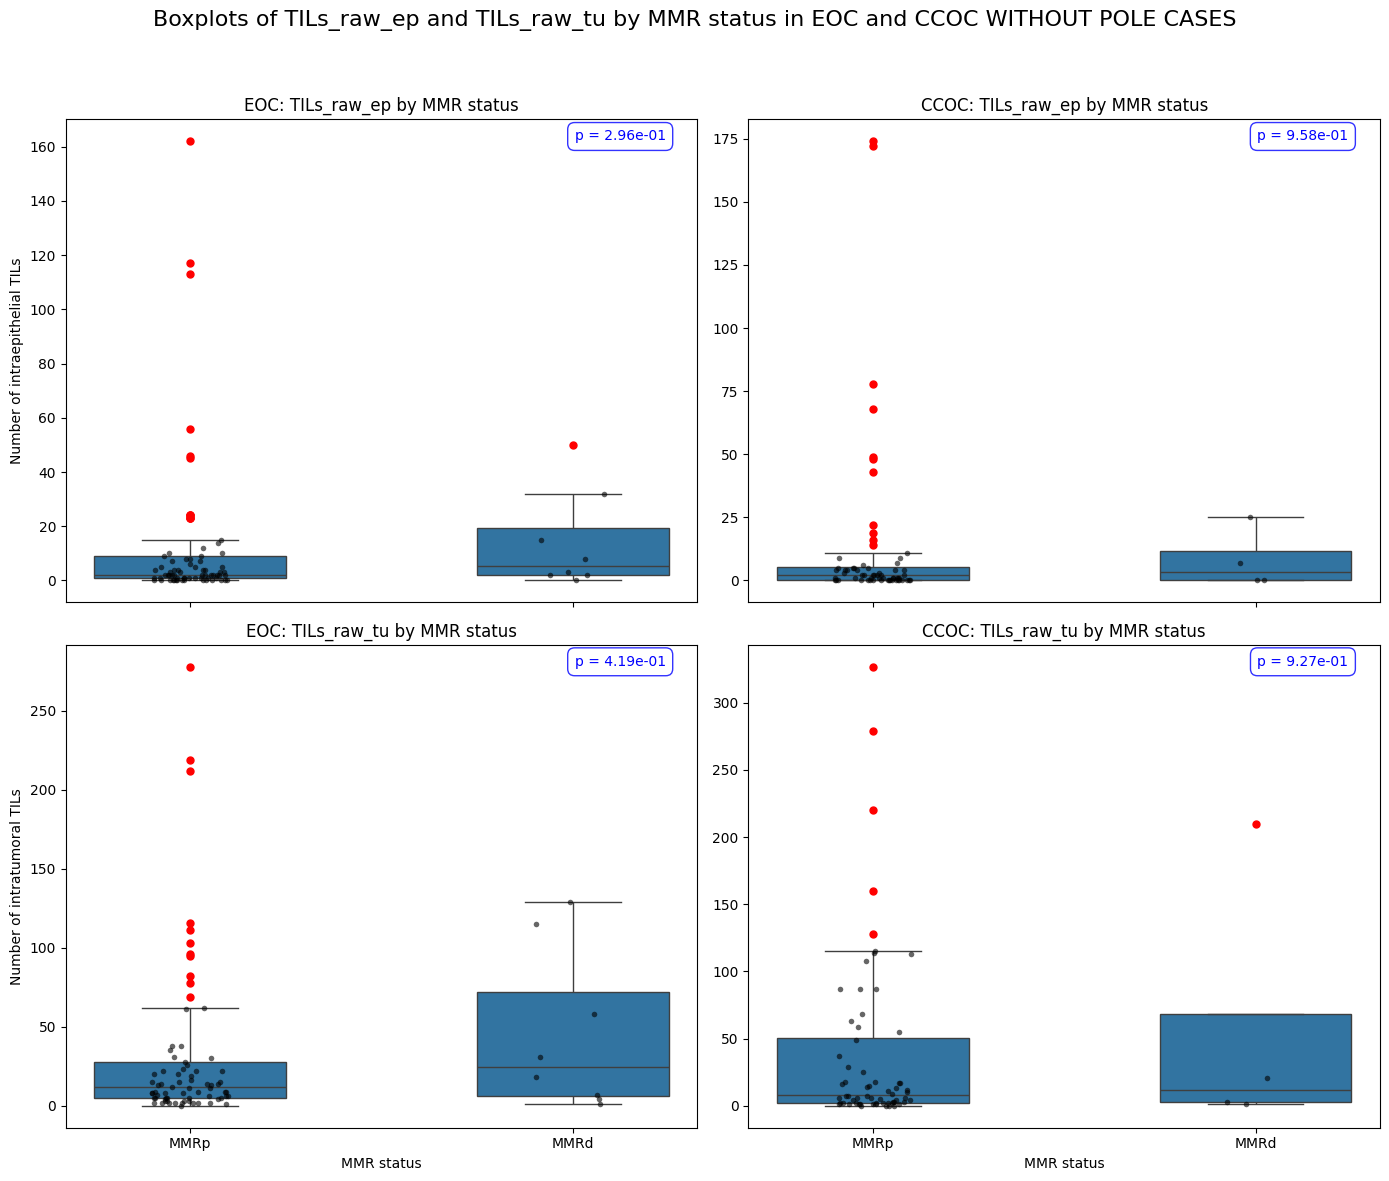

In [69]:
### ELIMINATE POLE CASES AND REANALYZE BY HISTOTYPE AND MMR STATUS ###############

# Uncomment to import if not done previously
#import seaborn as sns  # Library for statistical data visualization
#from scipy.stats import shapiro  # Function to test normality of data (Shapiro-Wilk test)
#from scipy.stats import levene  # Function to test equality of variances (Levene's test)
#from scipy.stats import ttest_ind  # Function for independent two-sample t-test
#from scipy.stats import mannwhitneyu  # Function for Mann-Whitney U test (non-parametric test for two groups)

def analyze_and_plot_tils_by_histotype_and_mmr_status(df_eoc, df_cc, output_folder, output_file):
    # Prepare data
    def prepare_data(df):
        df = df.copy()
        df = df[df['Pol_mutation'] == 'NO']  # Filter samples with Pol_mutation == 'NO'
        df['TILs_raw_ep'] = pd.to_numeric(df['TILs_raw_ep'], errors='coerce')
        df['TILs_raw_tu'] = pd.to_numeric(df['TILs_raw_tu'], errors='coerce')
        return df.dropna(subset=['TILs_raw_ep', 'TILs_raw_tu'])

    # Apply data preparation to both EOC and CCOC dataframes
    df_eoc = prepare_data(df_eoc)
    df_cc = prepare_data(df_cc)

    # Function to compute and display descriptive statistics
    def print_descriptive_stats_by_group(df, histotype_label, variable):
        print(f"\nDescriptive statistics for {histotype_label} by MMR status for {variable}:")
        grouped = df.groupby('MMR_final_status')[variable]
        for group_name, group_data in grouped:
            print(f"  MMR Status: {group_name}")
            print(f"    Median: {group_data.median()}")
            print(f"    Mean: {group_data.mean():.2f}")
            print(f"    Standard Deviation: {group_data.std():.2f}")
            print(f"    Q1 (25th percentile): {group_data.quantile(0.25)}")
            print(f"    Q3 (75th percentile): {group_data.quantile(0.75)}")
            print(f"    Count: {group_data.count()}")

    # Function to filter outliers
    def filter_outliers(df, variable):
        categories = df['MMR_final_status'].unique()
        non_outliers = pd.DataFrame()
        for category in categories:
            category_data = df[df['MMR_final_status'] == category]
            Q1 = category_data[variable].quantile(0.25)
            Q3 = category_data[variable].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            filtered = category_data[
                (category_data[variable] >= lower_bound) &
                (category_data[variable] <= upper_bound)
            ]
            non_outliers = pd.concat([non_outliers, filtered])
        return non_outliers

    # Function to annotate outliers
    def annotate_outliers(ax, df, title, variable):
        categories = df['MMR_final_status'].unique()
        for category in categories:
            category_data = df[df['MMR_final_status'] == category]
            Q1 = category_data[variable].quantile(0.25)
            Q3 = category_data[variable].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = category_data[
                (category_data[variable] < lower_bound) |
                (category_data[variable] > upper_bound)
            ]
            ax.plot(
                outliers['MMR_final_status'], outliers[variable], 'o',
                color='red', markersize=5, label='Outliers' if category == categories[0] else ""
            )
        ax.set_title(title)
        ax.set_xlabel('MMR status')

    # Function to annotate p-value
    def annotate_pvalue(ax, df, variable):
        categories = df['MMR_final_status'].unique()
        if len(categories) == 2:
            group1 = df[df['MMR_final_status'] == categories[0]][variable]
            group2 = df[df['MMR_final_status'] == categories[1]][variable]

            # Normality and variance tests
            shapiro1 = shapiro(group1)
            shapiro2 = shapiro(group2)
            levene_test = levene(group1, group2)

            # Statistical test selection
            if shapiro1.pvalue > 0.05 and shapiro2.pvalue > 0.05 and levene_test.pvalue > 0.05:
                test_stat, p_value = ttest_ind(group1, group2).statistic, ttest_ind(group1, group2).pvalue
                test_name = "T-test"
            else:
                test_stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided').statistic, \
                                     mannwhitneyu(group1, group2, alternative='two-sided').pvalue
                test_name = "Mann-Whitney U"

            # Annotate the p-value and statistic
            ax.text(
                x=0.95, y=0.95,
                s=f"p = {p_value:.2e}",
                horizontalalignment='right', verticalalignment='bottom',
                fontsize=10, color='blue',
                transform=ax.transAxes,
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='blue', boxstyle='round,pad=0.5')
            )

    # Print descriptive statistics for each dataset
    print_descriptive_stats_by_group(df_eoc, "EOC", "TILs_raw_ep")
    print_descriptive_stats_by_group(df_cc, "CCOC", "TILs_raw_ep")
    print_descriptive_stats_by_group(df_eoc, "EOC", "TILs_raw_tu")
    print_descriptive_stats_by_group(df_cc, "CCOC", "TILs_raw_tu")

    # Create figure with 2 rows and 2 columns
    fig, axes = plt.subplots(2, 2, figsize=(14, 12), sharex=True)

    # EOC plot for TILs_raw_ep
    df_eoc_filtered = filter_outliers(df_eoc, 'TILs_raw_ep')  # Remove outliers
    sns.boxplot(
        x='MMR_final_status', y='TILs_raw_ep', data=df_eoc,
        ax=axes[0, 0], width=0.5, showfliers=False
    )
    sns.stripplot(
        x='MMR_final_status', y='TILs_raw_ep', data=df_eoc_filtered,
        ax=axes[0, 0], color='black', alpha=0.6, jitter=True, size=4
    )
    annotate_outliers(axes[0, 0], df_eoc, 'EOC: TILs_raw_ep by MMR status', 'TILs_raw_ep')
    annotate_pvalue(axes[0, 0], df_eoc, 'TILs_raw_ep')
    axes[0, 0].set_ylabel('Number of intraepithelial TILs')

    # CCOC plot for TILs_raw_ep
    df_cc_filtered = filter_outliers(df_cc, 'TILs_raw_ep')  # Remove outliers
    sns.boxplot(
        x='MMR_final_status', y='TILs_raw_ep', data=df_cc,
        ax=axes[0, 1], width=0.5, showfliers=False
    )
    sns.stripplot(
        x='MMR_final_status', y='TILs_raw_ep', data=df_cc_filtered,
        ax=axes[0, 1], color='black', alpha=0.6, jitter=True, size=4
    )
    annotate_outliers(axes[0, 1], df_cc, 'CCOC: TILs_raw_ep by MMR status', 'TILs_raw_ep')
    annotate_pvalue(axes[0, 1], df_cc, 'TILs_raw_ep')
    axes[0, 1].set_ylabel('')

    # EOC plot for TILs_raw_tu
    df_eoc_filtered = filter_outliers(df_eoc, 'TILs_raw_tu')  # Remove outliers
    sns.boxplot(
        x='MMR_final_status', y='TILs_raw_tu', data=df_eoc,
        ax=axes[1, 0], width=0.5, showfliers=False
    )
    sns.stripplot(
        x='MMR_final_status', y='TILs_raw_tu', data=df_eoc_filtered,
        ax=axes[1, 0], color='black', alpha=0.6, jitter=True, size=4
    )
    annotate_outliers(axes[1, 0], df_eoc, 'EOC: TILs_raw_tu by MMR status', 'TILs_raw_tu')
    annotate_pvalue(axes[1, 0], df_eoc, 'TILs_raw_tu')
    axes[1, 0].set_ylabel('Number of intratumoral TILs')

    # CCOC plot for TILs_raw_tu
    df_cc_filtered = filter_outliers(df_cc, 'TILs_raw_tu')  # Remove outliers
    sns.boxplot(
        x='MMR_final_status', y='TILs_raw_tu', data=df_cc,
        ax=axes[1, 1], width=0.5, showfliers=False
    )
    sns.stripplot(
        x='MMR_final_status', y='TILs_raw_tu', data=df_cc_filtered,
        ax=axes[1, 1], color='black', alpha=0.6, jitter=True, size=4
    )
    annotate_outliers(axes[1, 1], df_cc, 'CCOC: TILs_raw_tu by MMR status', 'TILs_raw_tu')
    annotate_pvalue(axes[1, 1], df_cc, 'TILs_raw_tu')
    axes[1, 1].set_ylabel('')

    # Final adjustments
    fig.suptitle('Boxplots of TILs_raw_ep and TILs_raw_tu by MMR status in EOC and CCOC WITHOUT POLE CASES', fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.95])

    # Save plot
    os.makedirs(output_folder, exist_ok=True)
    plt.savefig(f'{output_folder}/{output_file}', format='png', bbox_inches='tight')
    plt.show()
    
# Define output folder and file
output_folder = '/home/vant/TFM/Plots_TFM_final/'
output_file = 'Boxplot_EOC_CCOC_TILs_raw_by_MMR_status_NOPOLE_FINAL.png'

# Call the function 
analyze_and_plot_tils_by_histotype_and_mmr_status(df_eoc_tils, df_cc_tils, output_folder, output_file)


Descriptive statistics by MMR status for TILs_raw_ep:
  MMR Status: MMRd
    Median: 5.0
    Mean: 12.00
    Standard Deviation: 15.89
    Q1 (25th percentile): 1.5
    Q3 (75th percentile): 17.5
    Count: 12
  MMR Status: MMRp
    Median: 2.0
    Mean: 12.37
    Standard Deviation: 30.05
    Q1 (25th percentile): 1.0
    Q3 (75th percentile): 8.0
    Count: 137

Descriptive statistics by MMR status for TILs_raw_tu:
  MMR Status: MMRd
    Median: 19.5
    Mean: 49.83
    Standard Deviation: 66.97
    Q1 (25th percentile): 3.75
    Q3 (75th percentile): 72.25
    Count: 12
  MMR Status: MMRp
    Median: 11.0
    Mean: 34.68
    Standard Deviation: 58.84
    Q1 (25th percentile): 3.0
    Q3 (75th percentile): 31.0
    Count: 137


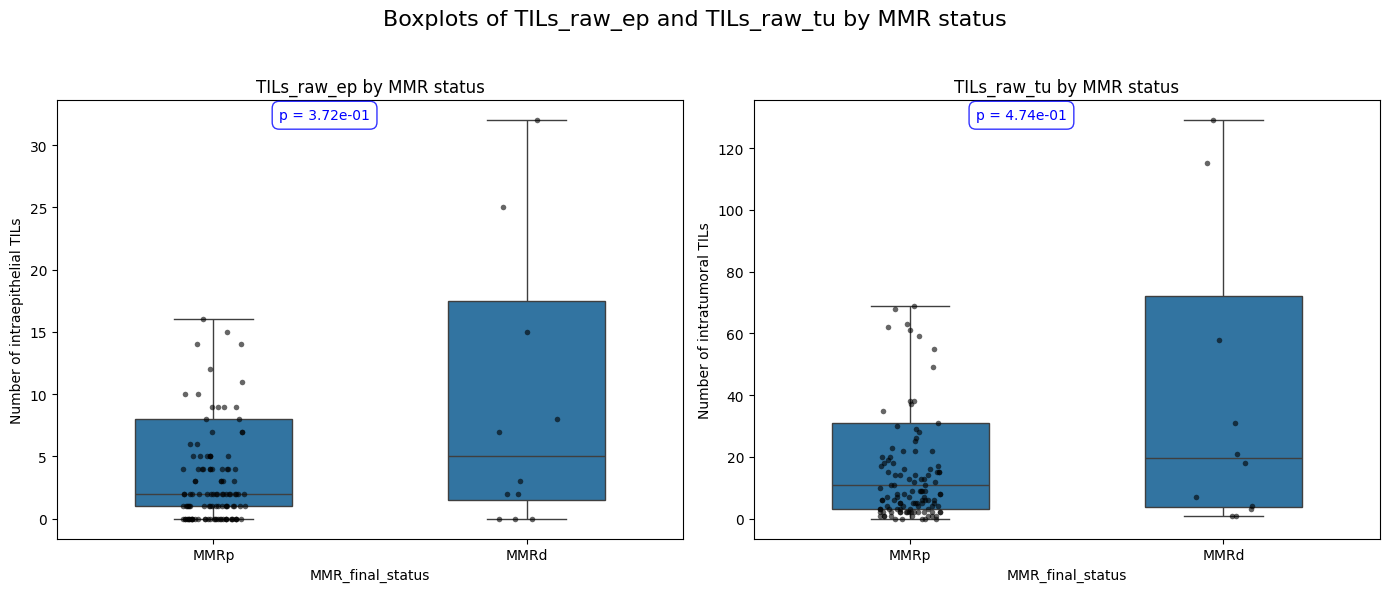

In [70]:
### ANALYZE TILs BY MMR STATUS (ENTIRE COHORT: EOC + CCOC) ELIMINATING POLE CASES ################

# Uncomment to import if not done previously
#import seaborn as sns  # Library for statistical data visualization
#from scipy.stats import shapiro  # Function to test normality of data (Shapiro-Wilk test)
#from scipy.stats import levene  # Function to test equality of variances (Levene's test)
#from scipy.stats import ttest_ind  # Function for independent two-sample t-test
#from scipy.stats import mannwhitneyu  # Function for Mann-Whitney U test (non-parametric test for two groups)

def analyze_and_plot_tils_by_mmr_status(df, output_folder, output_file):
    # Prepare data
    def prepare_data(df):
        df = df.copy()
        df = df[df['Pol_mutation'] == 'NO']  # Filter samples with Pol_mutation == 'NO'
        df['TILs_raw_ep'] = pd.to_numeric(df['TILs_raw_ep'], errors='coerce')
        df['TILs_raw_tu'] = pd.to_numeric(df['TILs_raw_tu'], errors='coerce')
        return df.dropna(subset=['TILs_raw_ep', 'TILs_raw_tu'])
    
    # Clean and prepare the dataframe
    df = prepare_data(df)

    # Function to compute and display descriptive statistics
    def print_descriptive_stats_by_group(df, variable):
        print(f"\nDescriptive statistics by MMR status for {variable}:")
        grouped = df.groupby('MMR_final_status')[variable]
        for group_name, group_data in grouped:
            print(f"  MMR Status: {group_name}")
            print(f"    Median: {group_data.median()}")
            print(f"    Mean: {group_data.mean():.2f}")
            print(f"    Standard Deviation: {group_data.std():.2f}")
            print(f"    Q1 (25th percentile): {group_data.quantile(0.25)}")
            print(f"    Q3 (75th percentile): {group_data.quantile(0.75)}")
            print(f"    Count: {group_data.count()}")

    # Function to filter outliers
    def filter_outliers(df, variable):
        categories = df['MMR_final_status'].unique()
        non_outliers = pd.DataFrame()
        for category in categories:
            category_data = df[df['MMR_final_status'] == category]
            Q1 = category_data[variable].quantile(0.25)
            Q3 = category_data[variable].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            filtered = category_data[
                (category_data[variable] >= lower_bound) &
                (category_data[variable] <= upper_bound)
            ]
            non_outliers = pd.concat([non_outliers, filtered])
        return non_outliers

    # Function to annotate p-value
    def annotate_pvalue(ax, df, variable):
        categories = df['MMR_final_status'].unique()
        if len(categories) == 2:
            group1 = df[df['MMR_final_status'] == categories[0]][variable]
            group2 = df[df['MMR_final_status'] == categories[1]][variable]

            # Normality and variance tests
            shapiro1 = shapiro(group1)
            shapiro2 = shapiro(group2)
            levene_test = levene(group1, group2)

            # Statistical test selection
            if shapiro1.pvalue > 0.05 and shapiro2.pvalue > 0.05 and levene_test.pvalue > 0.05:
                test_stat, p_value = ttest_ind(group1, group2).statistic, ttest_ind(group1, group2).pvalue
                test_name = "T-test"
            else:
                test_stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided').statistic, \
                                     mannwhitneyu(group1, group2, alternative='two-sided').pvalue
                test_name = "Mann-Whitney U"

            # Annotate the p-value and statistic
            ax.text(
                x=0.5, y=0.95,
                s=f"p = {p_value:.2e}",
                horizontalalignment='right', verticalalignment='bottom',
                fontsize=10, color='blue',
                transform=ax.transAxes,
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='blue', boxstyle='round,pad=0.5')
            )

    # Print descriptive statistics
    print_descriptive_stats_by_group(df, "TILs_raw_ep")
    print_descriptive_stats_by_group(df, "TILs_raw_tu")

    # Create figure with 2 rows
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

    # Plot for TILs_raw_ep
    df_filtered_ep = filter_outliers(df, 'TILs_raw_ep')
    sns.boxplot(
        x='MMR_final_status', y='TILs_raw_ep', data=df,
        ax=axes[0], width=0.5, showfliers=False
    )
    sns.stripplot(
        x='MMR_final_status', y='TILs_raw_ep', data=df_filtered_ep,
        ax=axes[0], color='black', alpha=0.6, jitter=True, size=4
    )
    annotate_pvalue(axes[0], df, 'TILs_raw_ep')
    axes[0].set_ylabel('Number of intraepithelial TILs')
    axes[0].set_title('TILs_raw_ep by MMR status')

    # Plot for TILs_raw_tu
    df_filtered_tu = filter_outliers(df, 'TILs_raw_tu')
    sns.boxplot(
        x='MMR_final_status', y='TILs_raw_tu', data=df,
        ax=axes[1], width=0.5, showfliers=False
    )
    sns.stripplot(
        x='MMR_final_status', y='TILs_raw_tu', data=df_filtered_tu,
        ax=axes[1], color='black', alpha=0.6, jitter=True, size=4
    )
    annotate_pvalue(axes[1], df, 'TILs_raw_tu')
    axes[1].set_ylabel('Number of intratumoral TILs')
    axes[1].set_title('TILs_raw_tu by MMR status')

    # Final adjustments
    fig.suptitle('Boxplots of TILs_raw_ep and TILs_raw_tu by MMR status', fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.95])

    # Save plot
    os.makedirs(output_folder, exist_ok=True)
    plt.savefig(f'{output_folder}/{output_file}', format='png', bbox_inches='tight')
    plt.show()

# Define output folder and file
output_folder = '/home/vant/TFM/Plots_TFM_final/'
output_file = 'Boxplot_TILs_raw_ALL_by_MMR_status.png'

# Call the function with the dataframe df1
analyze_and_plot_tils_by_mmr_status(df1, output_folder, output_file)


Contingency table for TILs_ep_category in EOC:
 MMR_final_status  MMRd  MMRp
TILs_ep_category            
none-low             3    38
medium-high          7    36
Fisher Exact Test p-value for TILs_ep_category in EOC: 0.3141

Contingency table for TILs_ep_category in CCOC:
 MMR_final_status  MMRd  MMRp
TILs_ep_category            
none-low             2    37
medium-high          3    30
Fisher Exact Test p-value for TILs_ep_category in CCOC: 0.6551

Contingency table for TILs_tu_category in EOC:
 MMR_final_status  MMRd  MMRp
TILs_tu_category            
none-low             1    10
medium-high          9    64
Fisher Exact Test p-value for TILs_tu_category in EOC: 1.0000

Contingency table for TILs_tu_category in CCOC:
 MMR_final_status  MMRd  MMRp
TILs_tu_category            
none-low             1    18
medium-high          4    50
Fisher Exact Test p-value for TILs_tu_category in CCOC: 1.0000


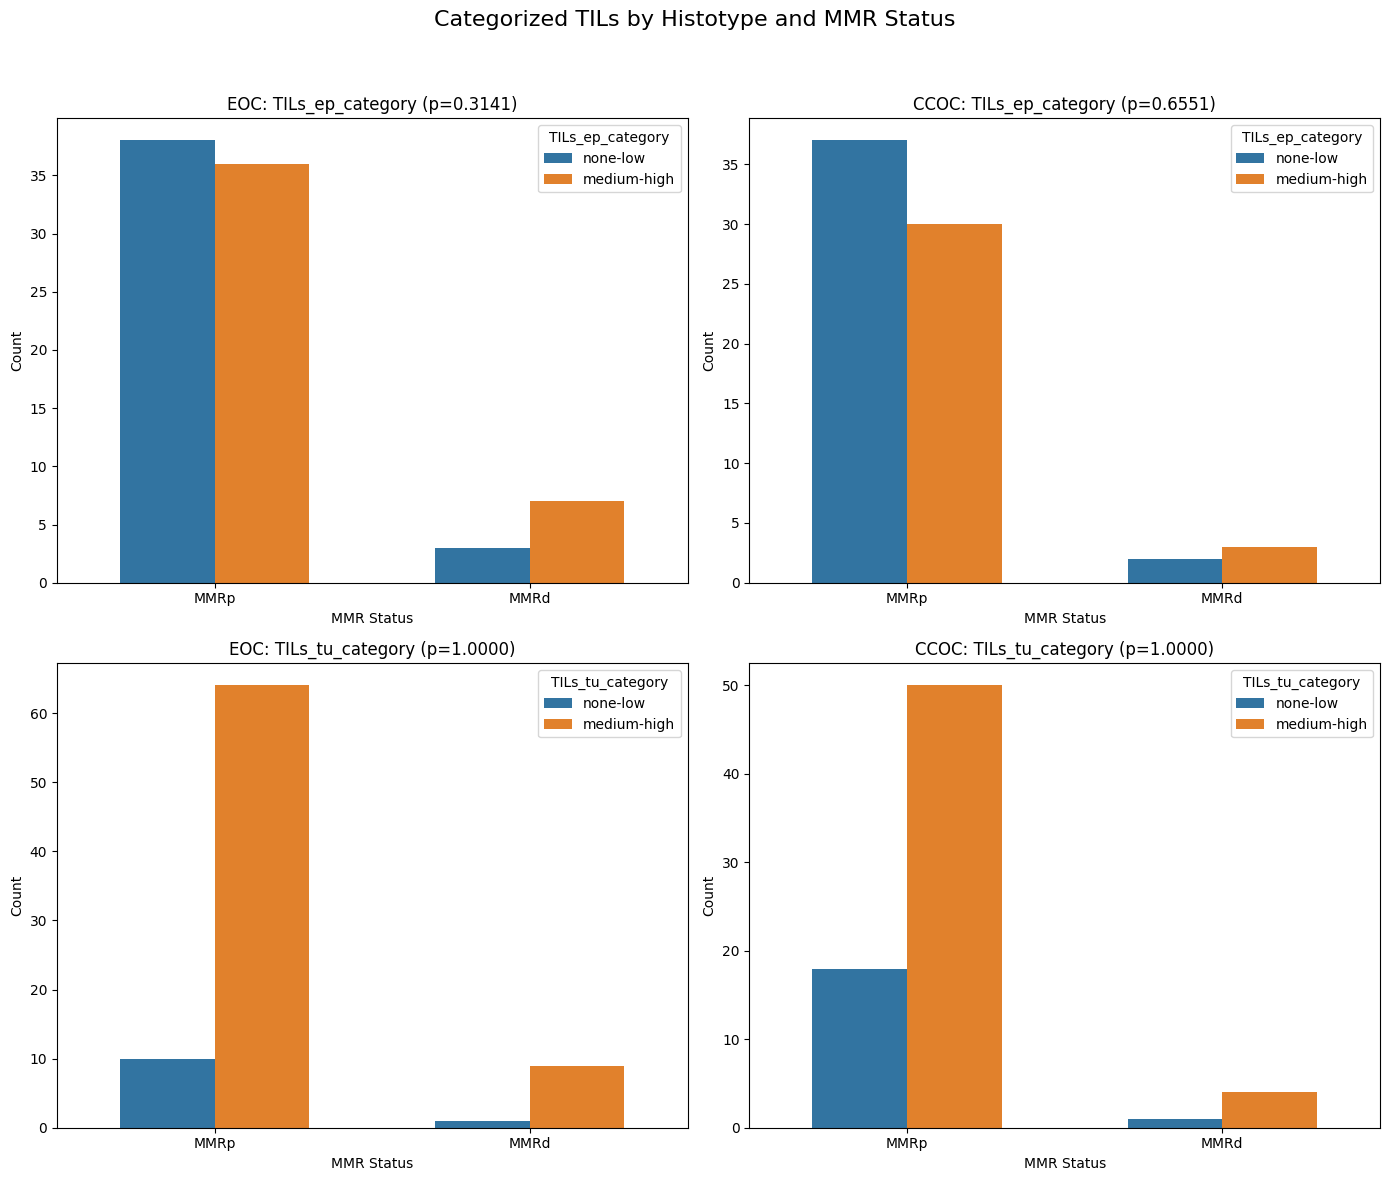

In [71]:
### ANALYSIS CATEGORIZING TILs IN NONE-LOW AND MEDIUM-HIGH BY HISTOTYPE AND MMR STATUS ##############

# Uncomment to import if not done previously
#import seaborn as sns  # Library for statistical data visualization
#from scipy.stats import chi2_contingency, fisher_exact # # Tests for association between categorical variables

def analyze_categorized_tils_by_histotype_and_mmr_status(df_eoc, df_cc, output_folder, output_file):
    # Categorize TILs_raw_ep and TILs_raw_tu
    def categorize_tils(df):
        df = df.copy()
        #df = df[df['Pol_mutation'] == 'NO']  # Filter samples with Pol_mutation == 'NO'
        df['TILs_ep_category'] = pd.cut(df['TILs_raw_ep'], bins=[-0.1, 2, float('inf')],
                                         labels=['none-low', 'medium-high'])
        df['TILs_tu_category'] = pd.cut(df['TILs_raw_tu'], bins=[-0.1, 2, float('inf')],
                                         labels=['none-low', 'medium-high'])
        return df

    df_eoc = categorize_tils(df_eoc)
    df_cc = categorize_tils(df_cc)

    # Function to use Chi-cuadrado or Fisher
    def test_proportions(df, variable, histotype_label):
        contingency_table = pd.crosstab(df[variable], df['MMR_final_status'])
        print(f"\nContingency table for {variable} in {histotype_label}:\n", contingency_table)

        # Elegir prueba estadística
        if contingency_table.values.min() < 5:
            _, p_value = fisher_exact(contingency_table.values, alternative='two-sided')
            test_name = "Fisher Exact Test"
        else:
            _, p_value, _, _ = chi2_contingency(contingency_table)
            test_name = "Chi-Square Test"

        print(f"{test_name} p-value for {variable} in {histotype_label}: {p_value:.4f}")
        return contingency_table, p_value

    # Function to graph categoric distributions
    def plot_categorical_distribution(df, variable, ax, title):
        sns.countplot(data=df, x='MMR_final_status', hue=variable, ax=ax,width=0.6)
        ax.set_title(title)
        ax.set_ylabel('Count')
        ax.set_xlabel('MMR Status')
        ax.legend(title=variable, loc='upper right')

    # Statistical tests and graphics
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))

    # EOC: TILs_ep_category
    cont_table, p_val = test_proportions(df_eoc, 'TILs_ep_category', 'EOC')
    plot_categorical_distribution(df_eoc, 'TILs_ep_category', axes[0, 0],
                                   f'EOC: TILs_ep_category (p={p_val:.4f})')

    # CCOC: TILs_ep_category
    cont_table, p_val = test_proportions(df_cc, 'TILs_ep_category', 'CCOC')
    plot_categorical_distribution(df_cc, 'TILs_ep_category', axes[0, 1],
                                   f'CCOC: TILs_ep_category (p={p_val:.4f})')

    # EOC: TILs_tu_category
    cont_table, p_val = test_proportions(df_eoc, 'TILs_tu_category', 'EOC')
    plot_categorical_distribution(df_eoc, 'TILs_tu_category', axes[1, 0],
                                   f'EOC: TILs_tu_category (p={p_val:.4f})')

    # CCOC: TILs_tu_category
    cont_table, p_val = test_proportions(df_cc, 'TILs_tu_category', 'CCOC')
    plot_categorical_distribution(df_cc, 'TILs_tu_category', axes[1, 1],
                                   f'CCOC: TILs_tu_category (p={p_val:.4f})')

    # Final adjusts
    fig.suptitle('Categorized TILs by Histotype and MMR Status', fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.95])

    # Save graphics
    os.makedirs(output_folder, exist_ok=True)
    plt.savefig(f'{output_folder}/{output_file}', format='png', bbox_inches='tight')
    plt.show()

# Define output folder and file
output_folder = '/home/vant/TFM/Plots_TFM_final/'
output_file = 'Categorized_TILs_EOC_CCOC_by_MMR_status.png'

# Apply the function to our data
analyze_categorized_tils_by_histotype_and_mmr_status(df_eoc_tils, df_cc_tils, output_folder, output_file)


Contingency table for TILs_ep_category:
 TILs_ep_category  none-low  medium-high
MMR_final_status                       
MMRp                    75           66
MMRd                     5           10
Chi-Square Test p-value for TILs_ep_category: 0.2336


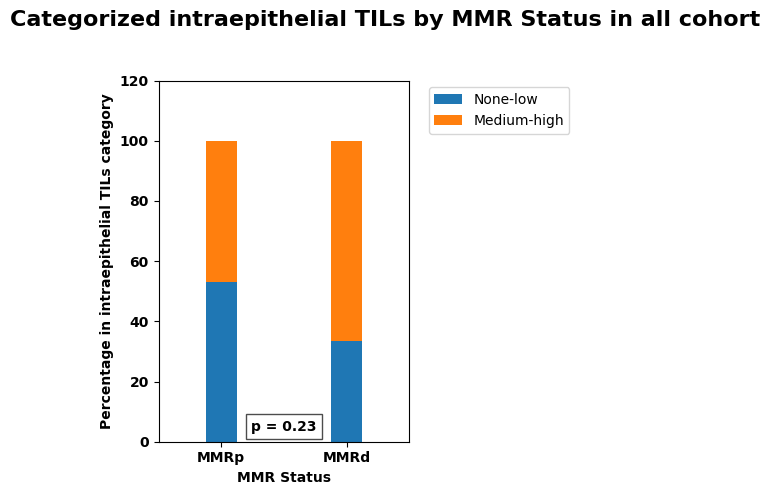

In [72]:
### ANALYSIS CATEGORIZING TILs IN NONE-LOW AND MEDIUM-HIGH IN THE ENTIRE COHORT ##############

def analyze_categorized_tils_by_mmr_status(df1, output_folder, output_file):
   
    # Categorize TILs_raw_ep and TILs_raw_tu
    def categorize_tils(df):
        df = df.copy()
        df['TILs_ep_category'] = pd.cut(df['TILs_raw_ep'], bins=[-0.1, 2, float('inf')],
                                         labels=['none-low', 'medium-high'])
        df['TILs_tu_category'] = pd.cut(df['TILs_raw_tu'], bins=[-0.1, 2, float('inf')],
                                         labels=['none-low', 'medium-high'])
        return df

    df1 = categorize_tils(df1)

    # Reorder MMR_final_status categories so that 'MMRp' is on the left and 'MMRd' is on the right
    df1['MMR_final_status'] = pd.Categorical(df1['MMR_final_status'], categories=['MMRp', 'MMRd', 'POLE', 'MMRd+POLE'], ordered=True)

    # Function to calculate percentages for stacked bar plot
    def calculate_percentages(df, variable):
        contingency_table = pd.crosstab(df['MMR_final_status'], df[variable])
        percentages = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
        return percentages

    # Function to plot stacked bar chart for percentages
    def plot_stacked_bar(df, variable, ax, title, p_val):
        percentages = calculate_percentages(df, variable)
        percentages.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'], width=0.25)
        ax.set_title(title)
        ax.set_ylabel('Percentage in intraepithelial TILs category', fontsize=10, fontweight='bold')
        ax.set_xlabel('MMR Status', fontsize=10, fontweight='bold')
        ax.legend(loc='upper left', labels=['None-low', 'Medium-high'], bbox_to_anchor=(1.05, 1))
        ax.set_ylim(0, 105)  # Set the Y-axis to go from 0 to 110
        ax.set_xlim(-0.5, len(percentages.index) - 0.5)  # Compress X-axis limits
        ax.text(0.5, 5, f'p = {p_val:.2f}', horizontalalignment='center', verticalalignment='center',
                fontsize=10, fontweight='bold', color='black', bbox=dict(facecolor='white', alpha=0.7))

        ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, fontweight='bold', rotation=0)
        y_ticks = ax.get_yticks()
        ax.set_yticks(y_ticks)
        y_tick_labels = [f'{int(label)}' for label in y_ticks]
        ax.set_yticklabels(y_tick_labels, fontsize=10, fontweight='bold')

    # Function to perform statistical test (Chi-square or Fisher Exact Test)
    def test_proportions(df, variable):
        contingency_table = pd.crosstab(df['MMR_final_status'], df[variable])
        print(f"\nContingency table for {variable}:\n", contingency_table)

        if contingency_table.values.min() < 5:
            _, p_value = fisher_exact(contingency_table.values, alternative='two-sided')
            test_name = "Fisher Exact Test"
        else:
            _, p_value, _, _ = chi2_contingency(contingency_table)
            test_name = "Chi-Square Test"

        print(f"{test_name} p-value for {variable}: {p_value:.4f}")
        return p_value

    # Perform statistical test for TILs_ep_category
    p_value_ep = test_proportions(df1, 'TILs_ep_category')

    # Create the figure for the plot
    fig, ax = plt.subplots(figsize=(6, 5))

    # Plot for TILs_ep_category with p-value
    plot_stacked_bar(df1, 'TILs_ep_category', ax, '', p_value_ep)

    # Final adjustments
    fig.suptitle('Categorized intraepithelial TILs by MMR Status in all cohort', fontsize=16, fontweight='bold')
    fig.tight_layout(rect=[0, 0, 0.85, 0.95])  # Leave space for the legend

    # Save the plot
    os.makedirs(output_folder, exist_ok=True)
    plt.savefig(f'{output_folder}/{output_file}', format='png', bbox_inches='tight')
    plt.show()

# Define output folder and file
output_folder = '/home/vant/TFM/Plots_TFM_final/'
output_file = 'Categorized_TILs_raw_ep_by_MMR_status_ALL.png'

# Call the function with the data
analyze_categorized_tils_by_mmr_status(df1, output_folder, output_file)



Contingency table for TILs_tu_category:
 TILs_tu_category  none-low  medium-high
MMR_final_status                       
MMRd                     2           13
MMRp                    28          114
Fisher Exact Test p-value for TILs_tu_category: 0.7377


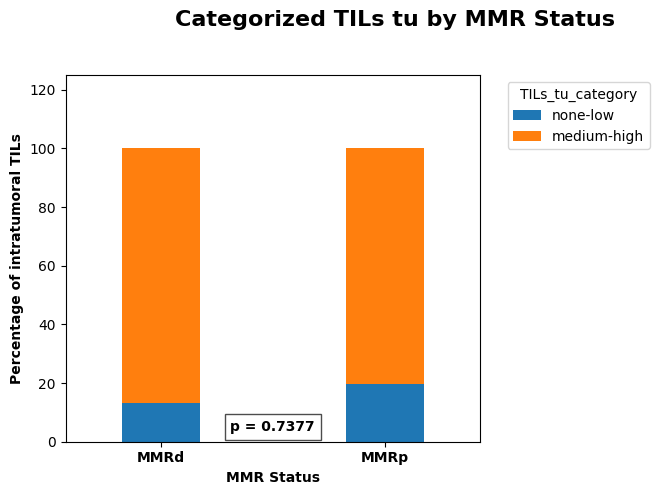

In [73]:
### ANALYSIS CATEGORIZING TILs_raw_tu IN NONE-LOW AND MEDIUM-HIGH BY MMR STATUS IN ALL COHORT (EOC + CCOC) ##############

# Uncomment to import if not done previously
#import seaborn as sns  # Library for statistical data visualization
#from scipy.stats import chi2_contingency, fisher_exact # # Tests for association between categorical variables

def analyze_categorized_tils_by_mmr_status(df1, output_folder, output_file):
    # Categorize TILs_raw_tu
    def categorize_tils(df):
        df = df.copy()
        #df = df[df['Pol_mutation'] == 'NO'] 
        df['TILs_tu_category'] = pd.cut(df['TILs_raw_tu'], bins=[-0.1, 2, float('inf')],
                                         labels=['none-low', 'medium-high'])
        return df

    df1 = categorize_tils(df1)

    # Function to calculate percentages for stacked bar plot
    def calculate_percentages(df, variable):
        # Calculate the count of each category within MMR_final_status
        contingency_table = pd.crosstab(df['MMR_final_status'], df[variable])
        
        # Convert counts to percentages
        percentages = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
        return percentages

    # Function to plot stacked bar chart for percentages
    def plot_stacked_bar(df, variable, ax, title, p_val):
        # Calculate the percentages
        percentages = calculate_percentages(df, variable)
        
        # Plotting the stacked bar chart with narrower bars (width=0.35)
        percentages.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'], width=0.35)
        ax.set_title(title)
        ax.set_ylabel('Percentage of intratumoral TILs',fontsize=10, fontweight='bold')
        ax.set_xlabel('MMR Status',fontsize=10, fontweight='bold')
        ax.legend(title=variable, loc='upper left', labels=['none-low', 'medium-high'], bbox_to_anchor=(1.05, 1))
        ax.set_ylim(0, 125)  # Set the Y-axis to go from 0 to 125
        
        # Annotate the p-value on the graph
        ax.text(0.5, 5, f'p = {p_val:.4f}', horizontalalignment='center', verticalalignment='center',
                fontsize=10, fontweight='bold', color='black', bbox=dict(facecolor='white', alpha=0.7))

        # Set X-axis labels in bold and horizontal
        ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, fontweight='bold', rotation=0)

    # Function to perform statistical test (Chi-square or Fisher Exact Test)
    def test_proportions(df, variable):
        contingency_table = pd.crosstab(df['MMR_final_status'], df[variable])
        print(f"\nContingency table for {variable}:\n", contingency_table)

        # Select statistical test based on the values in the contingency table
        if contingency_table.values.min() < 5:
            _, p_value = fisher_exact(contingency_table.values, alternative='two-sided')
            test_name = "Fisher Exact Test"
        else:
            _, p_value, _, _ = chi2_contingency(contingency_table)
            test_name = "Chi-Square Test"

        print(f"{test_name} p-value for {variable}: {p_value:.4f}")
        return p_value

    # Perform statistical test for TILs_tu_category
    p_value_tu = test_proportions(df1, 'TILs_tu_category')

    # Create the figure for the plot
    fig, ax = plt.subplots(figsize=(8, 5))

    # Plot for TILs_tu_category with p-value
    plot_stacked_bar(df1, 'TILs_tu_category', ax, '', p_value_tu)

    # Final adjustments
    fig.suptitle('Categorized TILs tu by MMR Status', fontsize=16, fontweight='bold')
    fig.tight_layout(rect=[0, 0, 0.85, 0.95])  # Leave space for the legend

    # Save the plot
    os.makedirs(output_folder, exist_ok=True)
    plt.savefig(f'{output_folder}/{output_file}', format='png', bbox_inches='tight')
    plt.show()

# Define output folder and file
output_folder = '/home/vant/TFM/Plots_TFM_final/'
output_file = 'Categorized_TILs_tu_ALL_by_MMR_status.png'

# Call the function with the data
analyze_categorized_tils_by_mmr_status(df1, output_folder, output_file)



Comparing TILs_raw_ep and TILs_raw_tu for EOC:
  Test: Wilcoxon Signed-Rank Test
    p-value: 9.38e-11

Comparing TILs_raw_ep and TILs_raw_tu for CCOC:
  Test: Wilcoxon Signed-Rank Test
    p-value: 3.12e-12


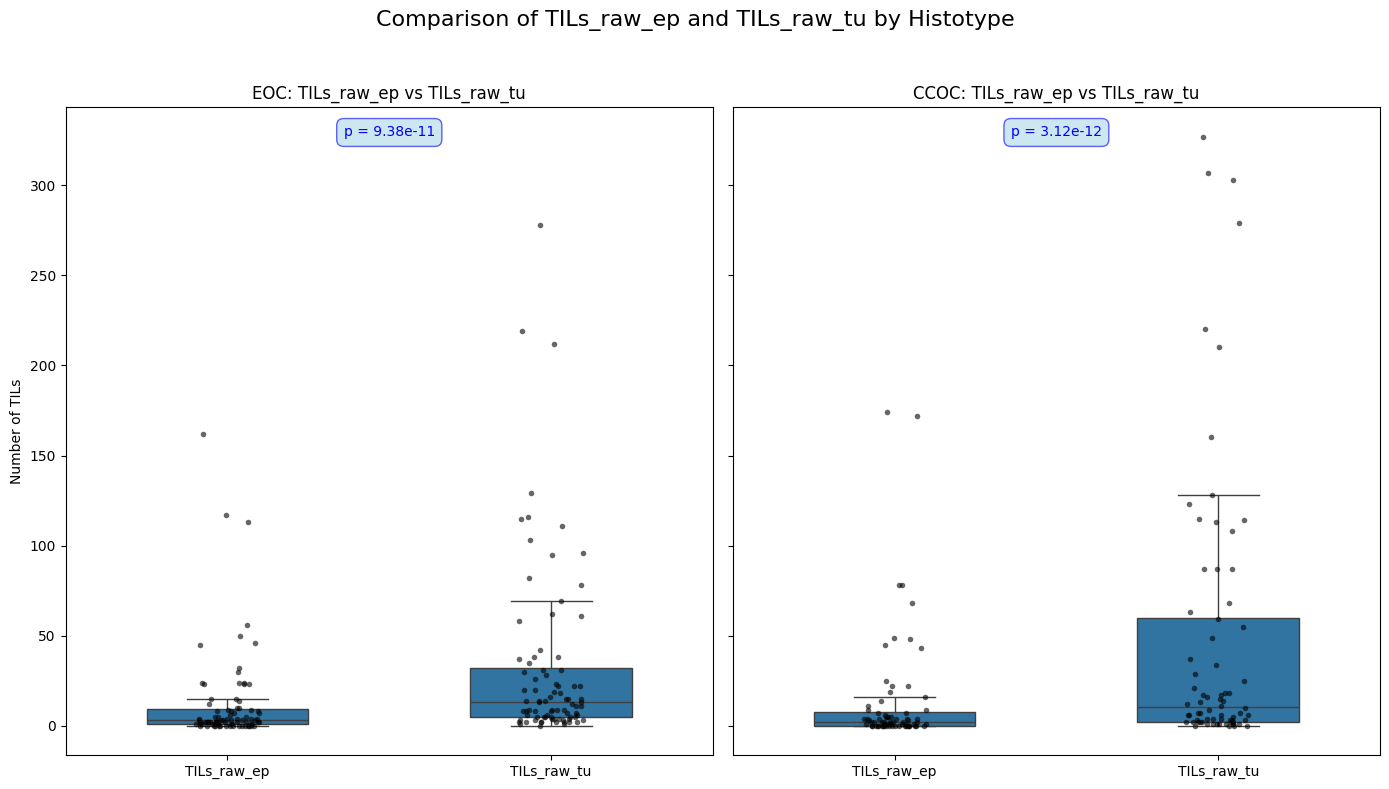

In [74]:
### ANALYZE DIFFERENCES BETWEEN INTRAEPITHELIAL TILs AND INTRATUMORAL TILs IN EVERY HISTOLOGY #############

from scipy.stats import ttest_rel, wilcoxon  # Paired tests: t-test for parametric, Wilcoxon for non-parametric data

# Uncomment to import if not done previously
#import seaborn as sns  # Library for statistical data visualization
#from scipy.stats import shapiro  # Function to test normality of data (Shapiro-Wilk test)

def analyze_and_plot_tils_differences_by_histotype(df_eoc, df_cc, output_folder, output_file):
    # Prepare data
    def prepare_data(df):
        df = df.copy()
        df['TILs_raw_ep'] = pd.to_numeric(df['TILs_raw_ep'], errors='coerce')
        df['TILs_raw_tu'] = pd.to_numeric(df['TILs_raw_tu'], errors='coerce')
        return df.dropna(subset=['TILs_raw_ep', 'TILs_raw_tu'])

    # Apply data preparation to both EOC and CCOC dataframes
    df_eoc = prepare_data(df_eoc)
    df_cc = prepare_data(df_cc)

    # Function to perform statistical tests and annotate p-values
    def compare_tils(df, histotype_label):
        print(f"\nComparing TILs_raw_ep and TILs_raw_tu for {histotype_label}:")

        # Test for normality of both variables
        shapiro_ep = shapiro(df['TILs_raw_ep'])
        shapiro_tu = shapiro(df['TILs_raw_tu'])

        # Select statistical test based on normality
        if shapiro_ep.pvalue > 0.05 and shapiro_tu.pvalue > 0.05:
            # Paired T-test (for normal distribution)
            test_stat, p_value = ttest_rel(df['TILs_raw_ep'], df['TILs_raw_tu'])
            test_name = "Paired T-test"
        else:
            # Wilcoxon Signed-Rank Test (non-parametric)
            test_stat, p_value = wilcoxon(df['TILs_raw_ep'], df['TILs_raw_tu'])
            test_name = "Wilcoxon Signed-Rank Test"

        # Print test result
        print(f"  Test: {test_name}")
        print(f"    p-value: {p_value:.2e}")

        return test_name, p_value

    # Compare within EOC and CCOC
    test_name_eoc, p_value_eoc = compare_tils(df_eoc, "EOC")
    test_name_ccoc, p_value_ccoc = compare_tils(df_cc, "CCOC")

    # Create figure with 1 row and 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(14, 8), sharey=True)

    # EOC plot for TILs_raw_ep and TILs_raw_tu comparison
    sns.boxplot(
        x='variable', y='value', data=pd.melt(df_eoc[['TILs_raw_ep', 'TILs_raw_tu']], var_name='variable'),
        ax=axes[0], width=0.5, showfliers=False
    )
    sns.stripplot(
        x='variable', y='value', data=pd.melt(df_eoc[['TILs_raw_ep', 'TILs_raw_tu']], var_name='variable'),
        ax=axes[0], color='black', alpha=0.6, jitter=True, size=4
    )
    axes[0].set_title(f'EOC: TILs_raw_ep vs TILs_raw_tu')
    axes[0].set_xlabel('')
    axes[0].set_ylabel('Number of TILs')

    # CCOC plot for TILs_raw_ep and TILs_raw_tu comparison
    sns.boxplot(
        x='variable', y='value', data=pd.melt(df_cc[['TILs_raw_ep', 'TILs_raw_tu']], var_name='variable'),
        ax=axes[1], width=0.5, showfliers=False
    )
    sns.stripplot(
        x='variable', y='value', data=pd.melt(df_cc[['TILs_raw_ep', 'TILs_raw_tu']], var_name='variable'),
        ax=axes[1], color='black', alpha=0.6, jitter=True, size=4
    )
    axes[1].set_title(f'CCOC: TILs_raw_ep vs TILs_raw_tu')
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')

    # Annotate p-value and test name on top of plots with a blue box
    axes[0].text(
        0.5, 0.95, f"p = {p_value_eoc:.2e}",
        horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='blue', transform=axes[0].transAxes,
        bbox=dict(facecolor='lightblue', alpha=0.6, edgecolor='blue', boxstyle='round,pad=0.5')
    )
    axes[1].text(
        0.5, 0.95, f"p = {p_value_ccoc:.2e}",
        horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='blue', transform=axes[1].transAxes,
        bbox=dict(facecolor='lightblue', alpha=0.6, edgecolor='blue', boxstyle='round,pad=0.5')
    )

    # Final adjustments
    fig.suptitle('Comparison of TILs_raw_ep and TILs_raw_tu by Histotype', fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.95])

    # Save plot
    os.makedirs(output_folder, exist_ok=True)
    plt.savefig(f'{output_folder}/{output_file}', format='png', bbox_inches='tight')
    plt.show()

# Define output folder and file
output_folder = '/home/vant/TFM/Plots_TFM_final/'
output_file = 'Boxplot_EOC_CCOC_TILs_raw_epvstu_by_histotype.png'

# Call the function with the dataframes (df_endometroid and df_cc)
analyze_and_plot_tils_differences_by_histotype(df_endometroid, df_cc, output_folder, output_file)



Comparing TILs_raw_ep and TILs_raw_tu for EOC:
  Test: Wilcoxon Signed-Rank Test
    p-value: 1.04e-09

Comparing TILs_raw_ep and TILs_raw_tu for CCOC:
  Test: Wilcoxon Signed-Rank Test
    p-value: 2.12e-11


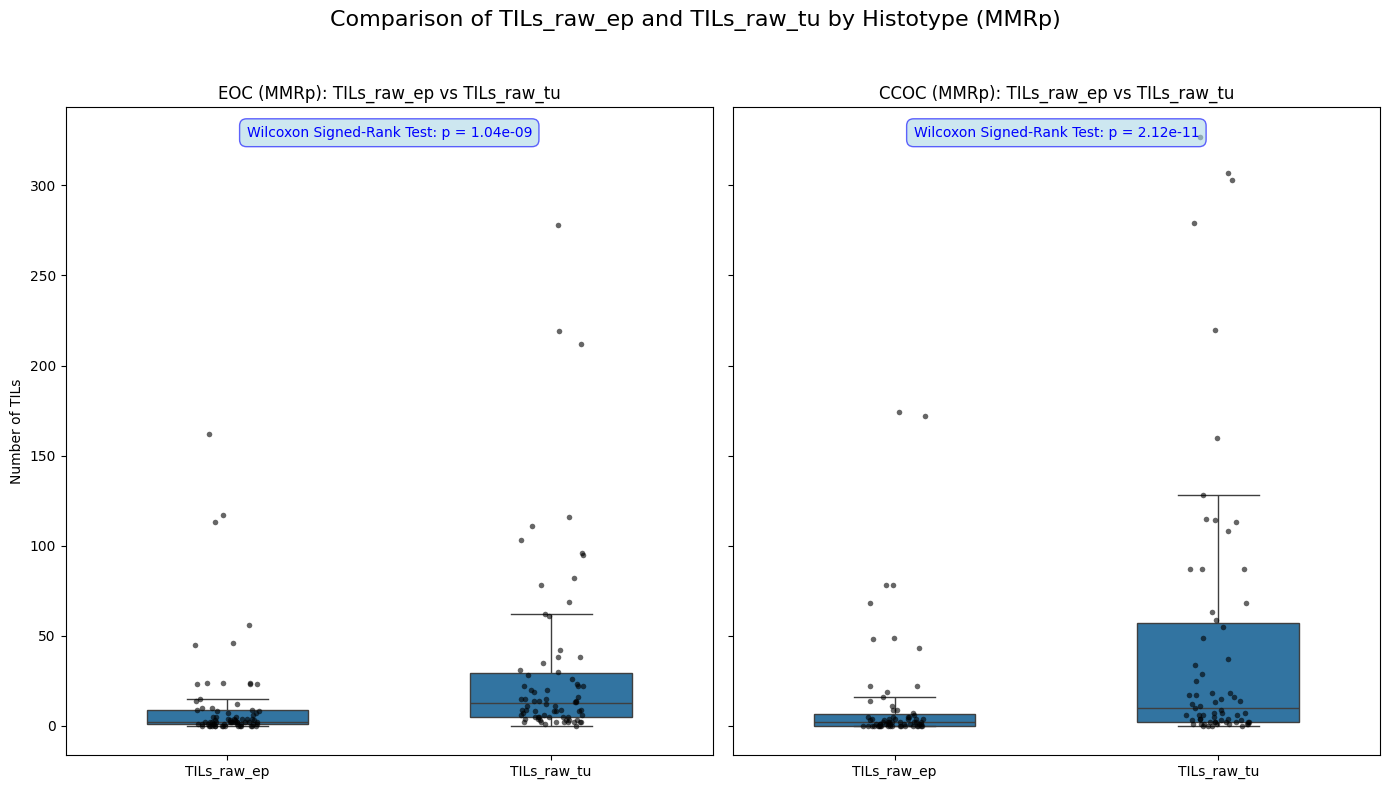

In [75]:
### ANALYZE DIFFERENCES BETWEEN INTRAEPITHELIAL TILs AND INTRATUMORAL TILs IN EVERY HISTOLOGY IN MMRp GROUP #############

# Uncomment to import if not done previously
#import seaborn as sns  # Library for statistical data visualization
#from scipy.stats import shapiro  # Function to test normality of data (Shapiro-Wilk test)
#from scipy.stats import ttest_rel, wilcoxon  # Paired tests: t-test for parametric, Wilcoxon for non-parametric data

def analyze_and_plot_tils_differences_mmrp(df_eoc, df_cc, output_folder, output_file):
    # Prepare data
    def prepare_data(df):
        df = df.copy()
        df['TILs_raw_ep'] = pd.to_numeric(df['TILs_raw_ep'], errors='coerce')
        df['TILs_raw_tu'] = pd.to_numeric(df['TILs_raw_tu'], errors='coerce')
        return df.dropna(subset=['TILs_raw_ep', 'TILs_raw_tu'])

    # Filter to only include rows with MMR_final_status == 'MMRp'
    df_eoc = df_eoc[df_eoc['MMR_final_status'] == 'MMRp']
    df_cc = df_cc[df_cc['MMR_final_status'] == 'MMRp']

    # Apply data preparation to both EOC and CCOC dataframes
    df_eoc = prepare_data(df_eoc)
    df_cc = prepare_data(df_cc)

    # Function to perform statistical tests and annotate p-values
    def compare_tils(df, histotype_label):
        print(f"\nComparing TILs_raw_ep and TILs_raw_tu for {histotype_label}:")

        # Test for normality of both variables
        shapiro_ep = shapiro(df['TILs_raw_ep'])
        shapiro_tu = shapiro(df['TILs_raw_tu'])

        # Select statistical test based on normality
        if shapiro_ep.pvalue > 0.05 and shapiro_tu.pvalue > 0.05:
            # Paired T-test (for normal distribution)
            test_stat, p_value = ttest_rel(df['TILs_raw_ep'], df['TILs_raw_tu'])
            test_name = "Paired T-test"
        else:
            # Wilcoxon Signed-Rank Test (non-parametric)
            test_stat, p_value = wilcoxon(df['TILs_raw_ep'], df['TILs_raw_tu'])
            test_name = "Wilcoxon Signed-Rank Test"

        # Print test result
        print(f"  Test: {test_name}")
        print(f"    p-value: {p_value:.2e}")

        return test_name, p_value

    # Compare within EOC and CCOC for MMRp
    test_name_eoc, p_value_eoc = compare_tils(df_eoc, "EOC")
    test_name_ccoc, p_value_ccoc = compare_tils(df_cc, "CCOC")

    # Create figure with 1 row and 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(14, 8), sharey=True)

    # EOC plot for TILs_raw_ep and TILs_raw_tu comparison
    sns.boxplot(
        x='variable', y='value', data=pd.melt(df_eoc[['TILs_raw_ep', 'TILs_raw_tu']], var_name='variable'),
        ax=axes[0], width=0.5, showfliers=False
    )
    sns.stripplot(
        x='variable', y='value', data=pd.melt(df_eoc[['TILs_raw_ep', 'TILs_raw_tu']], var_name='variable'),
        ax=axes[0], color='black', alpha=0.6, jitter=True, size=4
    )
    axes[0].set_title(f'EOC (MMRp): TILs_raw_ep vs TILs_raw_tu')
    axes[0].set_xlabel('')
    axes[0].set_ylabel('Number of TILs')

    # CCOC plot for TILs_raw_ep and TILs_raw_tu comparison
    sns.boxplot(
        x='variable', y='value', data=pd.melt(df_cc[['TILs_raw_ep', 'TILs_raw_tu']], var_name='variable'),
        ax=axes[1], width=0.5, showfliers=False
    )
    sns.stripplot(
        x='variable', y='value', data=pd.melt(df_cc[['TILs_raw_ep', 'TILs_raw_tu']], var_name='variable'),
        ax=axes[1], color='black', alpha=0.6, jitter=True, size=4
    )
    axes[1].set_title(f'CCOC (MMRp): TILs_raw_ep vs TILs_raw_tu')
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')

    # Annotate p-value and test name on top of plots with a blue box
    axes[0].text(
        0.5, 0.95, f"{test_name_eoc}: p = {p_value_eoc:.2e}",
        horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='blue', transform=axes[0].transAxes,
        bbox=dict(facecolor='lightblue', alpha=0.6, edgecolor='blue', boxstyle='round,pad=0.5')
    )
    axes[1].text(
        0.5, 0.95, f"{test_name_ccoc}: p = {p_value_ccoc:.2e}",
        horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='blue', transform=axes[1].transAxes,
        bbox=dict(facecolor='lightblue', alpha=0.6, edgecolor='blue', boxstyle='round,pad=0.5')
    )

    # Final adjustments
    fig.suptitle('Comparison of TILs_raw_ep and TILs_raw_tu by Histotype (MMRp)', fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.95])

    # Save plot
    os.makedirs(output_folder, exist_ok=True)
    plt.savefig(f'{output_folder}/{output_file}', format='png', bbox_inches='tight')
    plt.show()

# Define output folder and file
output_folder = '/home/vant/TFM/Plots_TFM_final/'
output_file = 'Boxplot_EOC_CCOC_TILsraw_epvstu_MMRp.png'

# Call the function with the dataframes (df_endometroid and df_cc)
analyze_and_plot_tils_differences_mmrp(df_endometroid, df_cc, output_folder, output_file)